## Notebook para el análisis explotario de datos de vuelos

&nbsp;&nbsp;<font size="4" color="blue">Para ejecutar el notebook seguir los siguientes pasos:</font><br><br>
&nbsp;&nbsp;1- <b>Ejecutar únicamente las dos celdas a continuación</b><br>
&nbsp;&nbsp;2- Pulsar el botón generado <font color="red">"Run initial operations"</font><br>
&nbsp;&nbsp;3- Seleccionar los valores deseados<br>
&nbsp;&nbsp;4- Pulsar el botón <font  color="red">"Run all operations"</font><br>

In [ ]:
#Para instalar ipywidgets hay que ejecutar el siguiente comando en el terminal:
#!pip install ipywidgets

In [3]:
from IPython.display import Javascript, display
from ipywidgets import widgets

#Creamos un botón con el cual empezarán a ejecutarse las operaciones iniciales del notebook
def run_init(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, 10)'))

button_init = widgets.Button(description="Run initial operations")
button_init.on_click(run_init)
display(button_init)

Button(description='Run initial operations', style=ButtonStyle())

In [4]:
import pandas as pd
import os

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import numpy as np


import seaborn as sns

## Apertura de ficheros

In [5]:
#Definimos la variable ruta donde estarán los datasets a analizar
ruta = "C:/Users/delas/Documents/BDML/data/"


In [6]:
#Creamos un combo con el que elegir el año a analizar de los que disponemos de datos 1996-2018
dd = widgets.Dropdown(
    options = list(map(str, range(1996,2019))), 
    value = '1996',
    description = '* Year:',
)

dd.layout.width = '155px'
display(dd)

Dropdown(description='* Year:', layout=Layout(width='155px'), options=('1996', '1997', '1998', '1999', '2000',…

In [7]:
#Creamos un checkbox para indicar si en la ejecución queremos generar los ficheros una vez tratados los datos
cb = widgets.Checkbox(
    value=False,
    description='Generate processed files',
    disabled=False
)
display(cb)

Checkbox(value=False, description='Generate processed files')

In [7]:
#Creamos un botón con el cual empezarán a ejecutarse el resto de operaciones
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all operations")
button.on_click(run_all)
display(button)

Button(description='Run all operations', style=ButtonStyle())

In [8]:
load_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=13,
    step=1,
    description='Loading...',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [9]:
#Cargamos todos los ficheros del año (mes a mes)
year = dd.value
dataframes = []
i = 1

display(load_progress)

for file in os.listdir(ruta + year):
    if file.endswith(".csv"):
        load_progress.value = i
        print("Reading file " + file)
        datos_vuelos = pd.read_csv(os.path.join(ruta + year, file), 
                                   encoding="ISO-8859-1", 
                                   low_memory=False, 
                                   error_bad_lines=False, 
                                   dtype={'CancellationCode': str})
        
        i = i + 1
        dataframes.append(datos_vuelos)

load_progress.value = i + 1
print()
print("All files loaded <--")

dataframes= sorted(dataframes, key=lambda x:x["Month"].max(axis=0))

#concatenamos todos para tener un DF anual
dfanual = pd.concat(dataframes)

IntProgress(value=0, bar_style='info', description='Loading...', max=13)

Reading file 2010-1-filtrado.csv
Reading file 2010-10-filtrado.csv
Reading file 2010-11-filtrado.csv
Reading file 2010-12-filtrado.csv
Reading file 2010-2-filtrado.csv
Reading file 2010-3-filtrado.csv
Reading file 2010-4-filtrado.csv
Reading file 2010-5-filtrado.csv
Reading file 2010-6-filtrado.csv
Reading file 2010-7-filtrado.csv
Reading file 2010-8-filtrado.csv
Reading file 2010-9-filtrado.csv

All files loaded <--


In [10]:
dataframes[0].head(5)

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0           0  2010        1      1          22          5  2010-01-22   
1           1  2010        1      1          23          6  2010-01-23   
2           2  2010        1      1          24          7  2010-01-24   
3           3  2010        1      1          25          1  2010-01-25   
4           4  2010        1      1          26          2  2010-01-26   

  Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  Flights  \
0                MQ                          MQ      N806MQ  ...      1.0   
1                MQ                          MQ      N725MQ  ...      1.0   
2                MQ                          MQ      N828MQ  ...      1.0   
3                MQ                          MQ      N722MQ  ...      1.0   
4                MQ                          MQ      N820MQ  ...      1.0   

  Distance DistanceGroup CarrierDelay WeatherDelay NASDelay SecurityDelay  \
0    431.0             2          NaN          NaN      NaN           NaN   
1    431.0             2          NaN          NaN      NaN           NaN   
2    431.0             2          0.0          0.0    100.0           0.0   
3    431.0             2          0.0          0.0     28.0           0.0   
4    431.0             2          NaN          NaN      NaN           NaN   

   LateAircraftDelay  Flight_Code    Route  
0                NaN       MQ4435  RDU-LGA  
1                NaN       MQ4435  RDU-LGA  
2                0.0       MQ4435  RDU-LGA  
3                0.0       MQ4435  RDU-LGA  
4                NaN       MQ4435  RDU-LGA  

[5 rows x 51 columns]

In [11]:
#Miramos el tamaño del total
dfanual.shape

(6437251, 51)

In [12]:
#Miramos el tamaño de cada mes
for df in dataframes:
    print(df["Month"][1],df.shape)

1 (521563, 51)
2 (483042, 51)
3 (549006, 51)
4 (529038, 51)
5 (542204, 51)
6 (550110, 51)
7 (569131, 51)
8 (567561, 51)
9 (524415, 51)
10 (543740, 51)
11 (519559, 51)
12 (537882, 51)


## 1. Análisis Exploratorio

## 1.1 Aerolíneas

In [13]:
#para sacar las compañías que operan
#Cogemos las que hay en el primer mes y en el concatenado. Si son las mismas, tiramos. 
#Si no, miramos a ver en qué mes cambió
aerolineas_01 = dataframes[0]['IATA_CODE_Reporting_Airline'].unique()
aerolineas_anual = dfanual['IATA_CODE_Reporting_Airline'].unique()

if aerolineas_01.all() == aerolineas_anual.all():
    print(aerolineas_anual)
else:
    print(aerolineas_01)
    print(aerolineas_anual)

['MQ' 'OH' 'OO' 'UA' 'US' 'WN' '9E' 'AA' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9'
 'FL' 'HA' 'XE' 'YV']


In [14]:

dfanual['Reporting_Airline'].unique()

array(['MQ', 'OH', 'OO', 'UA', 'US', 'WN', '9E', 'AA', 'AS', 'B6', 'CO',
       'DL', 'EV', 'F9', 'FL', 'HA', 'XE', 'YV'], dtype=object)

## 1.2 Vuelos, aeropuertos y rutas.

## 1.2.1 Vuelos

In [15]:
#en teoría son números de vuelos único, pero no es verdad, parece que comparten numeración así que luego concatenaremos
len(dfanual['Flight_Number_Reporting_Airline'].unique())

7399

In [16]:
#hago el número de vuelo como es de verdad, concatenando código de compañía y vuelo
dfanual['Flight_Code'] = dfanual['IATA_CODE_Reporting_Airline'] + dfanual['Flight_Number_Reporting_Airline'].astype(str)

In [17]:
#Sacamos el número real de vuelos diferentes que hay
len((dfanual['Flight_Code']).unique())

24957

In [18]:
#códigos únicos de vuelos por mes
for df in dataframes:
    df['Flight_Code'] = df['IATA_CODE_Reporting_Airline'] + df['Flight_Number_Reporting_Airline'].astype(str)
    print(df["Month"][1],len((df['Flight_Code']).unique()))

1 18971
2 16921
3 16599
4 17887
5 17911
6 18145
7 18087
8 18574
9 18076
10 17144
11 19250
12 18147


## 1.2.1 Aeropuertos

In [19]:
#para sacar los aeropuertos hacemos como con las compañías
#Cogemos las que hay en el primer mes y en el concatenado. Si son los mismos, tiramos. Si no, miramos a ver en qué mes cambió
aeropuertos_01 = dataframes[0]['Origin'].unique()
aeropuertos_anual = dfanual['Origin'].unique()

if aeropuertos_01.all() == aeropuertos_anual.all():
    print(aeropuertos_anual)
else:
    print(aeropuertos_01)
    print(aeropuertos_anual)

['RDU' 'BNA' 'DCA' 'LGA' 'JFK' 'CLE' 'BOS' 'CRW' 'XNA' 'CMH' 'BDL' 'DTW'
 'GSO' 'MEM' 'SDF' 'OMA' 'PIT' 'ORF' 'BGR' 'MDW' 'DAY' 'ROC' 'BHM' 'HSV'
 'PVD' 'MSP' 'TUL' 'ATW' 'CVG' 'ATL' 'IAH' 'BTV' 'SAV' 'MKE' 'IND' 'CLT'
 'PHL' 'DFW' 'ORD' 'ALB' 'JAX' 'RIC' 'FWA' 'MCI' 'BWI' 'PWM' 'PBI' 'BUF'
 'IAD' 'MSY' 'STL' 'SRQ' 'SYR' 'CHS' 'DSM' 'SBN' 'HOU' 'GRR' 'MSN' 'CAK'
 'EWR' 'FLL' 'HTS' 'TLH' 'JAN' 'LEX' 'EVV' 'LIT' 'TPA' 'RSW' 'LAX' 'SFO'
 'COS' 'SMF' 'BOI' 'SBP' 'ABQ' 'DEN' 'TUS' 'FCA' 'EUG' 'PDX' 'MLI' 'FAT'
 'BUR' 'SMX' 'ASE' 'SAT' 'ONT' 'OKC' 'LNK' 'YUM' 'ICT' 'GRB' 'RDM' 'SLC'
 'MWH' 'BZN' 'IPL' 'IDA' 'LMT' 'MSO' 'BIS' 'TVC' 'SJC' 'CWA' 'MBS' 'PHX'
 'MFR' 'SBA' 'FAR' 'HDN' 'PSP' 'RNO' 'SGF' 'BIL' 'HLN' 'CID' 'DRO' 'GTF'
 'PSC' 'RKS' 'MOD' 'MRY' 'SPI' 'CEC' 'ELP' 'TYS' 'RAP' 'FSD' 'LAS' 'OTH'
 'SEA' 'RDD' 'CDC' 'EKO' 'PIH' 'GCC' 'SGU' 'SUN' 'COD' 'TWF' 'GSP' 'GEG'
 'JAC' 'MTJ' 'SAN' 'LWS' 'SNA' 'OAK' 'GJT' 'LGB' 'CPR' 'BTM' 'GUC' 'DLH'
 'AVP' 'AVL' 'AUS' 'MAF' 'HPN' 'ACV' 'CLD' 'LAN' 'P

In [20]:
#número de aeropuertos únicos en origen
len(aeropuertos_anual)

301

In [21]:
#número de aeropuertos únicos en destino
len(dfanual['Dest'].unique())

301

In [22]:
#CÓDIGOS DE AEROPUERTOS ÚNICOS DE DESTINO
dfanual['Dest'].unique()

array(['LGA', 'DCA', 'BOS', 'CMH', 'RDU', 'JFK', 'BNA', 'DTW', 'CLE',
       'CRW', 'XNA', 'BDL', 'OMA', 'ORF', 'PIT', 'SDF', 'MEM', 'GSO',
       'BGR', 'ROC', 'DAY', 'MDW', 'MSP', 'HSV', 'BHM', 'PVD', 'TUL',
       'ATW', 'IAH', 'ATL', 'CVG', 'MCI', 'MKE', 'RIC', 'ORD', 'PHL',
       'CHS', 'IND', 'JAX', 'MSY', 'SRQ', 'DFW', 'STL', 'PWM', 'IAD',
       'PBI', 'ALB', 'BTV', 'SYR', 'BUF', 'FLL', 'FWA', 'CLT', 'BWI',
       'DSM', 'SAV', 'SBN', 'EWR', 'MSN', 'TLH', 'HOU', 'GRR', 'CAK',
       'JAN', 'HTS', 'LEX', 'LIT', 'EVV', 'RSW', 'TPA', 'SBP', 'BOI',
       'DEN', 'SFO', 'MLI', 'LAX', 'PSP', 'ABQ', 'EUG', 'SNA', 'BUR',
       'CID', 'SLC', 'SMX', 'ASE', 'MAF', 'SAT', 'FAT', 'SBA', 'CWA',
       'COS', 'OKC', 'TUS', 'LNK', 'PHX', 'YUM', 'ICT', 'IPL', 'SMF',
       'SGF', 'SEA', 'PDX', 'LMT', 'MSO', 'BIS', 'TVC', 'SJC', 'MBS',
       'IDA', 'MFR', 'TYS', 'FAR', 'GTF', 'HDN', 'RNO', 'AVL', 'BIL',
       'FSD', 'PSC', 'BZN', 'MOD', 'RKS', 'MRY', 'GRB', 'ACV', 'SAN',
       'ELP', 'RAP',

## 1.2.3 Rutas

In [23]:
#ahora miramos las rutas que hay, al año y mensualmente
dfanual['Route'] = dfanual['Origin'] + "-" + dfanual['Dest'] 

In [24]:
len((dfanual['Route']).unique())

4584

In [25]:
#rutas únicas por mes
for df in dataframes:
    df['Route'] = df['Origin'] + "-" + df['Dest']
    print(df["Month"][1],len((df['Route']).unique()))

1 4098
2 4093
3 4089
4 4127
5 4103
6 4222
7 4215
8 4224
9 4160
10 4091
11 4093
12 4168


## 1.3 Retrasos, adelantos y cancelaciones

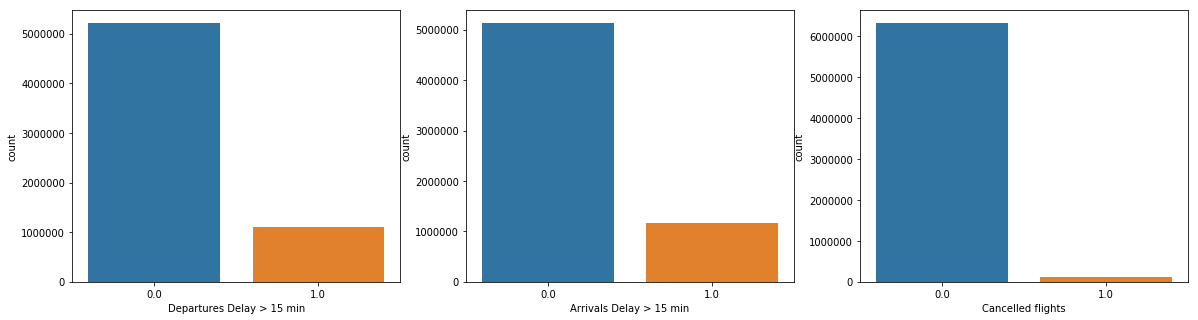

In [26]:
# Gráficas anuales
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.countplot(dfanual['DepDel15'], label='Frecuencia')
plt.xlabel('Departures Delay > 15 min')

plt.subplot(1,3,2)
sns.countplot(dfanual['ArrDel15'], label='Frecuencia')
plt.xlabel('Arrivals Delay > 15 min')

plt.subplot(1,3,3)
sns.countplot(dfanual['Cancelled'], label='Frecuencia')
plt.xlabel('Cancelled flights')


plt.show()

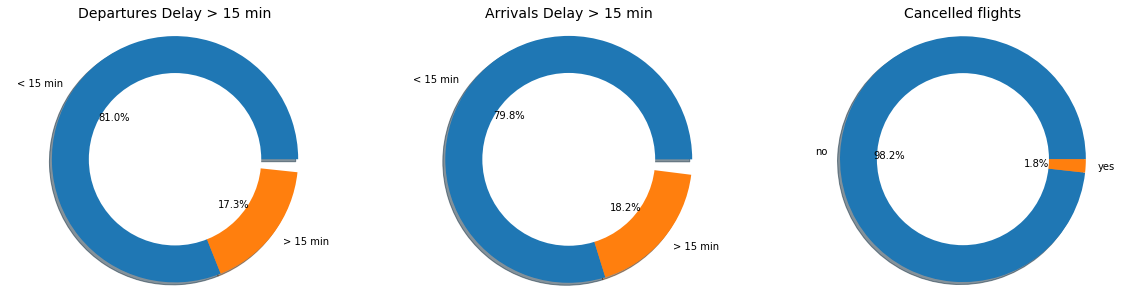

In [27]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 5))
etiquetas_1 = ['< 15 min', '> 15 min']
etiquetas_2 = ['no', 'yes']
fracs_dep = [len(dfanual[dfanual['DepDel15'] == 0])/len(dfanual['DepDel15']),
             len(dfanual[dfanual['DepDel15'] ==1])/len(dfanual['DepDel15'])]
fracs_arr = [len(dfanual[dfanual['ArrDel15'] == 0])/len(dfanual['ArrDel15'])
             , len(dfanual[dfanual['ArrDel15'] == 1])/len(dfanual['ArrDel15'])]
fracs_canc = [len(dfanual[dfanual['Cancelled'] == 0])/len(dfanual['Cancelled']),
              len(dfanual[dfanual['Cancelled'] == 1])/len(dfanual['Cancelled'])]

the_grid = GridSpec(1, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(fracs_dep, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Departures Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs_arr, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_2 = plt.Circle((0, 0), 0.7, fc='white')
fig_2 = plt.gcf()
fig_2.gca().add_artist(centre_circle_2)
plt.axis('equal')
plt.title('Arrivals Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(fracs_canc, labels=etiquetas_2, autopct='%1.1f%%', shadow=True)
centre_circle_3 = plt.Circle((0, 0), 0.7, fc='white')
fig_3 = plt.gcf()
fig_3.gca().add_artist(centre_circle_3)
plt.axis('equal')
plt.title('Cancelled flights', fontsize=14)

plt.show()

## 1.3.1 Adelantos en Salidas de Vuelos

In [28]:
#vuelos que se han adelantado de la hora prevista en salidas
adelantos = (dfanual[dfanual['DepDelay'] < 0])
adelantos = adelantos['DepDelay']
adelantos.shape

(3477083,)

In [29]:
adelantos.describe()

count    3.477083e+06
mean    -4.702620e+00
std      2.937359e+00
min     -2.060000e+02
25%     -6.000000e+00
50%     -4.000000e+00
75%     -2.000000e+00
max     -1.000000e+00
Name: DepDelay, dtype: float64

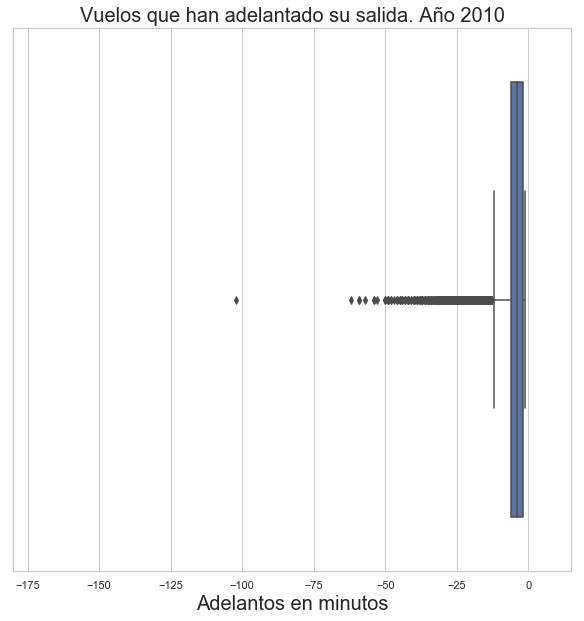

In [30]:
#Vuelos que han adelantado su salida

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-180,15)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

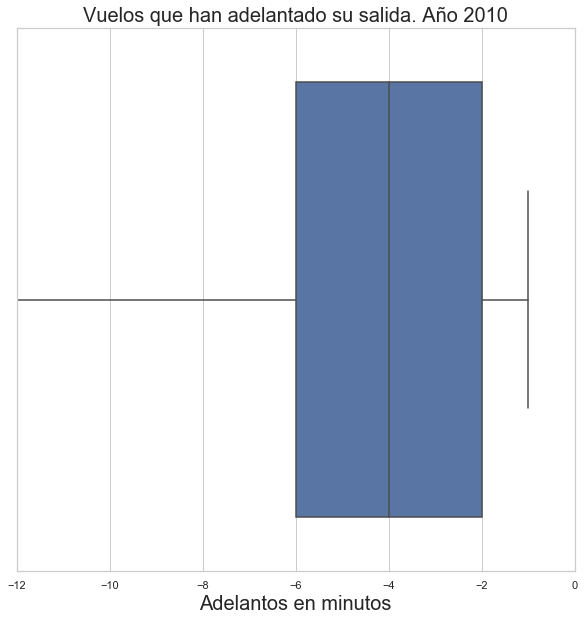

In [31]:
#vamos a reducir la escala para al menos ver la parte principal
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-12,0)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

Los adelantos en salida mayores a 10 minutos son cancelaciones, por lo que no nos eliminamos

In [32]:
len(dfanual[dfanual['DepDelay'] < -15])

12268

## 1.3.2 Retrasos en salidas distribuidos por aerolíneas

In [33]:
retrasosSalidasPorAerolinea = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])

retrasosSalidasPorAerolinea = pd.DataFrame(retrasosSalidasPorAerolinea[['DepDelay', 'IATA_CODE_Reporting_Airline']])
retrasosSalidasPorAerolinea.head(5)

DepDelay IATA_CODE_Reporting_Airline
2       77.0                          MQ
6       81.0                          MQ
9       85.0                          MQ
21      15.0                          MQ
33      22.0                          MQ

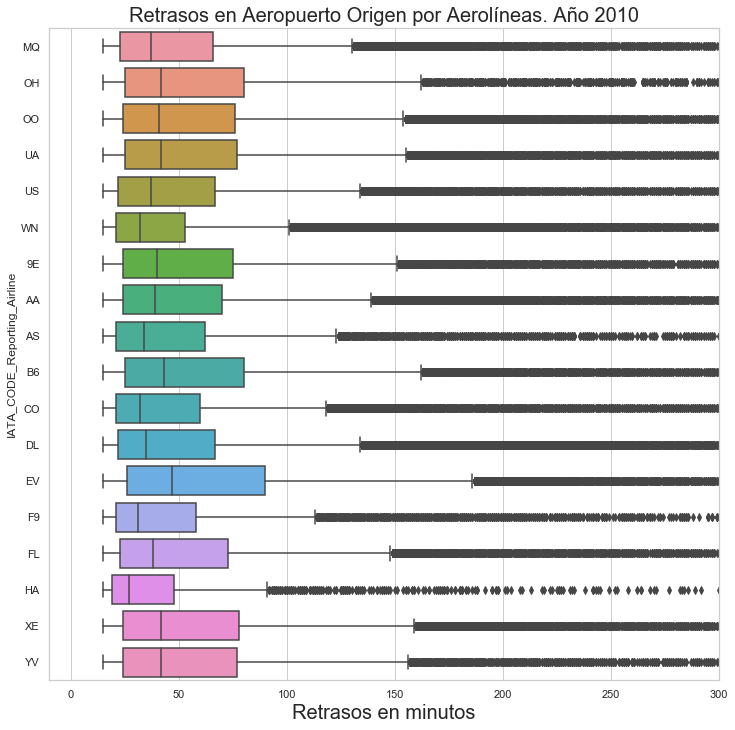

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

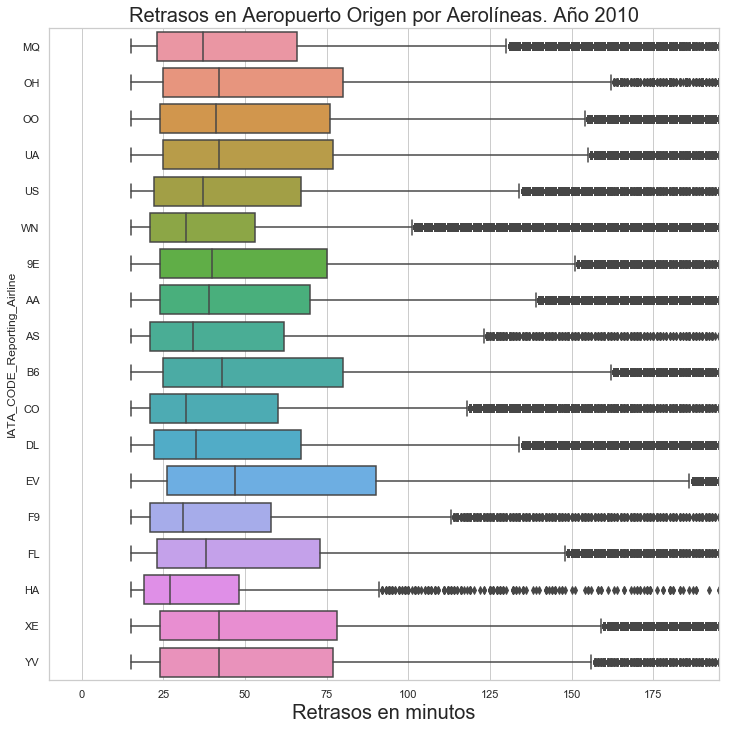

In [35]:
#vamos a limitar un poco más eje x
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,195)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

## 1.3.3 Retrasos en Aeropuerto de Origen

#### Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no en la llegada en el destino)

In [36]:
#Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no
#en la llegada en el destino)
len(dfanual[dfanual['DepDel15'] == 1])

1111751

In [37]:
#retrasos por mes en salidas

vuelosTotalesRetrasadosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosPorMes = vuelosTotalesRetrasadosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1)])}, ignore_index=True)


#sin meter en un pandas, sólo para mostrarlos por print
#for df in dataframes:
#    print(df["Month"][1],len(df[df['DepDel15'] == 1]))

In [38]:
vuelosTotalesRetrasadosPorMes

mes  vuelos
0    1   89270
1    2   86198
2    3   97038
3    4   69963
4    5   93116
5    6  114293
6    7  118474
7    8   95194
8    9   66264
9   10   79660
10  11   77257
11  12  125024

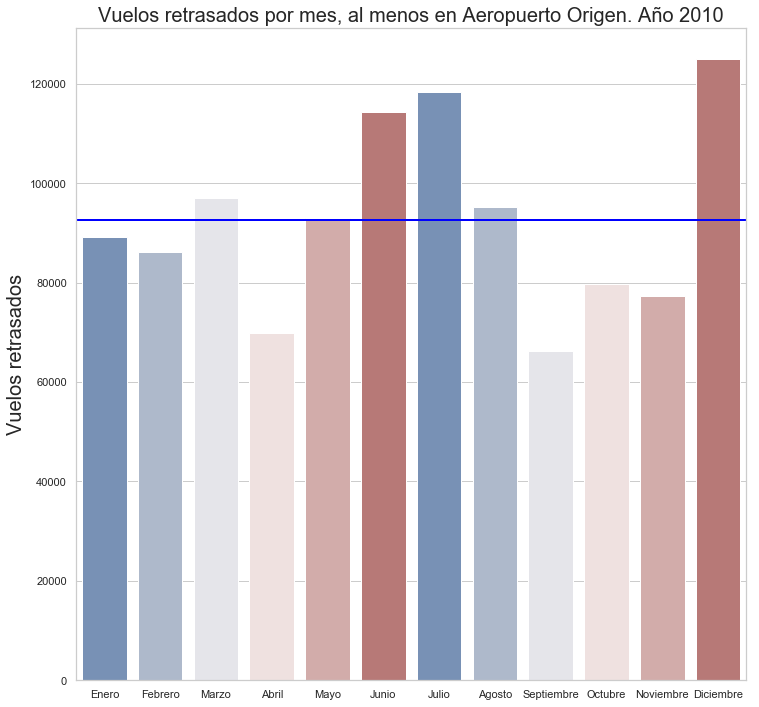

In [39]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, al menos en Aeropuerto Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

#### Retrasados sólo en salidas y no en llegadas, es decir, recuperan el tiempo durante el vuelo. Esto significa que no se marca el retraso por ningún motivo, ya que el retraso se marca en destino por lo que los vuelos con retrasos en salidas sólo se registro el tiempo de retraso.

In [40]:
len(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDel15'] == 0)])

224609

In [41]:
vuelosRestrasadosSoloEnSalidas = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnSalidas = vuelosRestrasadosSoloEnSalidas.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1) & (df['ArrDel15'] == 0)])}, ignore_index=True)


In [42]:
vuelosRestrasadosSoloEnSalidas

mes vuelos
0    1  19277
1    2  17303
2    3  20802
3    4  15463
4    5  17411
5    6  20288
6    7  21513
7    8  19312
8    9  13971
9   10  17451
10  11  17867
11  12  23951

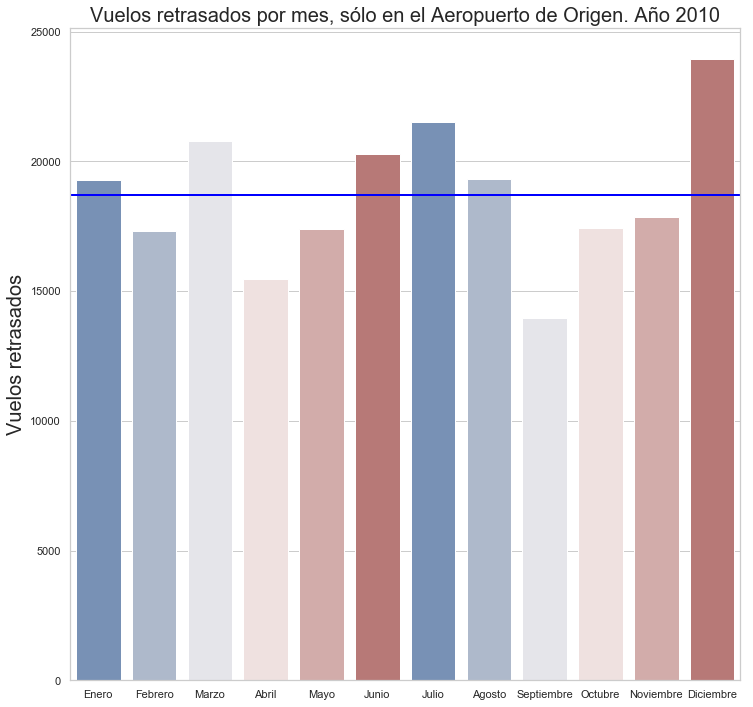

In [43]:
#Vuelos retrasados por mes sólo en salidas (no tenemos los motivos de los retrasos en este caso, al llegar en hora a destino)

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnSalidas['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnSalidas['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

Nos vamos a quedar sólo con los retrasados en salidas (tanto si recuperaron el tiempo a la llegado como si no)
para ver la media y cuartiles, así como los posibles outliers

In [44]:
retrasosSalidas = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
retrasosSalidas.head(5)

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
2            2  2010        1      1          24          7  2010-01-24   
6            6  2010        1      1          28          4  2010-01-28   
9            9  2010        1      1          31          7  2010-01-31   
21          21  2010        1      1          15          5  2010-01-15   
33          33  2010        1      1          29          5  2010-01-29   

   Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  Flights  \
2                 MQ                          MQ      N828MQ  ...      1.0   
6                 MQ                          MQ      N801MQ  ...      1.0   
9                 MQ                          MQ      N713MQ  ...      1.0   
21                MQ                          MQ      N722MQ  ...      1.0   
33                MQ                          MQ      N733MQ  ...      1.0   

   Distance DistanceGroup CarrierDelay WeatherDelay NASDelay SecurityDelay  \
2     431.0             2          0.0          0.0    100.0           0.0   
6     431.0             2          0.0          0.0    113.0           0.0   
9     431.0             2         67.0          0.0      0.0           0.0   
21    562.0             3          NaN          NaN      NaN           NaN   
33    562.0             3          NaN          NaN      NaN           NaN   

    LateAircraftDelay  Flight_Code    Route  
2                 0.0       MQ4435  RDU-LGA  
6                 6.0       MQ4435  RDU-LGA  
9                 0.0       MQ4435  RDU-LGA  
21                NaN       MQ4436  BNA-DCA  
33                NaN       MQ4436  BNA-DCA  

[5 rows x 51 columns]

In [45]:
retrasosSalidas = pd.DataFrame(retrasosSalidas['DepDelay'])

retrasosSalidas.head(5)

DepDelay
2       77.0
6       81.0
9       85.0
21      15.0
33      22.0

In [46]:
retrasosSalidas.describe().T

count      mean        std   min   25%   50%   75%     max
DepDelay  1111751.0  55.27783  54.422984  15.0  23.0  37.0  67.0  1626.0

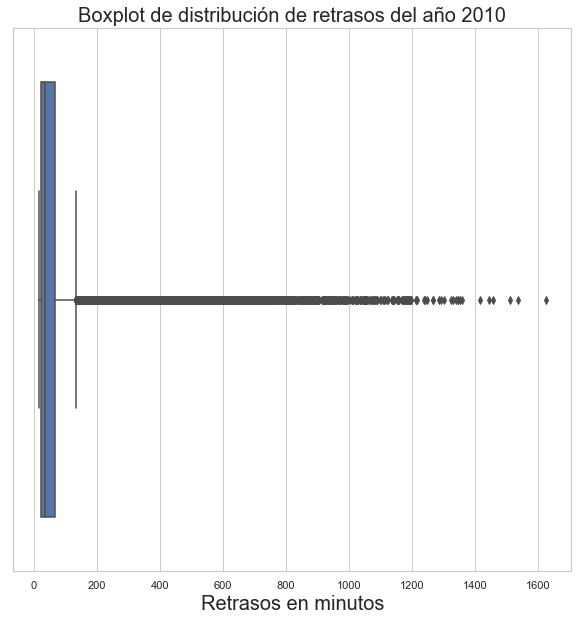

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

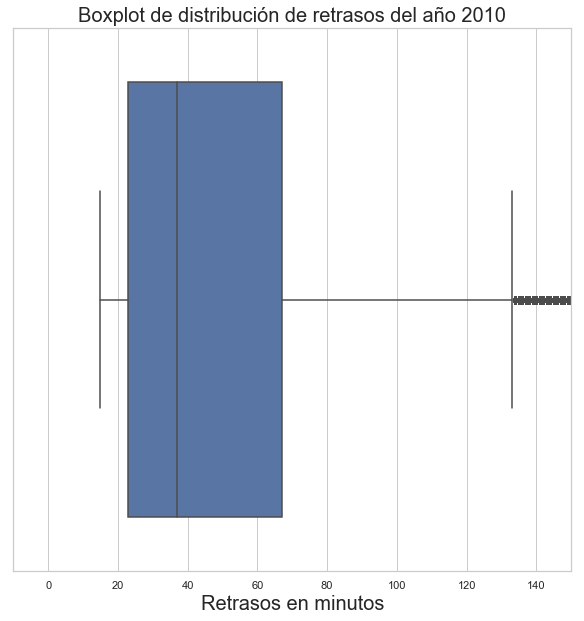

In [48]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-10,150)
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

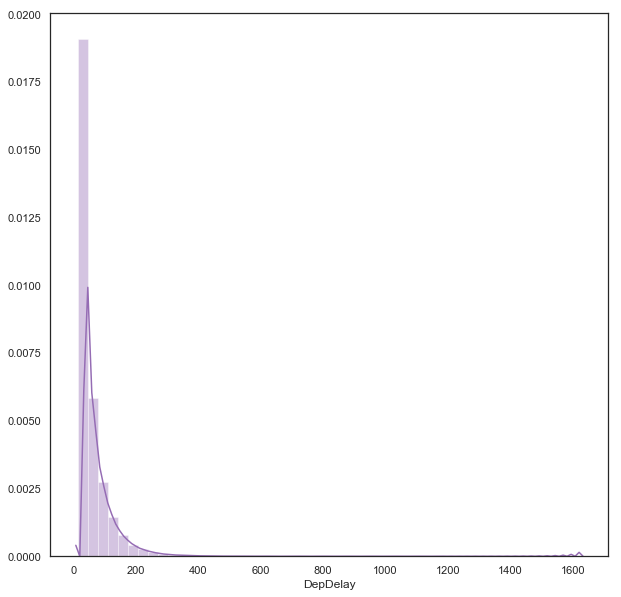

In [49]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSalidas["DepDelay"], color="m")

plt.show()

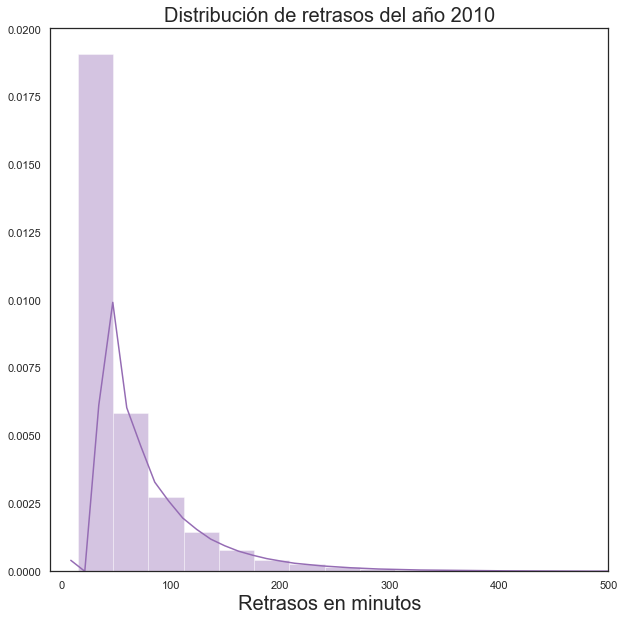

In [50]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSalidas["DepDelay"], color="m")
plt.xlim(-10,500)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 250 minutos de retraso

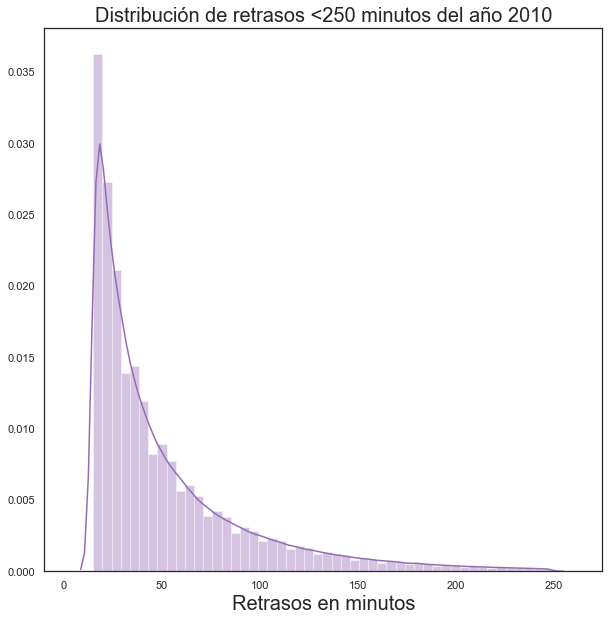

In [51]:
corte250Min = pd.DataFrame(retrasosSalidas[retrasosSalidas["DepDelay"]<250])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte250Min["DepDelay"], color="m")
plt.xlim(-10,275)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <250 minutos del año ' + year, fontsize=20)


plt.show()

### 1.3.3.1 Ranking de aeropuertos en Retrasos en salidas

In [52]:
dfanual[dfanual['DepDel15'] == 1].Origin.value_counts(sort=True).head(15)

ATL    78479
ORD    62813
DFW    52278
DEN    44667
LAX    32973
SFO    31843
DTW    31627
IAH    29433
LAS    29218
PHX    28815
JFK    24571
MDW    24072
EWR    23778
BWI    23530
MSP    23410
Name: Origin, dtype: int64

In [53]:
#primero cogemos los 45 aeropuertos (de origen) con mayor número de retrasos
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDelay'] == 1].Origin.value_counts(sort=True)).head(45)

In [54]:
#retrasos totales de esos 45 aeropuerto
retrasosSalidaEnAeropuertos.sum()

Origin    169764
dtype: int64

In [55]:
#el 85% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80Aeropuertos = ((retrasosSalidaEnAeropuertos.sum() / (len(dfanual[dfanual['DepDel15'] == 1])))) *100

In [56]:
pct80Aeropuertos = (pct80Aeropuertos -100) * (-1)

In [57]:
print('45 aeropuertos concentran el %.2f' %pct80Aeropuertos + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 84.73% de los retrasos del año 2010


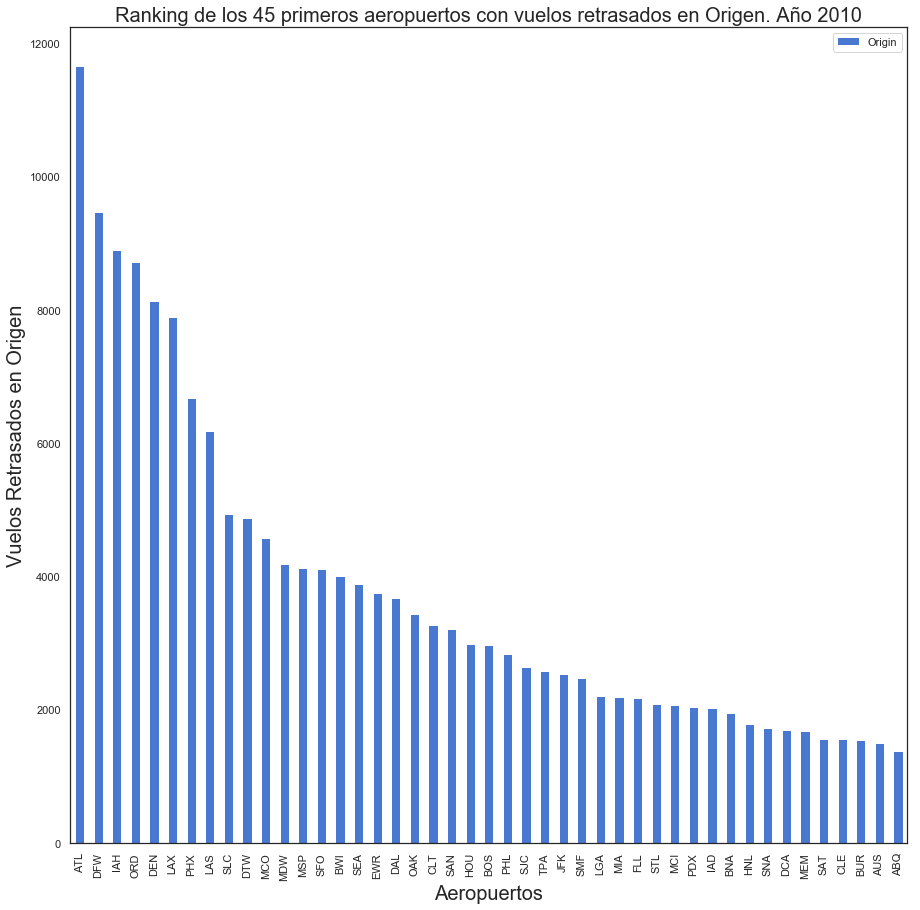

In [58]:
ax = retrasosSalidaEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados en Origen", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), DFW (Dallas) y IAH(Houston) y  concentran más del 20% de los retrasos

In [59]:
retrasosSalidaEnAeropuertos = retrasosSalidaEnAeropuertos.reset_index()
retrasosSalidaEnAeropuertos.columns = ['Origin','DepDelay']

In [60]:
retrasosSalidaEnAeropuertos.head(45)

Origin  DepDelay
0     ATL     11657
1     DFW      9466
2     IAH      8894
3     ORD      8716
4     DEN      8134
5     LAX      7896
6     PHX      6680
7     LAS      6175
8     SLC      4936
9     DTW      4881
10    MCO      4576
11    MDW      4189
12    MSP      4121
13    SFO      4102
14    BWI      4002
15    SEA      3889
16    EWR      3753
17    DAL      3670
18    OAK      3437
19    CLT      3265
20    SAN      3200
21    HOU      2980
22    BOS      2962
23    PHL      2838
24    SJC      2638
25    TPA      2570
26    JFK      2539
27    SMF      2472
28    LGA      2197
29    MIA      2194
30    FLL      2171
31    STL      2089
32    MCI      2074
33    PDX      2038
34    IAD      2029
35    BNA      1942
36    HNL      1785
37    SNA      1715
38    DCA      1695
39    MEM      1677
40    SAT      1558
41    CLE      1555
42    BUR      1539
43    AUS      1497
44    ABQ      1371

In [61]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSalidaEnAeropuertos["Origin"].values.tolist()

In [62]:
#nos quedamos con los datos de esos aeropuertos
retrasosSalidaEnAeropuertos = dfanual.loc[(dfanual["Origin"].isin(aeropuertos))]

In [63]:
retrasosSalidaEnAeropuertos

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
10              10  2010        1      1           3          7  2010-01-03   
11              11  2010        1      1           4          1  2010-01-04   
12              12  2010        1      1           5          2  2010-01-05   
13              13  2010        1      1           6          3  2010-01-06   
14              14  2010        1      1           7          4  2010-01-07   
15              15  2010        1      1           8          5  2010-01-08   
16              16  2010        1      1          10          7  2010-01-10   
17              17  2010        1      1          11          1  2010-01-11   
18              18  2010        1      1          12          2  2010-01-12   
19              19  2010        1      1          13          3  2010-01-13   
20              20  2010        1      1          14          4  2010-01-14   
21              21  2010        1      1          15          5  2010-01-15   
22              22  2010        1      1          17          7  2010-01-17   
23              23  2010        1      1          18          1  2010-01-18   
24              24  2010        1      1          19          2  2010-01-19   
25              25  2010        1      1          20          3  2010-01-20   
26              26  2010        1      1          21          4  2010-01-21   
27              27  2010        1      1          22          5  2010-01-22   
28              28  2010        1      1          24          7  2010-01-24   
29              29  2010        1      1          25          1  2010-01-25   
30              30  2010        1      1          26          2  2010-01-26   
31              31  2010        1      1          27          3  2010-01-27   
32              32  2010        1      1          28          4  2010-01-28   
33              33  2010        1      1          29          5  2010-01-29   
34              34  2010        1      1          31          7  2010-01-31   
35              35  2010        1      1           2          6  2010-01-02   
36              36  2010        1      1           3          7  2010-01-03   
37              37  2010        1      1           4          1  2010-01-04   
38              38  2010        1      1           5          2  2010-01-05   
39              39  2010        1      1           6          3  2010-01-06   
...            ...   ...      ...    ...         ...        ...         ...   
537758      539258  2010        4     12          28          2  2010-12-28   
537759      539259  2010        4     12          28          2  2010-12-28   
537760      539260  2010        4     12          28          2  2010-12-28   
537761      539261  2010        4     12          28          2  2010-12-28   
537762      539262  2010        4     12          28          2  2010-12-28   
537763      539263  2010        4     12          28          2  2010-12-28   
537764      539264  2010        4     12          28          2  2010-12-28   
537765      539265  2010        4     12          28          2  2010-12-28   
537766      539266  2010        4     12          28          2  2010-12-28   
537767      539267  2010        4     12          28          2  2010-12-28   
537768      539268  2010        4     12          28          2  2010-12-28   
537769      539269  2010        4     12          28          2  2010-12-28   
537770      539270  2010        4     12          28          2  2010-12-28   
537771      539271  2010        4     12          28          2  2010-12-28   
537772      539272  2010        4     12          28          2  2010-12-28   
537773      539273  2010        4     12          28          2  2010-12-28   
537774      539274  2010        4     12          28          2  2010-12-28   
537775      539275  2010        4     12          28          2  2010-12-28   
537776      539276  2010        4     12          28      

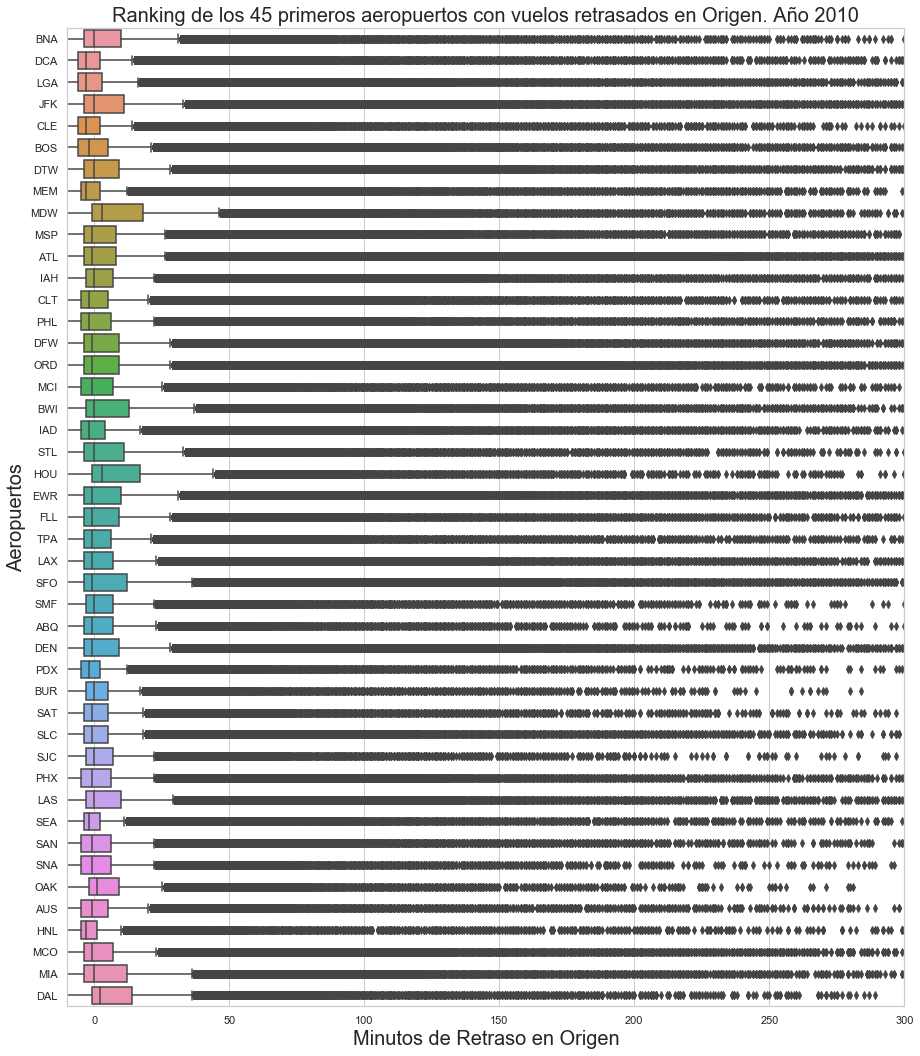

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

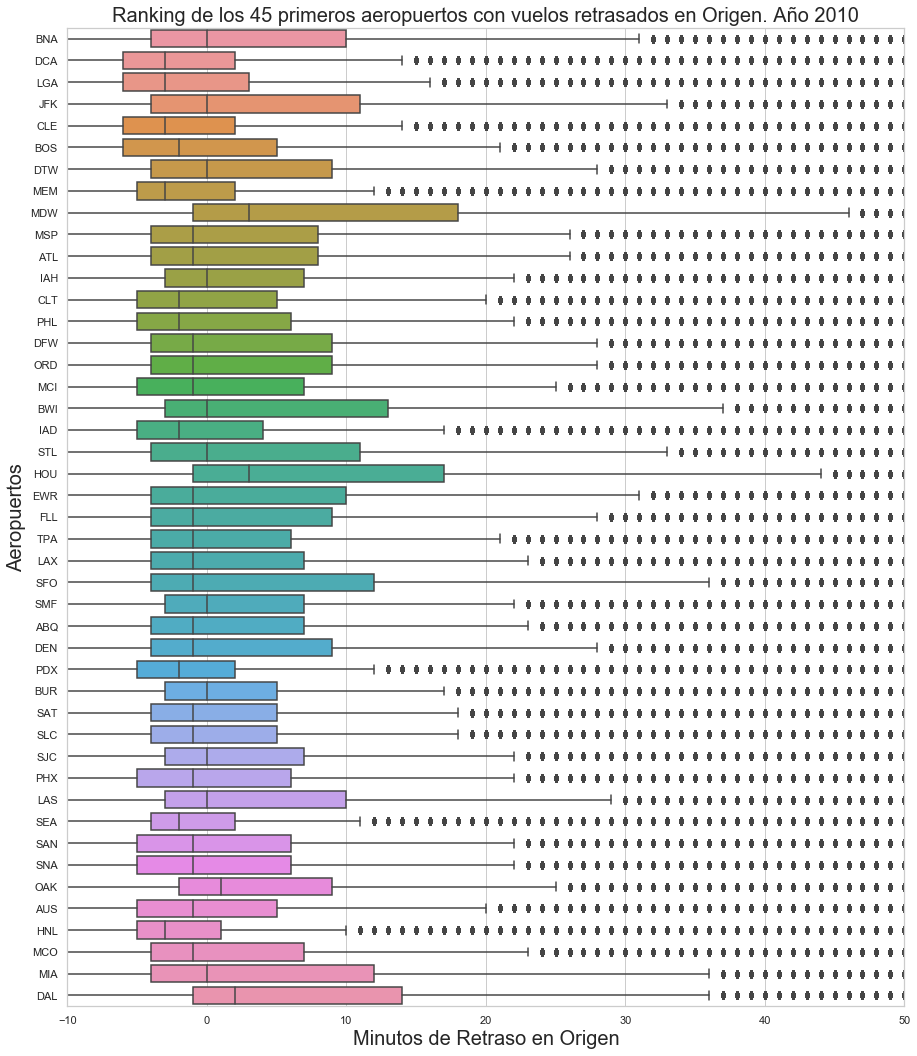

In [65]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,50)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

In [66]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en salidas
vuelosTotalesPorAeropuerto = retrasosSalidaEnAeropuertos.groupby('Origin').aggregate({'Origin': 'count', 'DepDel15':'sum'})

In [67]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Origin': 'VuelosTotales', 'DepDel15': 'VuelosRetrasados'})

In [68]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados de salida en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [69]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de salida en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

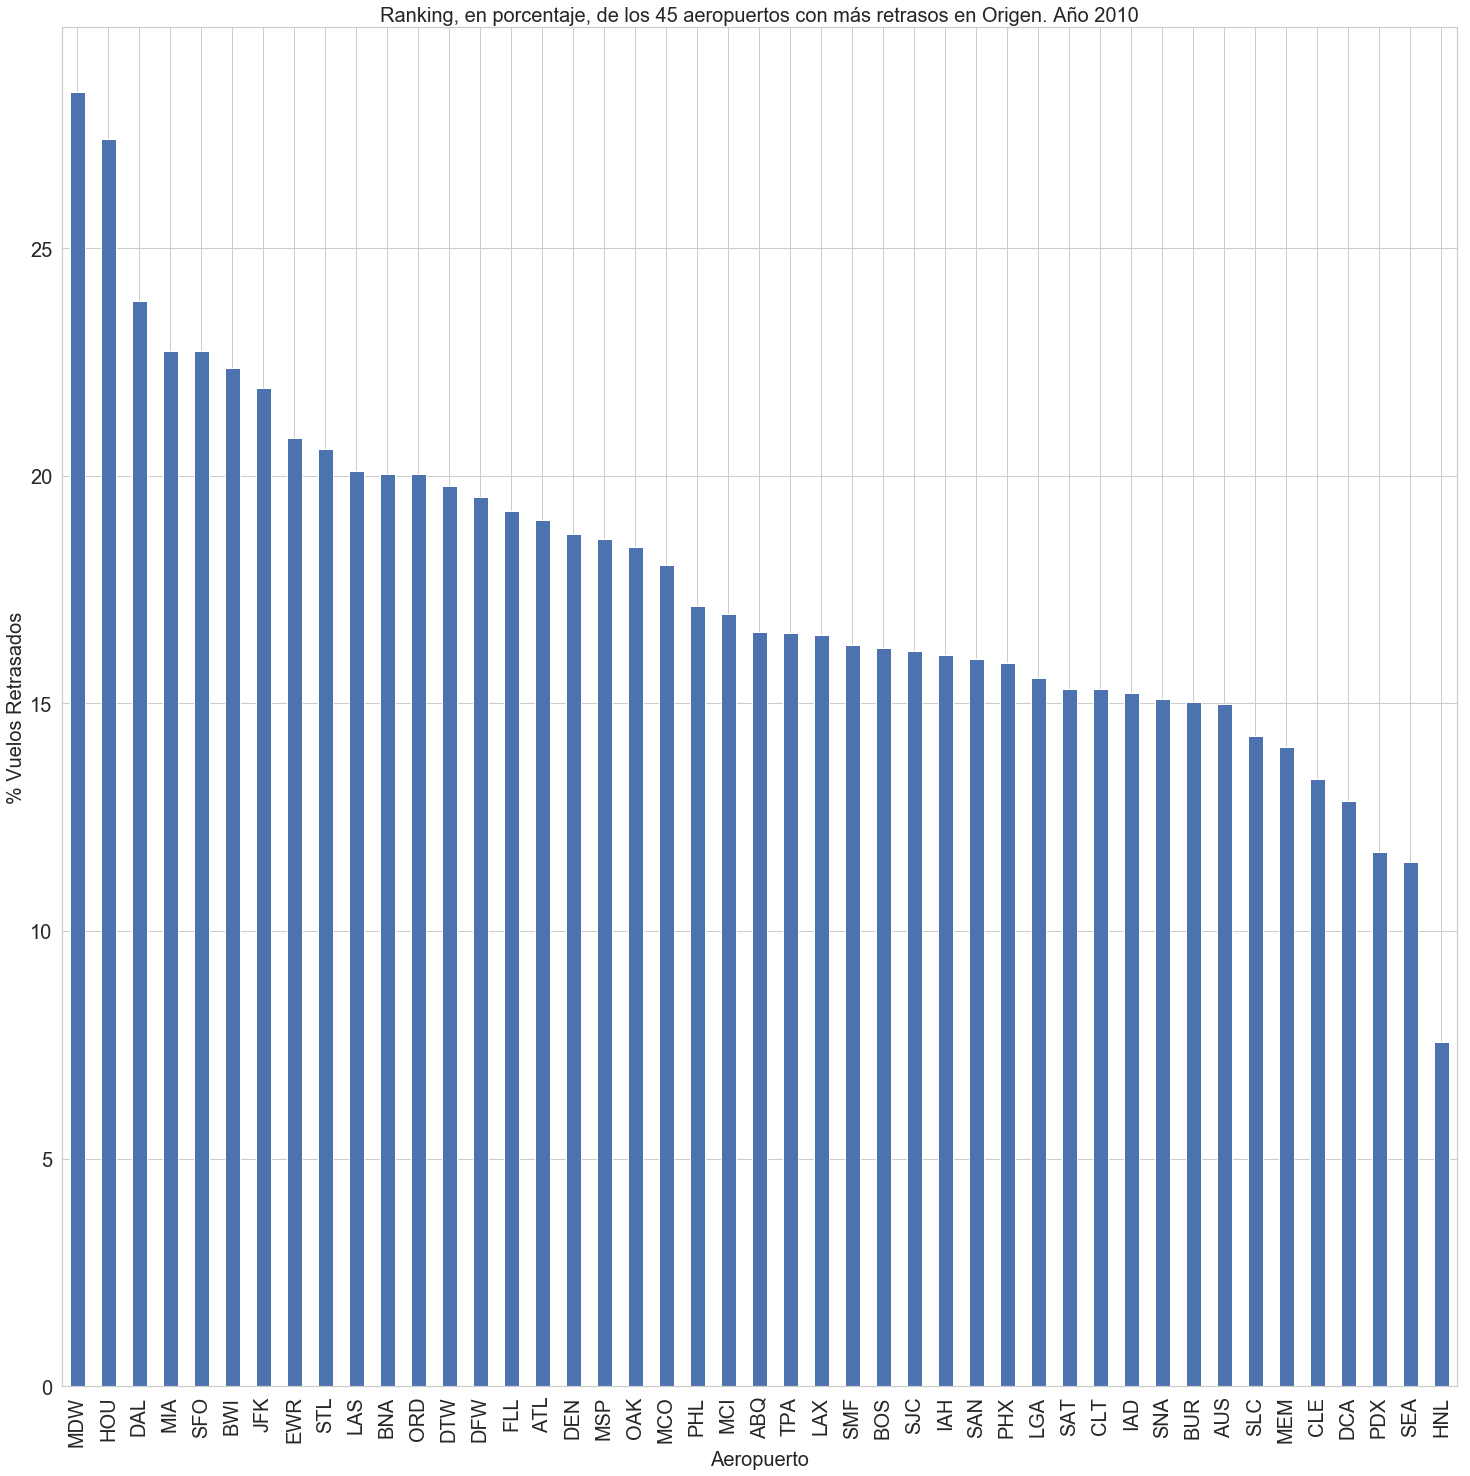

In [70]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Dado que no podemos discernir si el mal tiempo fue a la llegada o la salida, en los retrasos de los vuelos de salida, así como en el caso de que el motivo sea el espacio aéreo, sólo podemos sacar el retraso, en llegadas, en función de la llegada tardía del vuelo anterior y por la aerolínea.

In [71]:
retrasosSalidaEnAeropuertos = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['DepDel15'] == 1])

In [72]:
retrasosSalidaEnAeropuertos.shape

(870761, 51)

In [73]:
#retrasos medios en salidas por aeropuerto causados por la llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['LateAircraftDelay'] > 0])


In [74]:
#usamos la media
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'LateAircraftDelay' : 'mean'})

In [75]:
#renombramos las columnas
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'LateAircraftDelay' : 'MediaTiempoRetrasado'})

In [76]:
#ordenamos por aeropuertos con retraso por llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['MediaTiempoRetrasado'], ascending=False)

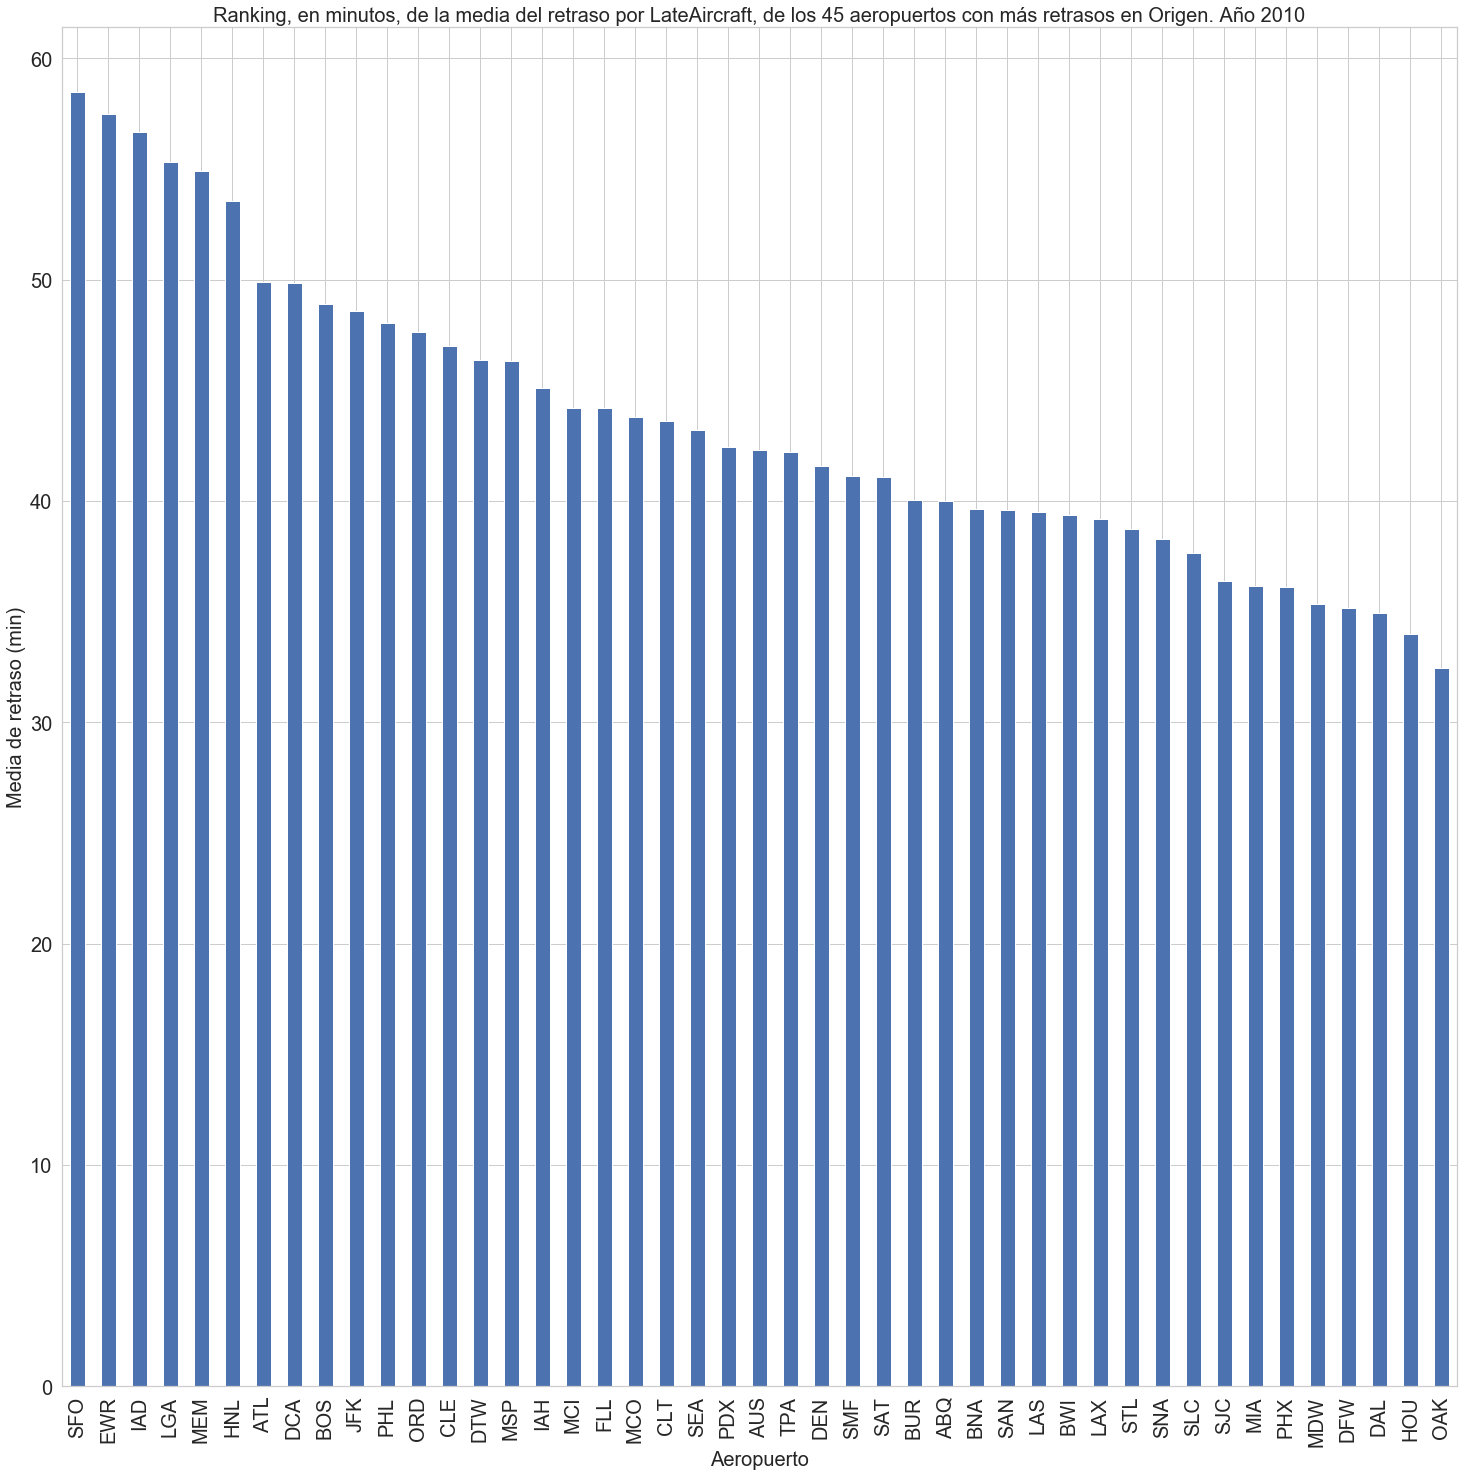

In [77]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorLateAircraft.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por LateAircraft, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

In [78]:
#mostramos el peso del retraso por llegada tardía del avión respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorLateAircraft['PesoRetraso'] = (retrasoMedioEnSalidasPorLateAircraft['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorLateAircraft['MediaRetrasoTotal'])*100


In [79]:
#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['PesoRetraso'], ascending=False)

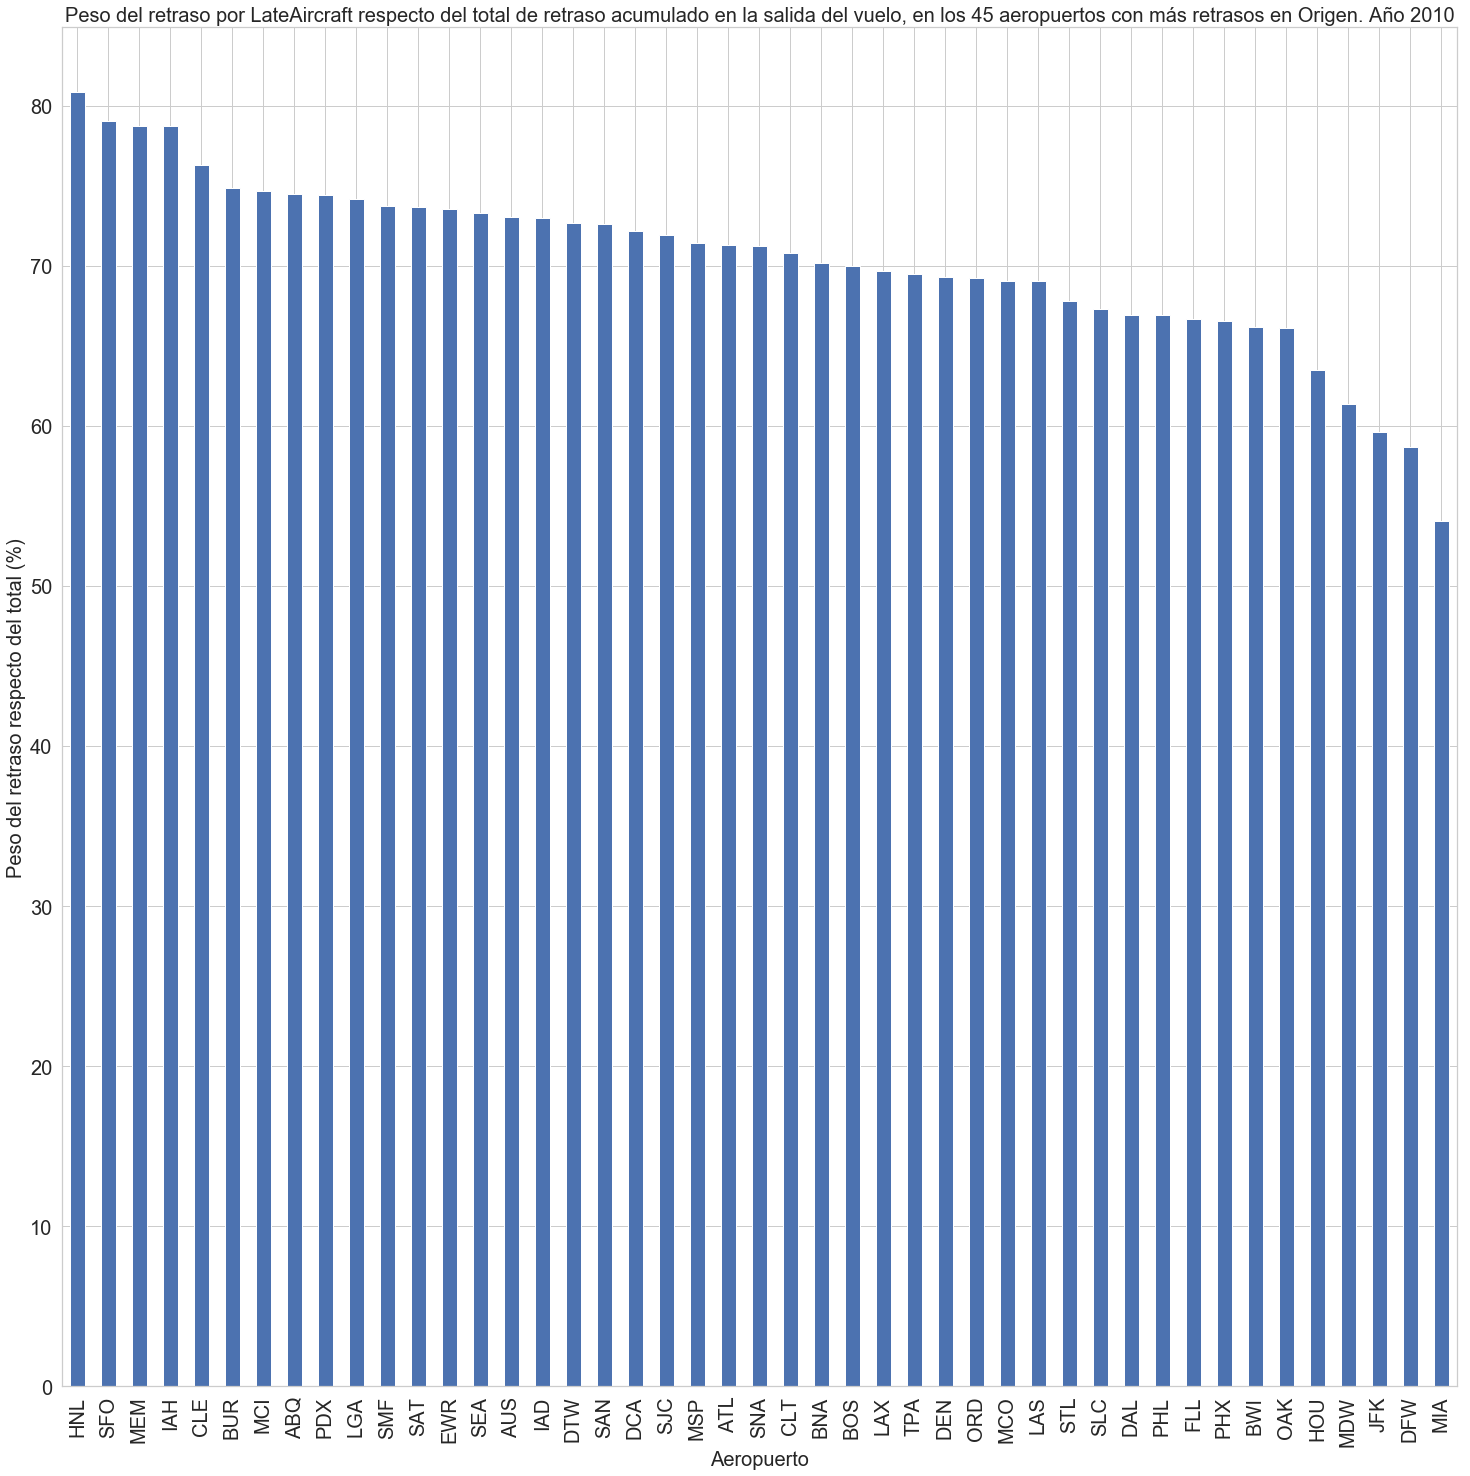

In [80]:
#mostramos  el peso del retraso de llegada tardía del vuelo anterior respecto del retraso total

ax = retrasoMedioEnSalidasPorLateAircraft.PesoRetraso.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%)", fontsize=20)
ax.set_title('Peso del retraso por LateAircraft respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la llegada tardía del vuelo anterior, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

In [81]:
#retrasos medios en salidas por aeropuerto causados por problemas de la aerolínea
retrasoMedioEnSalidasPorAerolinea = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['CarrierDelay'] > 0])

#usamos la media 
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'CarrierDelay' : 'mean'})

#renombramos las columnas
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'CarrierDelay' : 'MediaTiempoRetrasado'})

#ordenamos por aeropuertos con retraso por motivo de la aerolinea
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['MediaTiempoRetrasado'], ascending=False)

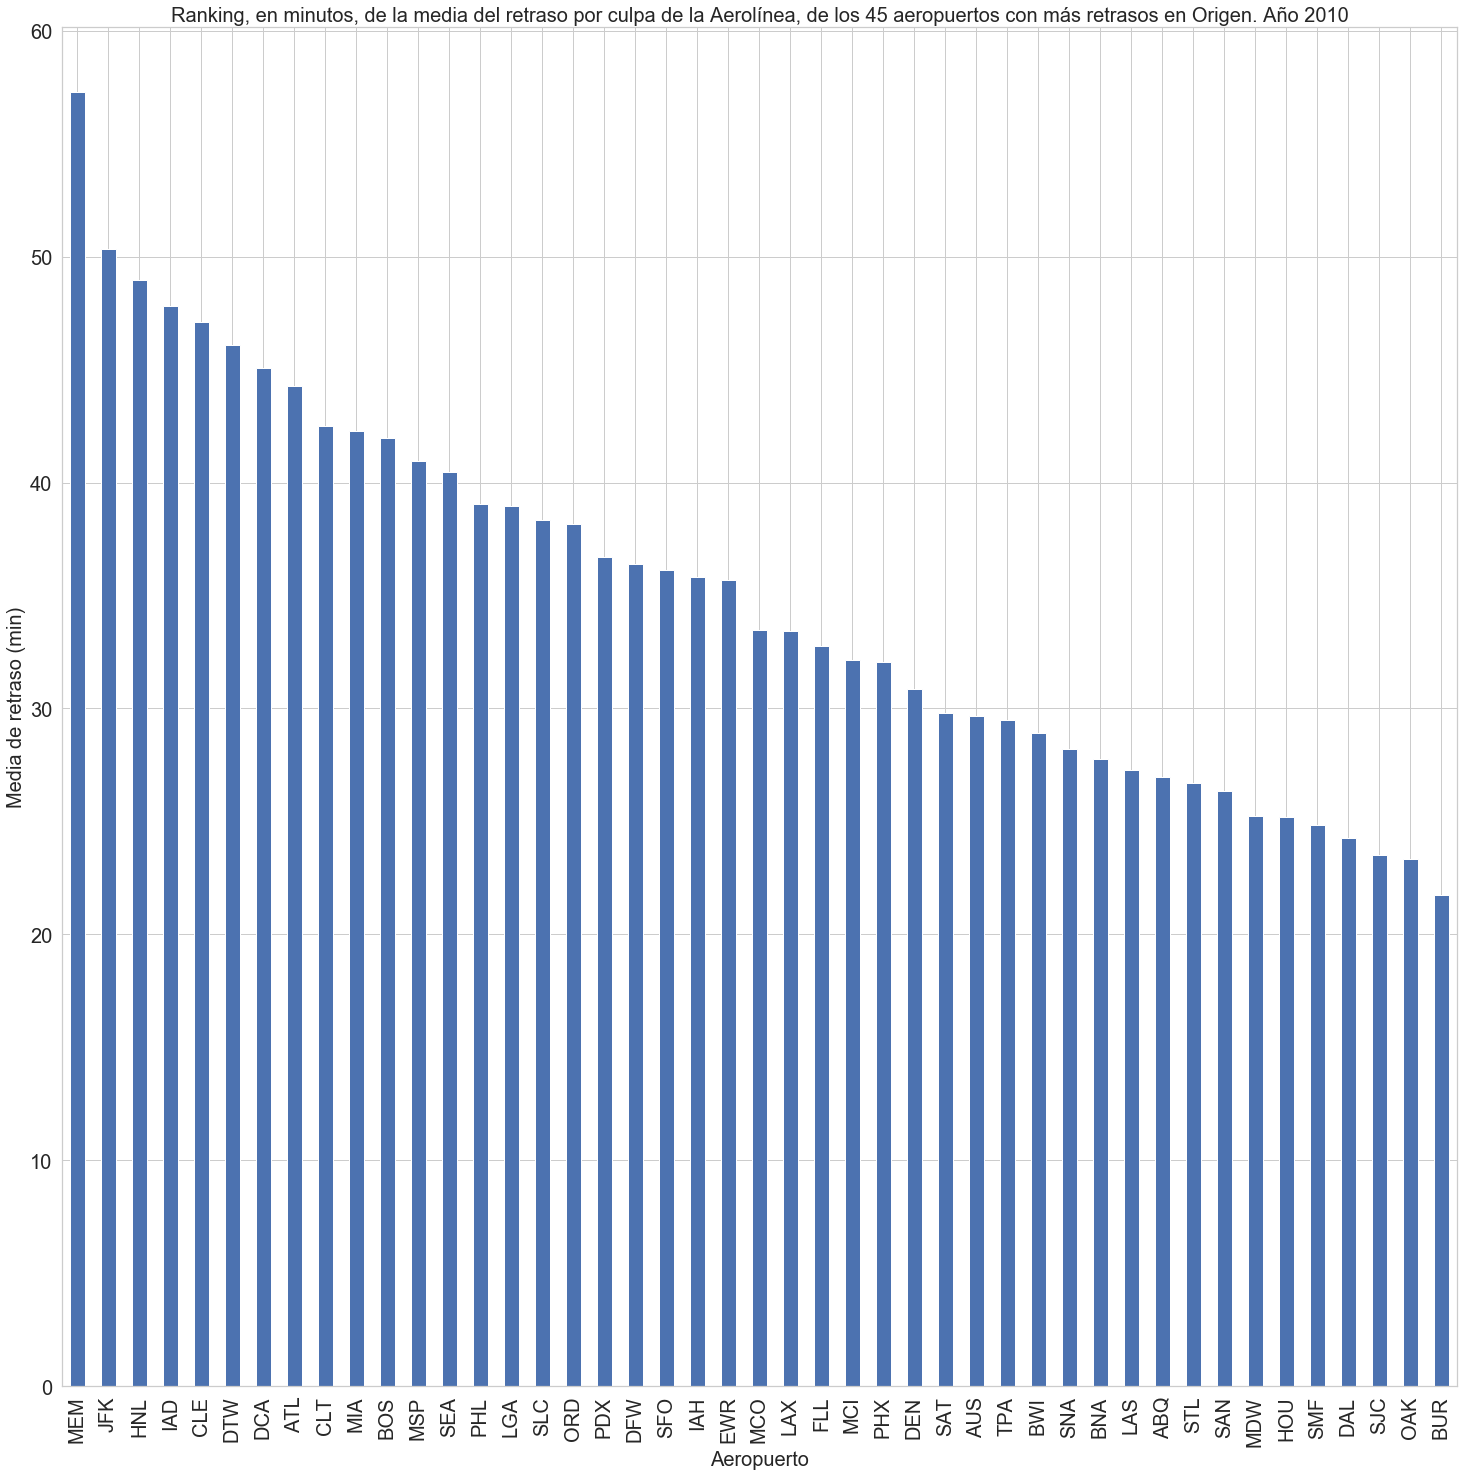

In [82]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorAerolinea.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por culpa de la Aerolínea, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

In [83]:
#mostramos el peso del retraso por la aerolínea respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorAerolinea['PesoRetraso'] = (retrasoMedioEnSalidasPorAerolinea['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorAerolinea['MediaRetrasoTotal'])*100

#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['PesoRetraso'], ascending=False)


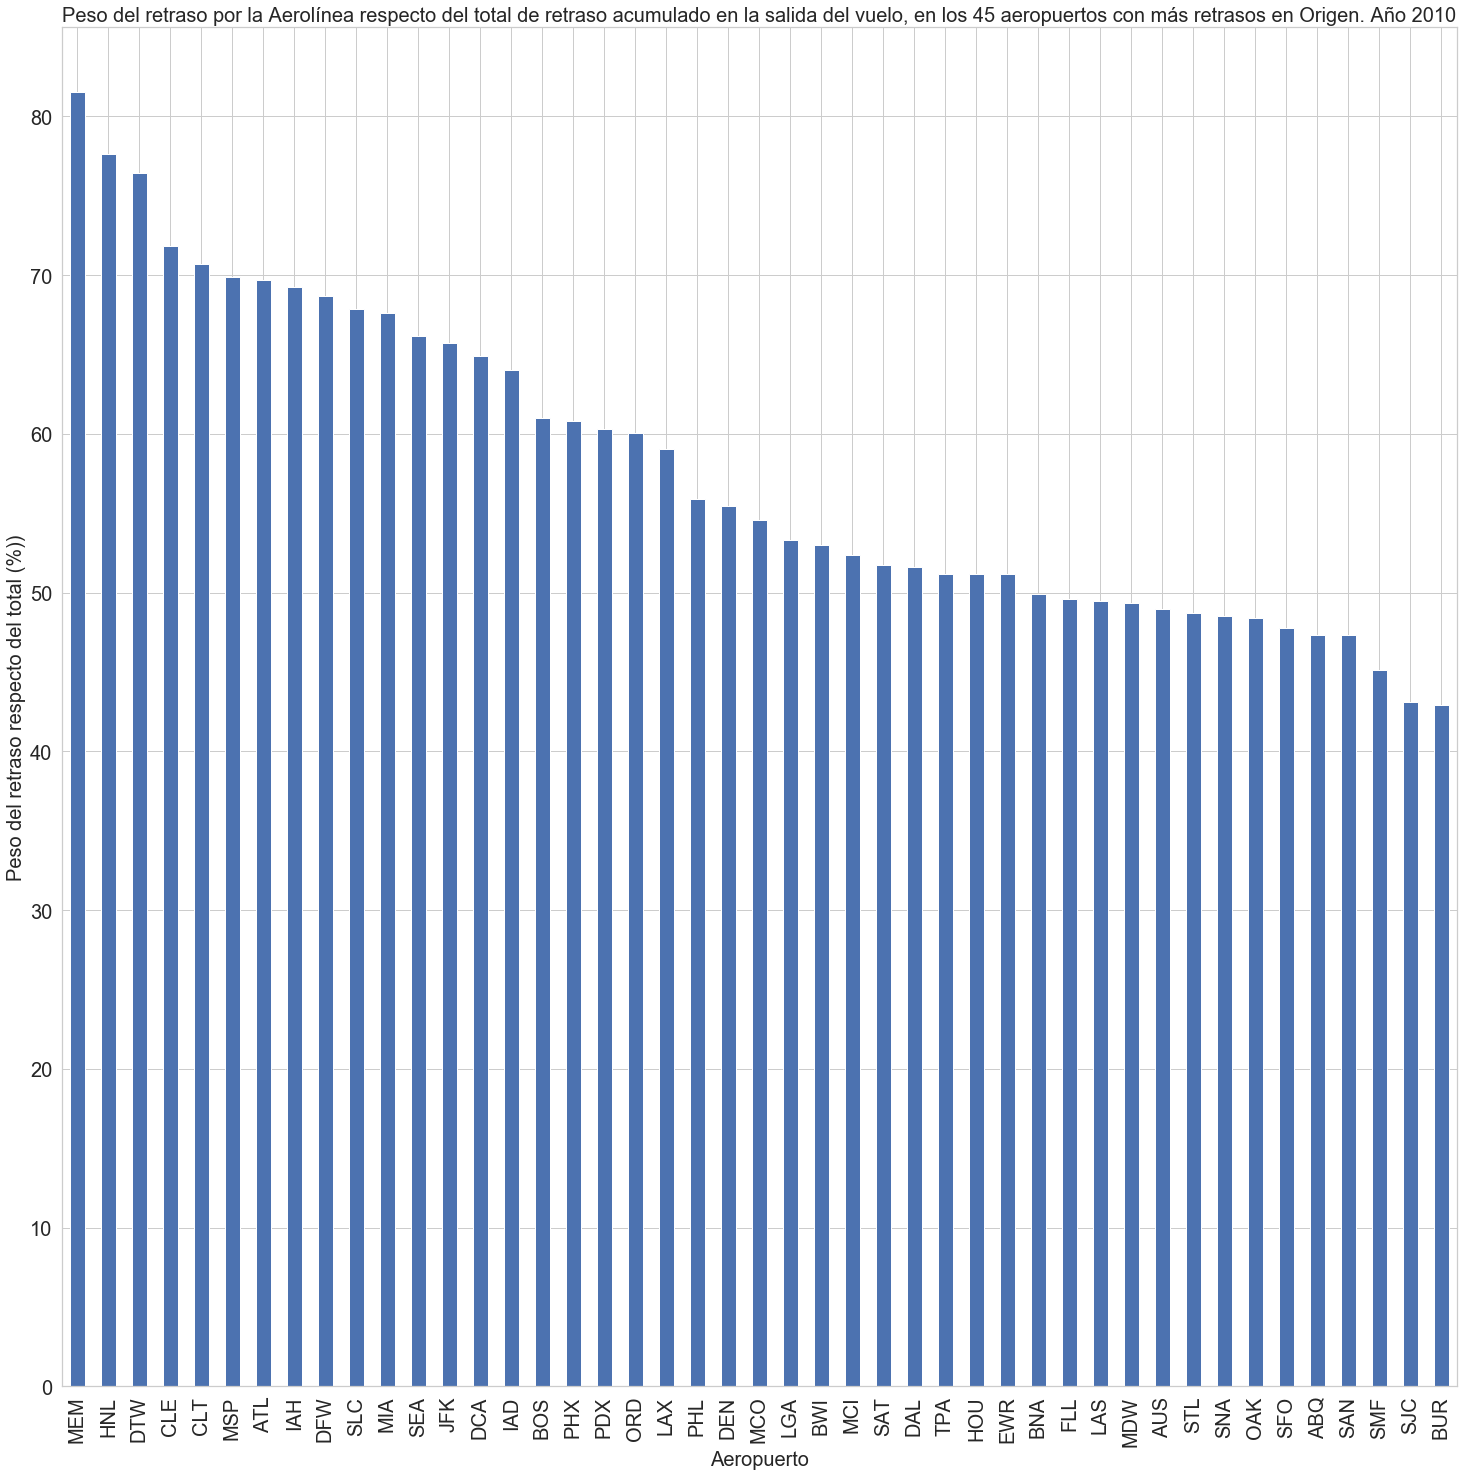

In [84]:
#mostramos el peso del retraso de la aerolínea respecto del retraso total

ax = retrasoMedioEnSalidasPorAerolinea.PesoRetraso.plot(kind='bar',
                                figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%))", fontsize=20)
ax.set_title('Peso del retraso por la Aerolínea respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la aerolínea, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

#### Vamos a coger las 3 combinaciones posibles para tratar de afinar más los motivos de retrasos en salidas
1. Que tenga retraso tanto por Aerolínea como por llegada tardía del avión
2. Que tenga retraso sólo por llegada tardía del avión
3. Que tengra retraso sólo por aerolínea

In [85]:
#primero cogemos todos los retrasos, sean cual sea el tipo en salidas
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
#nos quedamos con los 45 aeropuertos con más retrasos
retrasosSalidaEnAeropuertos= retrasosSalidaEnAeropuertos.loc[(retrasosSalidaEnAeropuertos["Origin"].isin(aeropuertos))]


In [86]:
retrasosSalidaEnAeropuertos.shape

(870761, 51)

In [87]:
#ahora cogemos las 3 combinaciones

#ambos tipos de retrasos
retrasosSalidaEnAeropuertosLateAndAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por llegada tardía del avión anterior
retrasosSalidaSoloLateAircraft = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por la aerolínea
retrasosSalidaSoloAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] == 0)])


In [88]:
#nos quedamos con los retrasos de los 45 primeros aeropuertos (por número de retrasos)

retrasosSalidaEnAeropuertosLateAndAirline= retrasosSalidaEnAeropuertosLateAndAirline.loc[(retrasosSalidaEnAeropuertosLateAndAirline["Origin"].isin(aeropuertos))]
retrasosSalidaSoloLateAircraft= retrasosSalidaSoloLateAircraft.loc[(retrasosSalidaSoloLateAircraft["Origin"].isin(aeropuertos))]
retrasosSalidaSoloAirline= retrasosSalidaSoloAirline.loc[(retrasosSalidaSoloAirline["Origin"].isin(aeropuertos))]


In [89]:
retrasosSalidaEnAeropuertosLateAndAirline.shape

(199942, 51)

In [90]:
retrasosSalidaSoloLateAircraft.shape

(210732, 51)

In [91]:
retrasosSalidaSoloAirline.shape

(209344, 51)

In [92]:
#podríamos inferir los de meteo en salidas si:
#el retraso de llegadas es menor o igual que al de salida y el conteo de meteo = al de salida

retrasosSalidaSoloMeteo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['WeatherDelay'] == dfanual['DepDelay'])])

In [93]:
retrasosSalidaSoloMeteo= retrasosSalidaSoloMeteo.loc[(retrasosSalidaSoloMeteo["Origin"].isin(aeropuertos))]

In [94]:
retrasosSalidaSoloMeteo.shape

(624, 51)

In [95]:
retrasosSalidaSoloNAS = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['NASDelay'] == dfanual['DepDelay'])])

In [96]:
retrasosSalidaSoloNAS= retrasosSalidaSoloNAS.loc[(retrasosSalidaSoloNAS["Origin"].isin(aeropuertos))]

In [97]:
retrasosSalidaSoloNAS.shape

(1047, 51)

In [98]:
retrasosSalidaSoloSecurity = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['SecurityDelay'] == dfanual['DepDelay'])])

In [99]:
retrasosSalidaSoloSecurity = retrasosSalidaSoloSecurity.loc[(retrasosSalidaSoloSecurity["Origin"].isin(aeropuertos))]

In [100]:
retrasosSalidaSoloSecurity.shape

(77, 51)

In [101]:
retrasosSalidaSoloLateAircraft2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['LateAircraftDelay'] == dfanual['DepDelay'])])

In [102]:
retrasosSalidaSoloLateAircraft2 = retrasosSalidaSoloLateAircraft2.loc[(retrasosSalidaSoloLateAircraft2["Origin"].isin(aeropuertos))]

In [103]:
retrasosSalidaSoloLateAircraft2.shape

(5631, 51)

In [104]:
retrasosSalidaSoloAerolinea2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['CarrierDelay'] == dfanual['DepDelay'])])

retrasosSalidaSoloAerolinea2 = retrasosSalidaSoloAerolinea2.loc[(retrasosSalidaSoloAerolinea2["Origin"].isin(aeropuertos))]

retrasosSalidaSoloAerolinea2.shape

(7727, 51)

### 1.3.3.2 Análisis de qué ocurre en el Aeropuerto de Destino si en Origen hay retrasos

#### Vuelos retrasados de salida que llegan con el mismo retraso a la llegada

In [105]:
retrasosSalidaIgualLlegada = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay'])])

In [106]:
retrasosSalidaIgualLlegada = retrasosSalidaIgualLlegada.loc[(retrasosSalidaIgualLlegada["Origin"].isin(aeropuertos))]


#### Vuelos de salida que aumentan su retraso en la llegada (por motivos adicionales a la salida)

In [107]:
retrasosPosterioresSalida = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] < dfanual['ArrDelay'])])

retrasosPosterioresSalida = retrasosPosterioresSalida.loc[(retrasosPosterioresSalida["Origin"].isin(aeropuertos))]


#### Vuelos de salida con retraso que recuperan todo el retraso a la llegada

In [108]:
retrasosRecuperados = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDelay'] <= 0)])

retrasosRecuperados = retrasosRecuperados.loc[(retrasosRecuperados["Origin"].isin(aeropuertos))]


In [109]:
recupera = retrasosRecuperados.shape[0]
igual = retrasosSalidaIgualLlegada.shape[0]
masTarde = retrasosPosterioresSalida.shape[0]

Text(0.5, 1.0, 'Capacidad de recuperación del retraso en destino por retraso en origen')

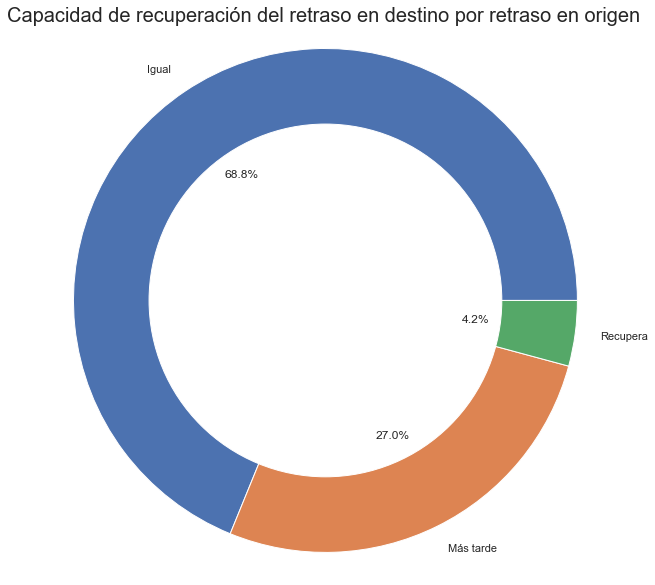

In [110]:
plt.figure(figsize=(10, 10))
etiquetas_1 = ['Igual', 'Más tarde', 'Recupera']
datos = [igual,masTarde, recupera]

plt.pie(datos, labels=etiquetas_1, autopct='%1.1f%%')
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Capacidad de recuperación del retraso en destino por retraso en origen', fontsize=20)

### 1.3.3.3 Visualización retrasos en Destino con duración similar al Origen

In [111]:
#cálculo de los que no recuperan tiempo a la llegada, pero no llegan más tarde, visto por aeropuerto origen, 
#por aerolínea y por distancia del vuelo

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAeropuertoDestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAerolinea = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorDistanciaADestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorDistanciaADestino = retrasosSalidaIgualLlegadaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [112]:
#ordenamos por de mayor a menor retraso
retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


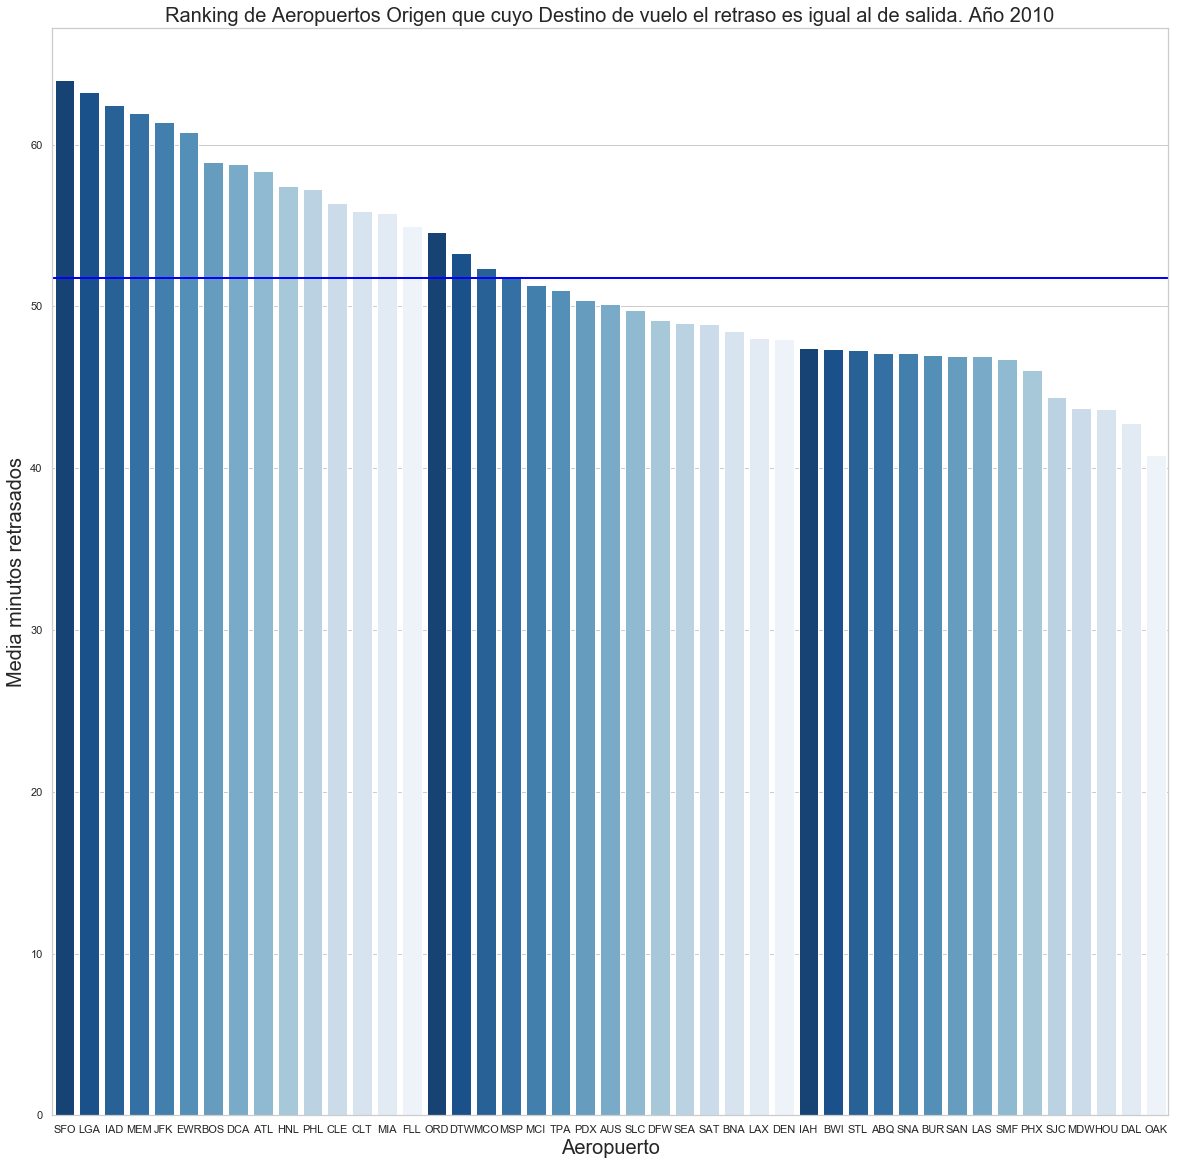

In [113]:
#Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", 15)# len(retrasosSalidaIgualLlegadaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoOrigen.index, y=retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

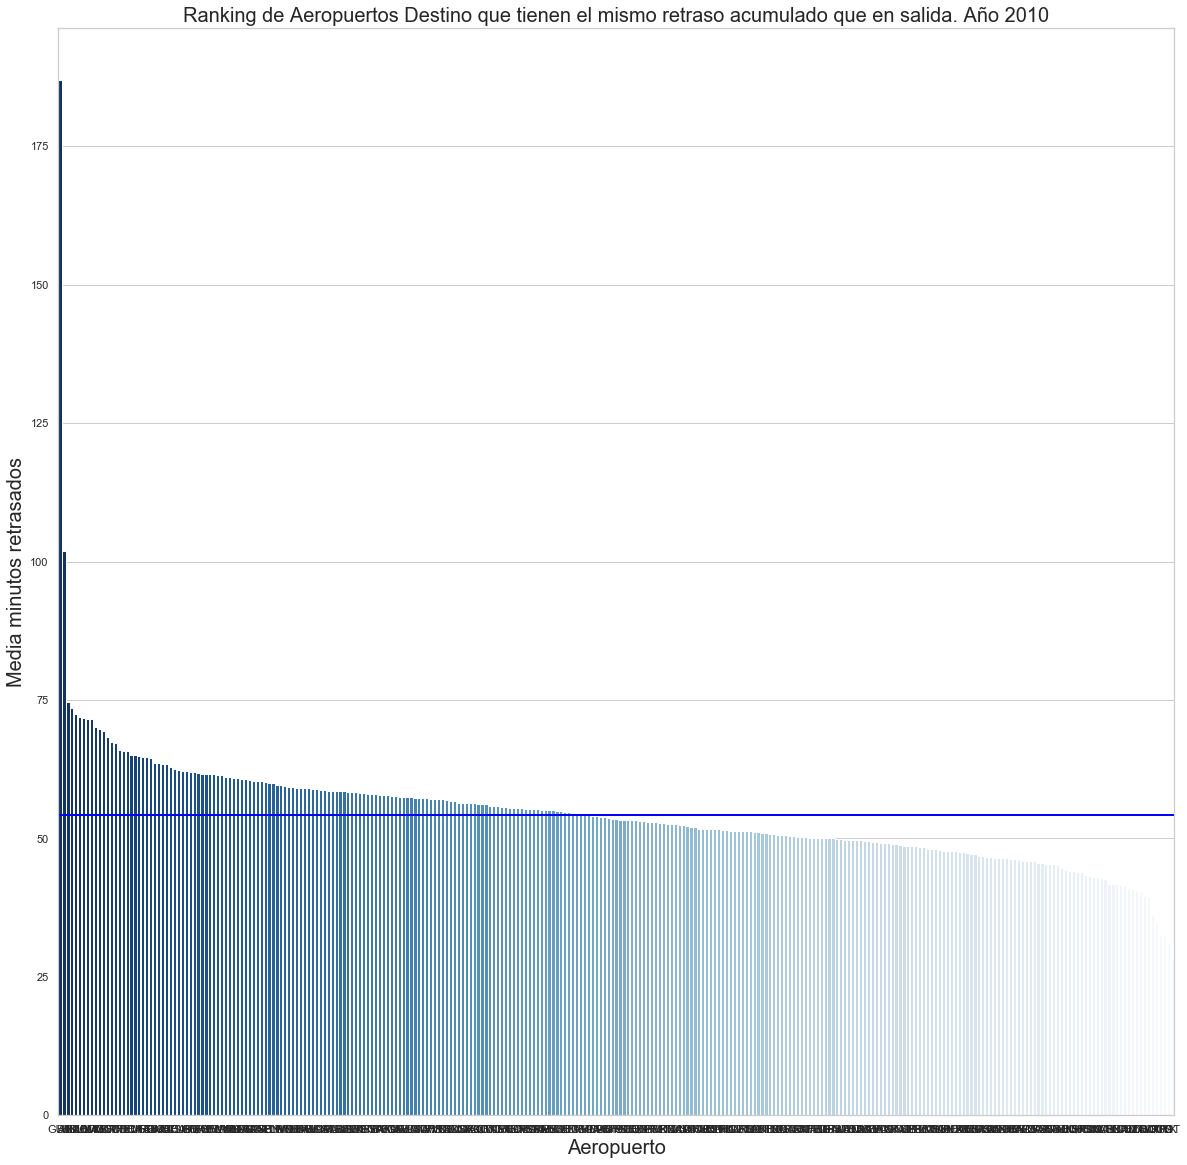

In [114]:
#Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoDestino.index, y=retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

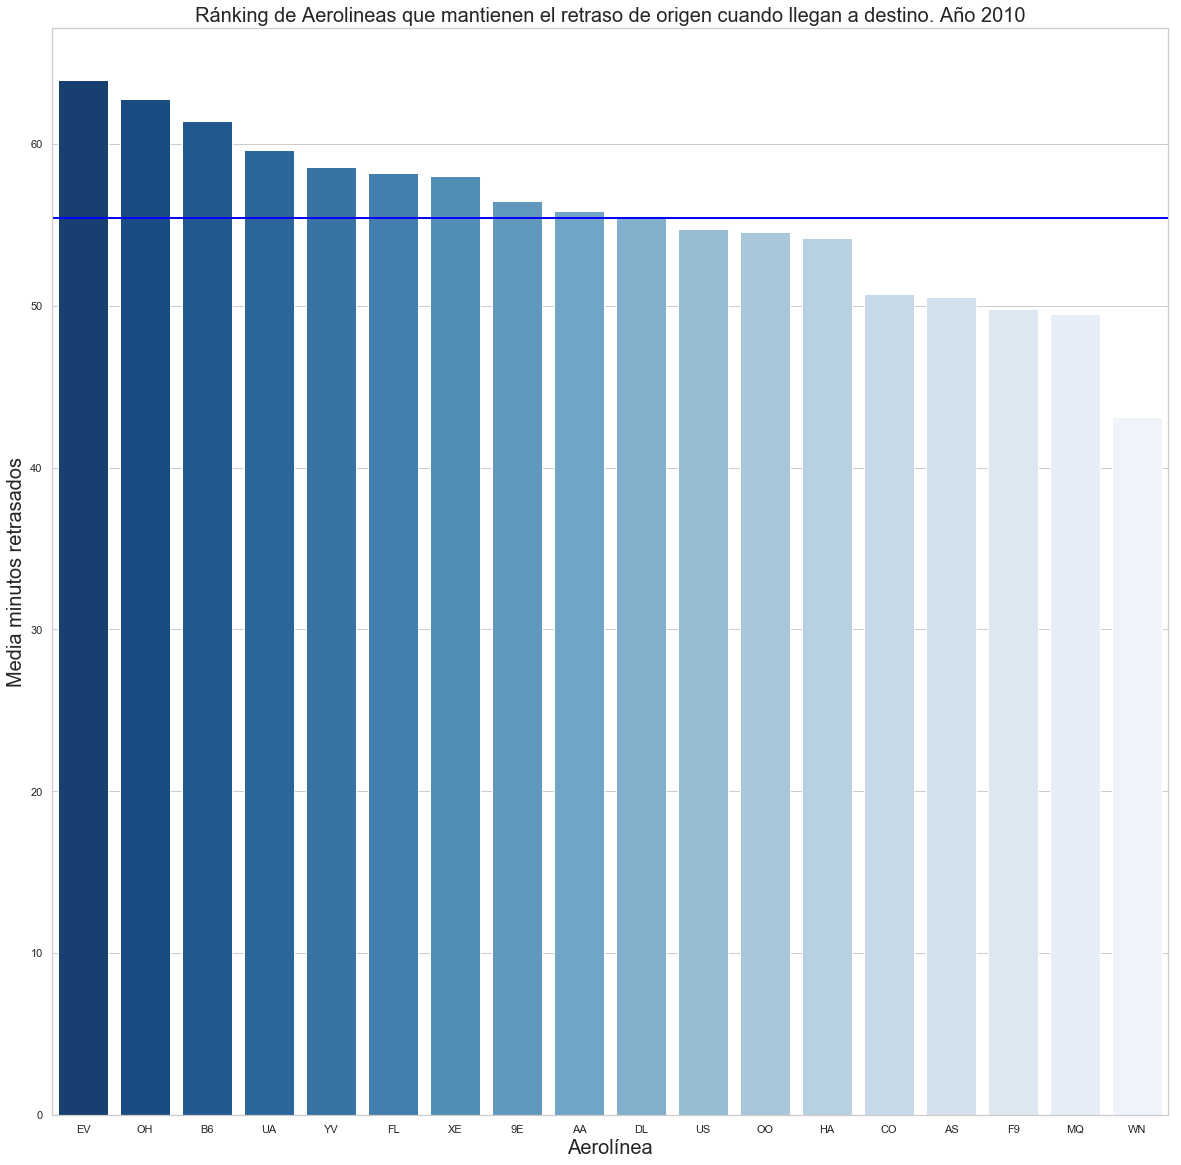

In [115]:
#Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAerolinea))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAerolinea.index, y=retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

In [116]:
#el índice de este DataFrame contiene lo que había en DistanceGroups
#que son los rangos de distancias separados en 250 millas
#para las etiquetas del gráfico, en el eje x, lo convertimos a rangos reales para mejorar la comprensión

my_xticks = []
desde = 0
for index, row in retrasosSalidaIgualLlegadaPorDistanciaADestino.iterrows():
    hasta = index * 250
    my_xticks.append(str(desde) + '-' + str(hasta))
    desde = hasta
    
my_xticks

['0-250',
 '250-500',
 '500-750',
 '750-1000',
 '1000-1250',
 '1250-1500',
 '1500-1750',
 '1750-2000',
 '2000-2250',
 '2250-2500',
 '2500-2750']

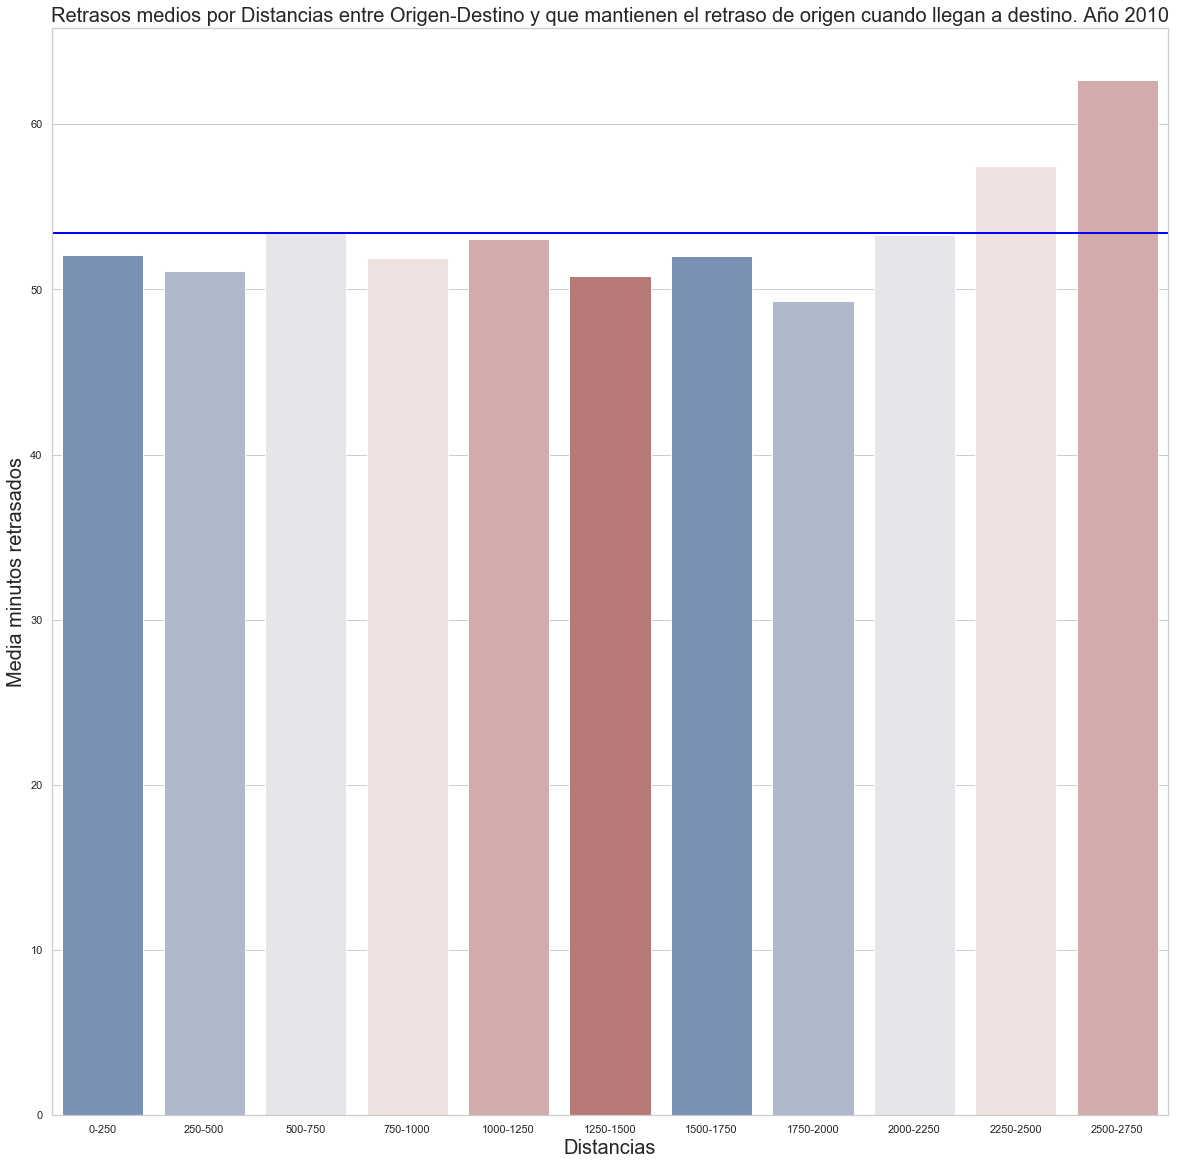

In [117]:
#Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.4 Visualización de Retrasos en Destino que aumentan con respecto al de Origen

In [118]:
#cálculo de los que el retraso aumenta en Destino con respecto al retraso de Origen
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosPosterioresSalidaPorAeropuertoOrigen = pd.DataFrame(retrasosPosterioresSalida.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAeropuertoDestino = pd.DataFrame(retrasosPosterioresSalida.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAerolinea = pd.DataFrame(retrasosPosterioresSalida.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorDistanciaADestino = pd.DataFrame(retrasosPosterioresSalida.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorDistanciaADestino = retrasosPosterioresSalidaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [119]:
#ordenamos por de mayor a menor retraso
retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


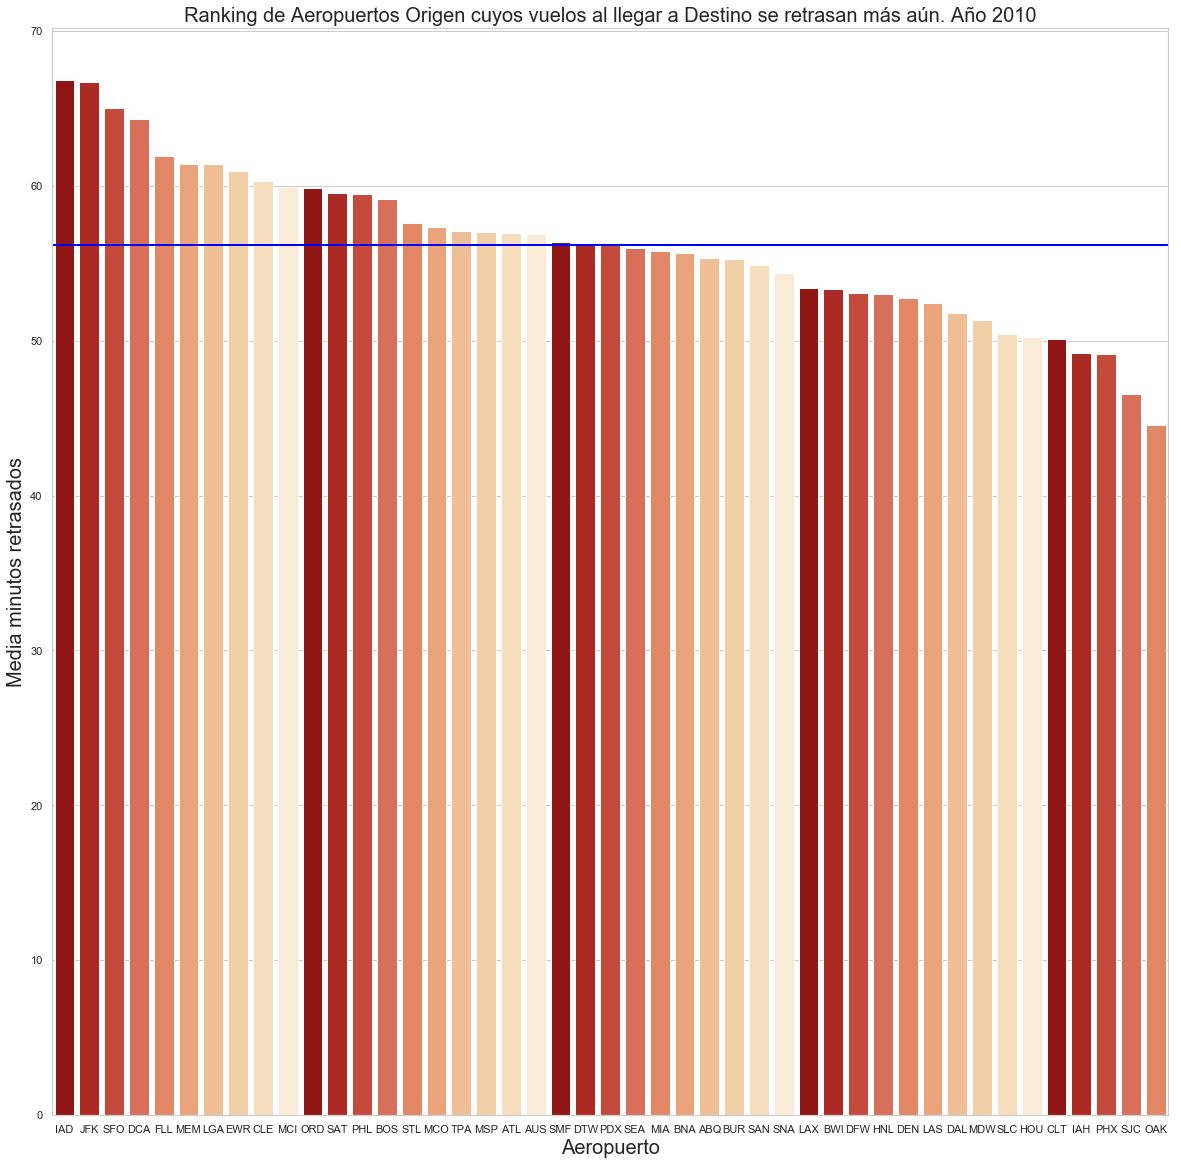

In [120]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", 10) #len(retrasosPosterioresSalidaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoOrigen.index, y=retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

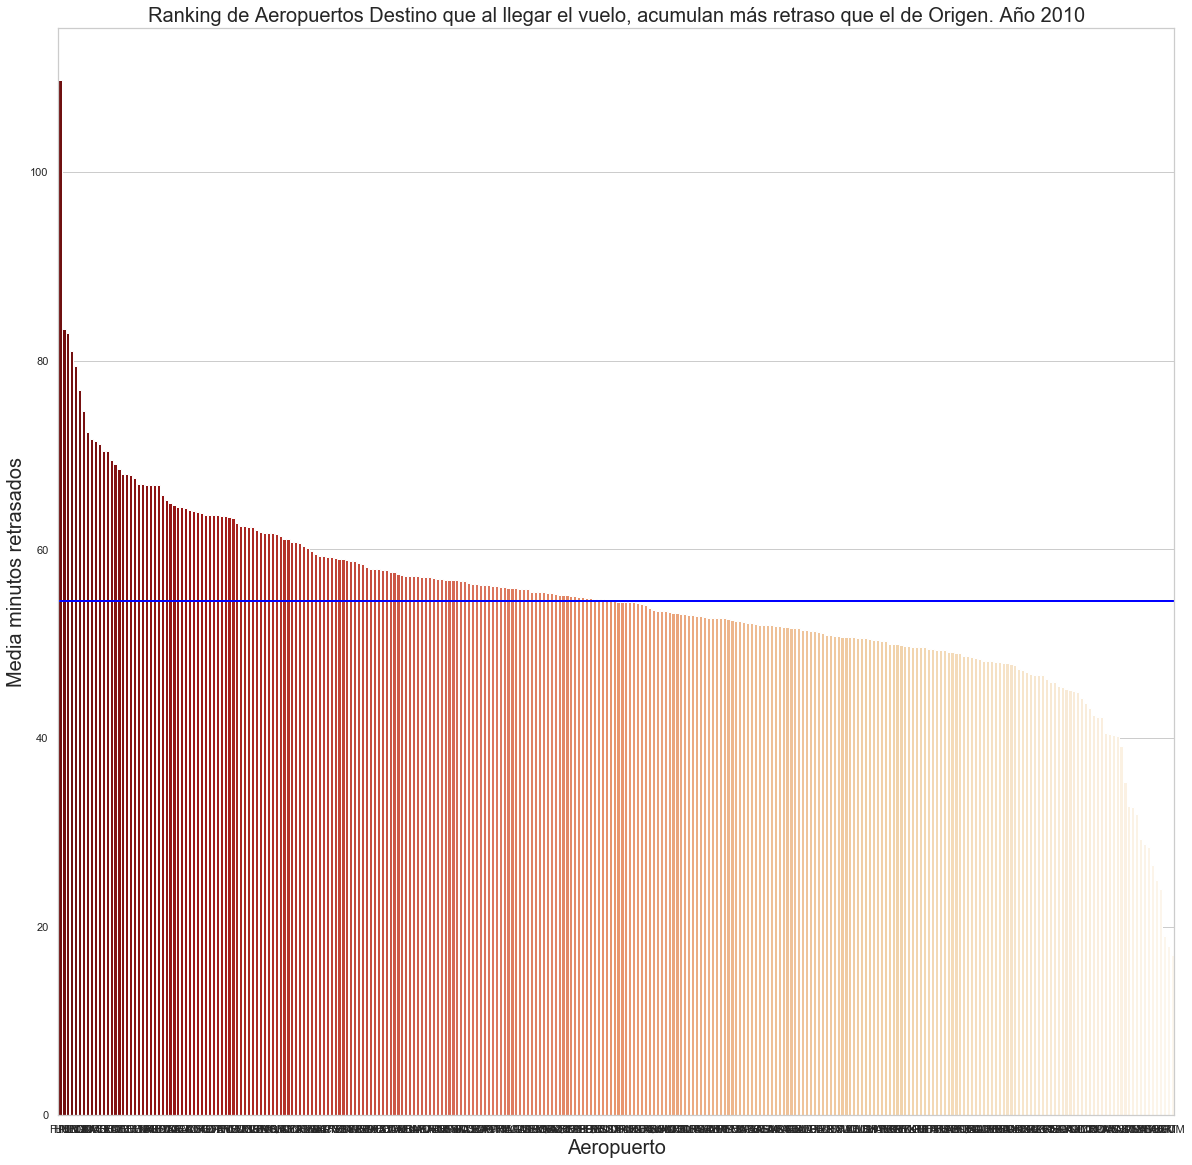

In [121]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoDestino.index, y=retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

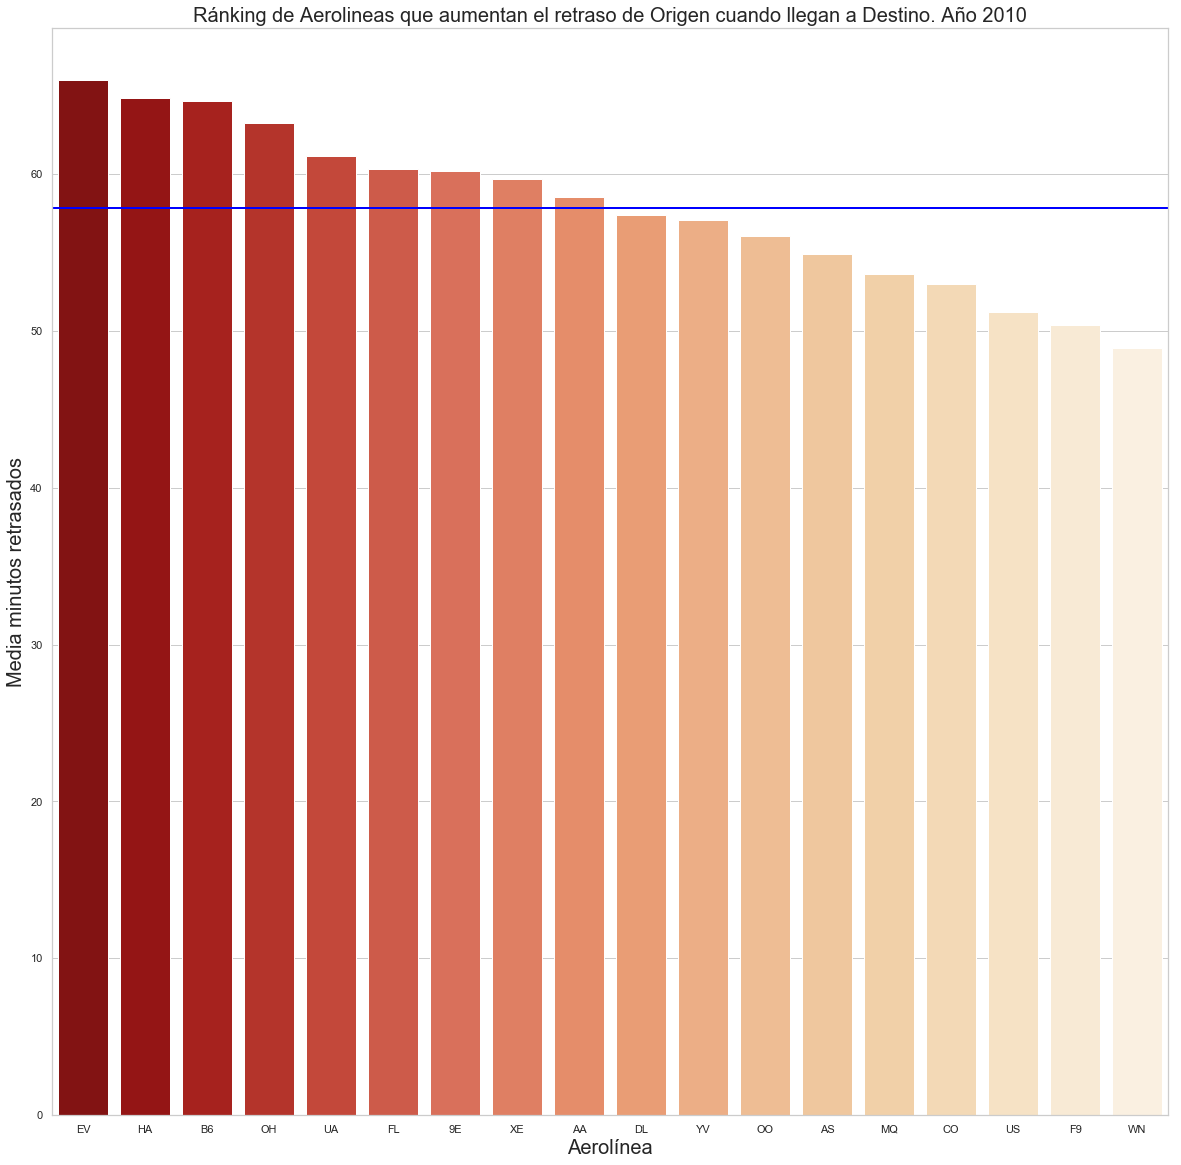

In [122]:
#Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAerolinea))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAerolinea.index, y=retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

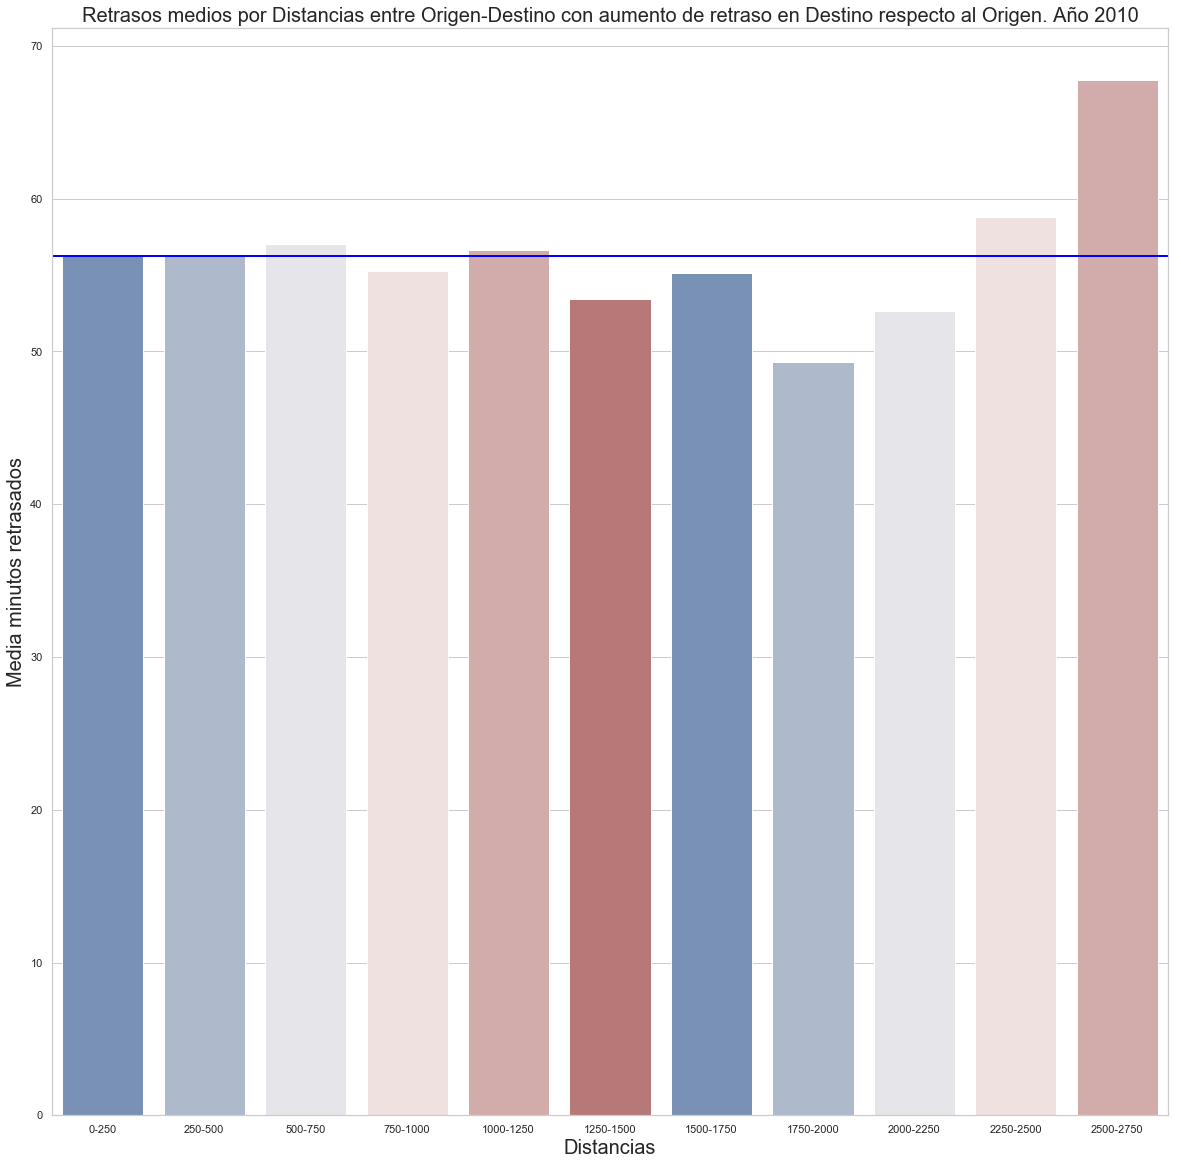

In [123]:
#Retrasos medios por Distancias entre Origen-Destino y que aumenta el retraso en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino con aumento de retraso en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.5 Visualización de Recuperación del tiempo de retraso, de Origen, en Destino.

In [124]:
#cálculo de los que el retraso de origen se recupera al llegar al Destino
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosRecuperadosPorAeropuertoOrigen = pd.DataFrame(retrasosRecuperados.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAeropuertoDestino = pd.DataFrame(retrasosRecuperados.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAerolinea = pd.DataFrame(retrasosRecuperados.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorDistanciaADestino = pd.DataFrame(retrasosRecuperados.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorDistanciaADestino = retrasosRecuperadosPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [125]:
#ordenamos por de mayor a menor retraso
retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


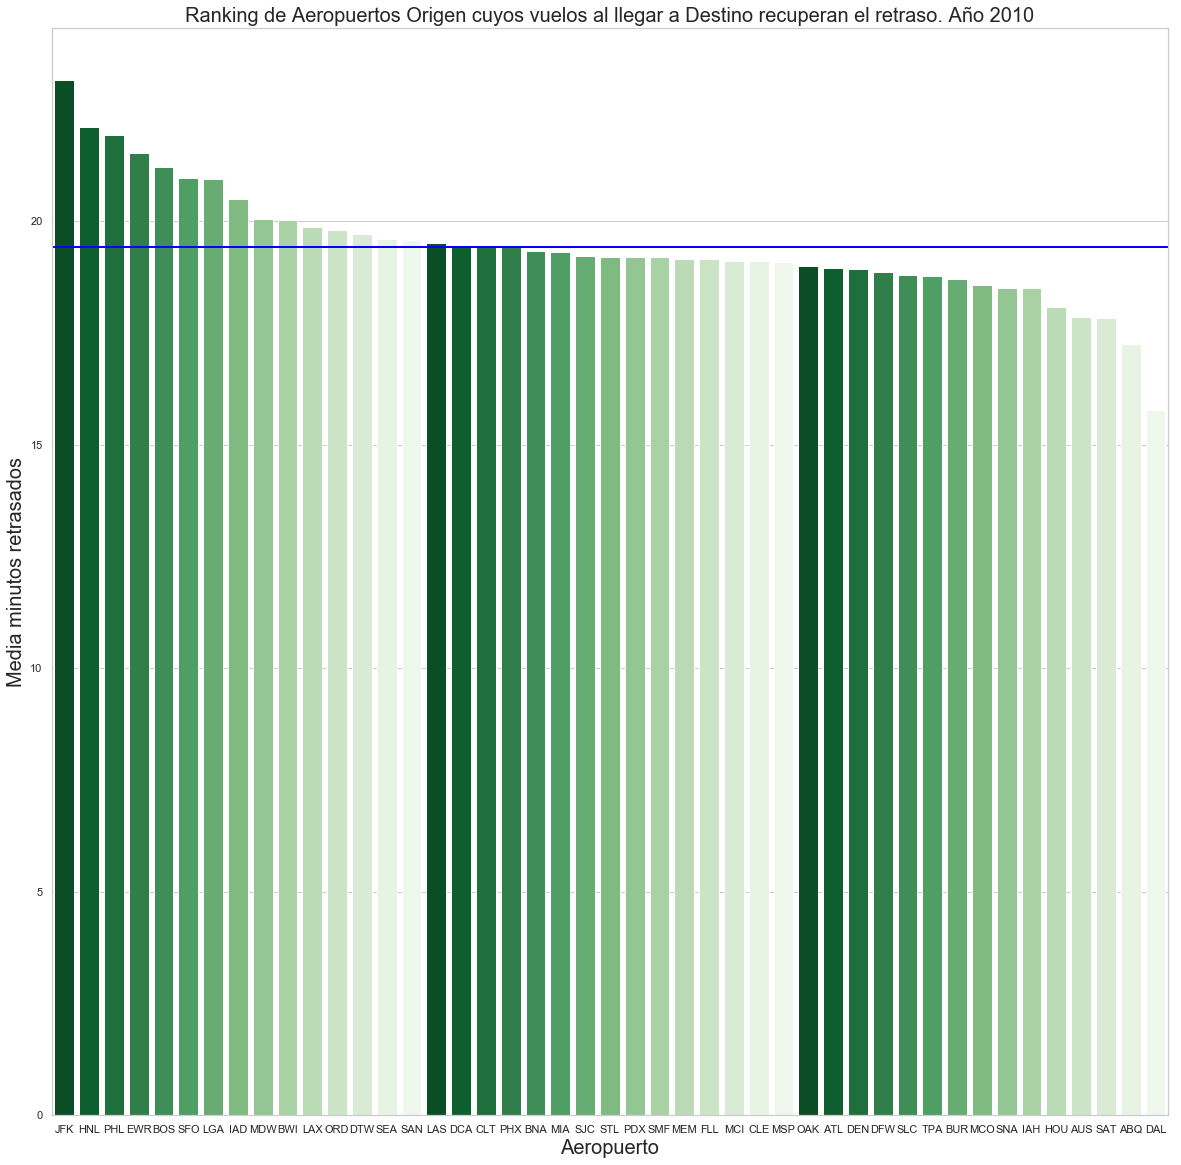

In [126]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", 15) #len(retrasosRecuperadosPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoOrigen.index, y=retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

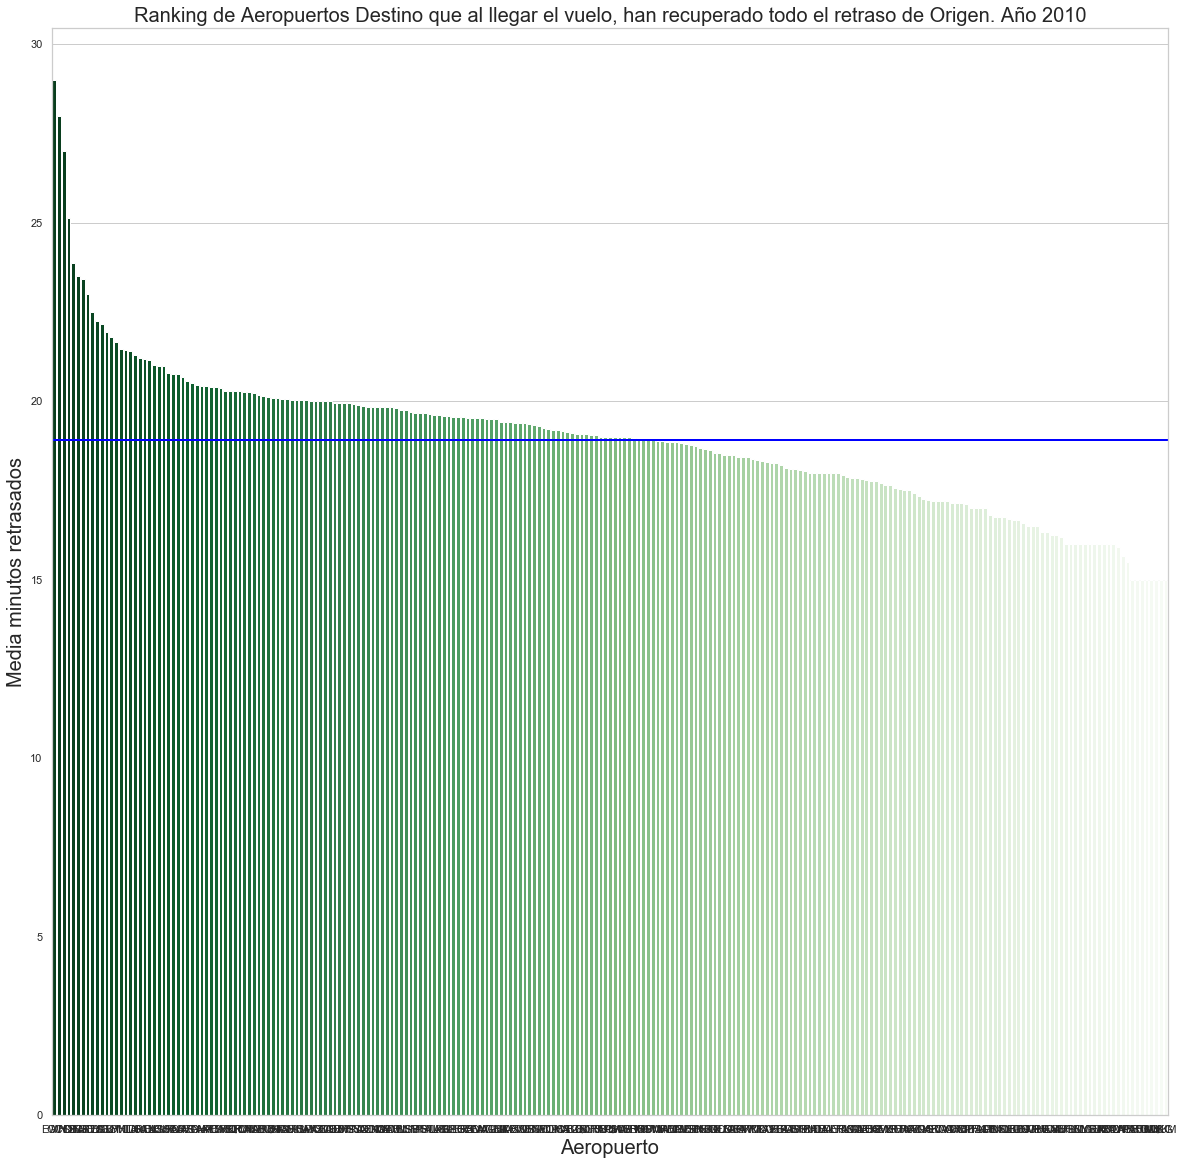

In [127]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAeropuertoDestino))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoDestino.index, y=retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

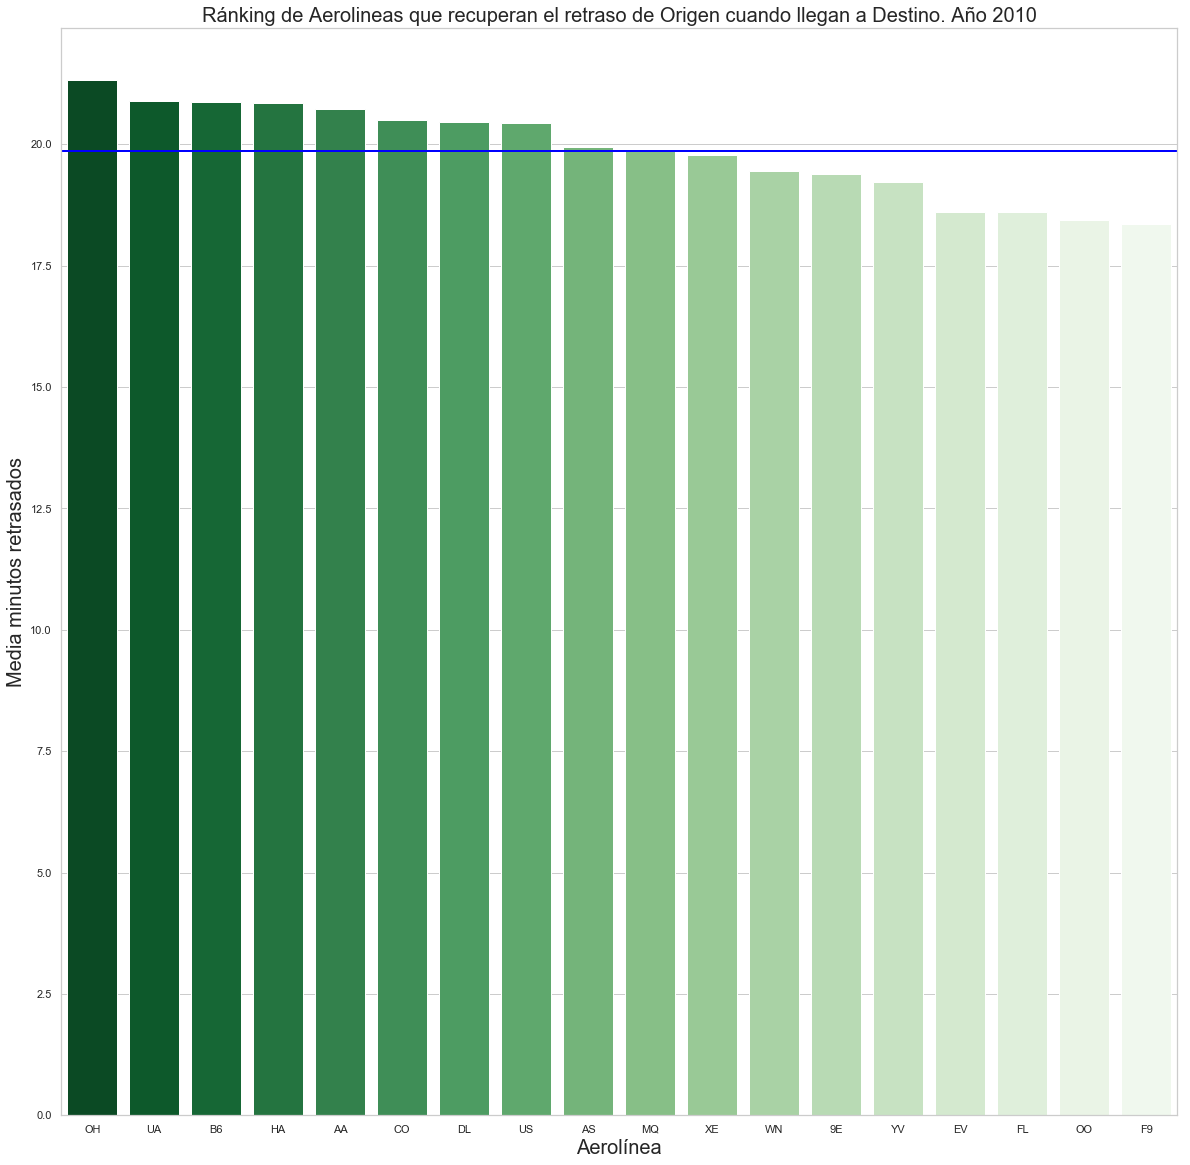

In [128]:
#Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAerolinea))
ax = sns.barplot(x=retrasosRecuperadosPorAerolinea.index, y=retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

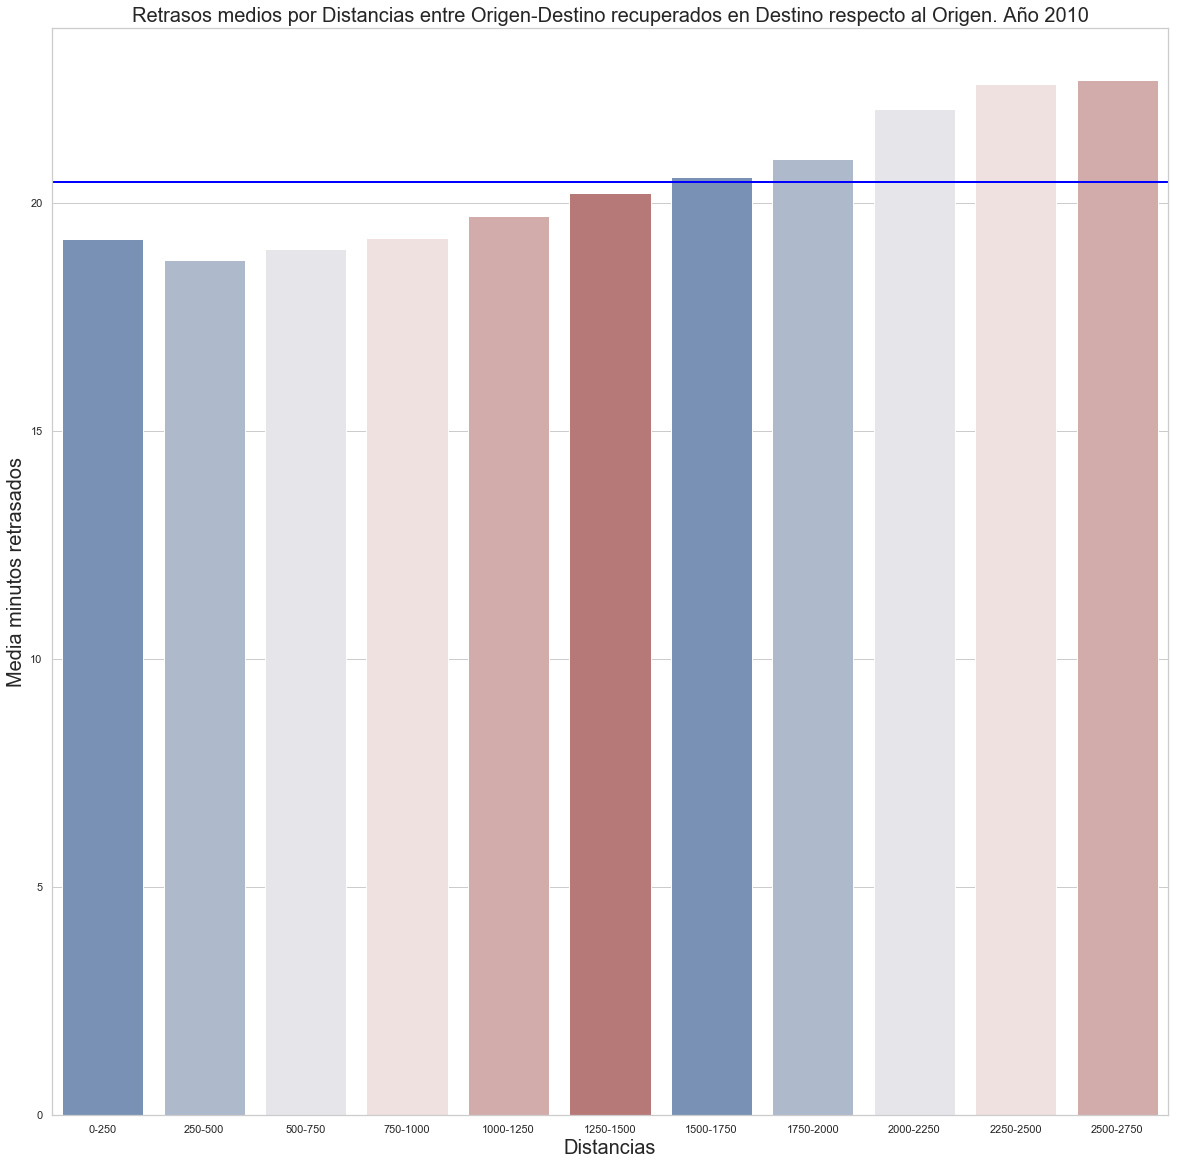

In [129]:
#Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.6 Conclusiones: 

Vuelos que recuperan el tiempo de retraso que acumulaban en Origen
1. Para que en Destino se recupere el tiempo de retraso de Origen, la media de minutos en Origen debe estar entre 17,5 y 21 minutos.
2. Para la recupearción del retraso, cuanto mayor sea la distancia a Destino más tiempo se recupera, es bastante lineal.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, recuperan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste. 

Vuelos que se retrasan más, al llegar a Destino, respecto al retraso de Origen
1. Más de 50 minutos de retraso en Origen, supone con gran probabilidad que en Destino se aumente aún más el retraso.
2. En el caso de aumento de retraso, no parece influir demasiado la distancia sobre el aumento del mismo, sólo destaca un poco en el caso de los vuelos de entre 2.500 y 2.750 millas.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, aumentan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.


Vuelos que consiguen Mantener el retraso en Destino
1. Aquellos vuelos que salen entre 40 y 65 minutos tarde en Origen, pueden conseguir no retrasarse más a la llegada a Destino. 
2. 9 de los 10 aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, el vuelo, mantener el retraso, sin aumentarlo, son de la costa Este y Medio Este.
3. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.
4. La distancia tampoco parece clave en el mantenimiento del retraso de Origen a la llegada, en el caso de los vuelos más largos (2.500 y 2.750 millas) sí parece ayudar conseguir mantenerse en el caso de los retrasos más altos.

Aerolíneas

1. Express Airlines parece que es la que destaca con los retrasos en las 3 situaciones.
2. Otra de las destacadas que suele estar entre las primeras es United Airlines y JetBlue
3. Por el contrario, parece que Southwest y Frontier son las aerolíneas con menor retraso en los aeropuertos principales.
4. Compañías relevantes como American Airlnes y Delta, están en los 3 casos en la media de retrasos, siendo Delta mejor.


Parece que es relevante en la media de minutos retrasados que la zona geográfica sea la de la Costa Este y el Medio Este de Estados Unidos, y viceversa. 
Sin embargo una cosa son los minutos retrasados, y otra el número de vuelos retrasados, en la que la ubicación geográfica no es tan evidente, sino que parece que es la densidad del tráfico nacional.
Parece que con hasta un máximo de 30 minutos de retraso, se puede recuperar el tiempo en Destino.





### 1.3.4 Visualización de retrasos medios en Origen por Rutas

In [130]:
retrasosSalidaIgualLlegada.shape

(622171, 51)

In [131]:
retrasosSalidaIgualLlegadaPorRuta = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [132]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)


In [133]:
retrasosSalidaIgualLlegadaPorRuta.head(15)

VuelosTotales  MediaRetrasoTotal
Route                                    
SNA-DTW              5         450.000000
LAS-OGG              2         226.000000
EWR-PWM              1         208.000000
HNL-GUM              2         187.000000
ORD-OGG             12         151.500000
TPA-GRR              7         147.142857
LGA-HDN              1         141.000000
SJC-HNL             10         135.800000
LAS-HNL             63         134.841270
DEN-HNL             31         128.000000
JFK-MKE              2         122.500000
CLE-SJU              3         120.000000
HNL-DEN             14         119.214286
MCO-SFO             13         115.846154
HNL-CLT             17         114.235294

In [134]:
#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosSalidaRutaConPesos = retrasosSalidaIgualLlegadaPorRuta

retrasosSalidaRutaConPesos['Peso'] = retrasosSalidaRutaConPesos['VuelosTotales'] * retrasosSalidaRutaConPesos['MediaRetrasoTotal']

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosSalidaRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
SFO-LAX           2158          60.253012  130026.0
LAX-SFO           1822          53.507135   97490.0
ORD-LGA           1554          57.101673   88736.0
ORD-EWR           1335          62.290637   83158.0
SFO-LAS           1320          62.356061   82310.0
LGA-ATL           1256          65.005573   81647.0
JFK-LAX           1192          64.128356   76441.0
EWR-ATL           1086          66.401473   72112.0
ATL-LGA           1352          53.107988   71802.0
JFK-BOS           1147          62.361813   71529.0
LGA-ORD           1033          67.788964   70026.0
ATL-DFW           1151          60.090356   69164.0
ORD-ATL           1227          55.090465   67596.0
LAX-LAS           1438          44.599444   64134.0
HOU-DAL           1557          41.159923   64086.0

Ya parece que salen las más relevantes, vamos a quedarnos con las 20 primeras

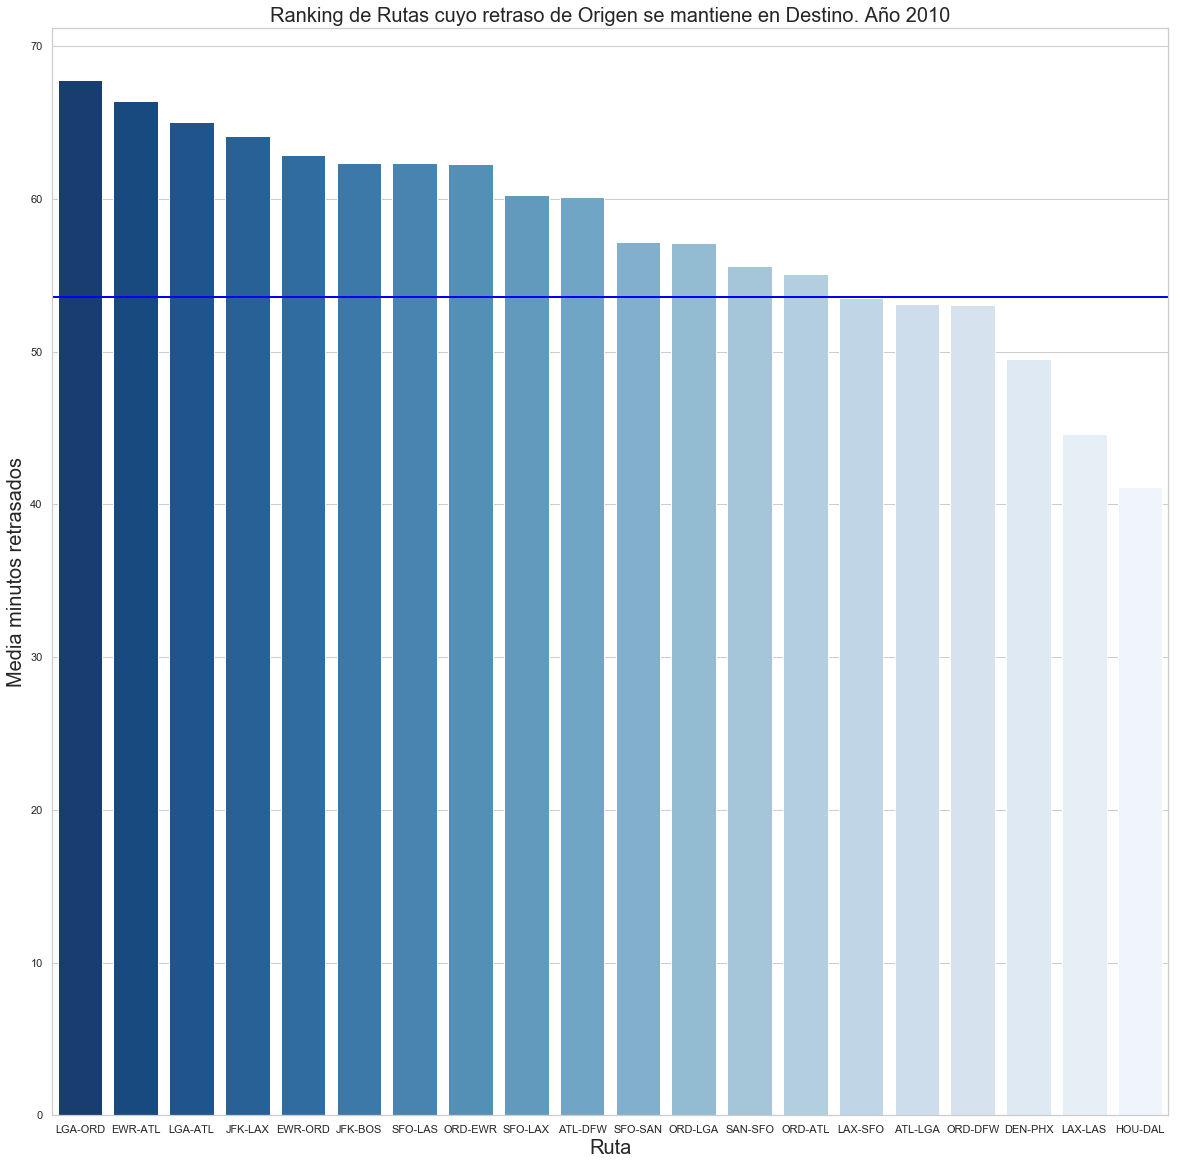

In [135]:
retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.head(20)

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se mantiene en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaRutaConPesos))
ax = sns.barplot(x=retrasosSalidaRutaConPesos.index, y=retrasosSalidaRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se mantiene en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorRuta['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

La mayoría son rutas que salen de Atlanta (ATL) y de Newark (EWR) o de Chicago (ORD), son de la Costa Este, también de la costa Oeste son relavantes SFO (San Francisco) y LAX (Los Ángeles), pero predominan rutas que salen y llegan en la Costa Este.

Miremos ahora los otros dos casos, con mayor retraso en Destino, y con Recuperación del tiempo

In [136]:
retrasosPosterioresSalidaPorRuta = pd.DataFrame(retrasosPosterioresSalida.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [137]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRuta

retrasosPosterioresSalidaPorRutaConPesos['Peso'] = retrasosPosterioresSalidaPorRutaConPesos['VuelosTotales'] * retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal']

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosPosterioresSalidaPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal     Peso
Route                                             
LAX-SFO           1416          67.422316  95470.0
ATL-LGA            912          59.781798  54521.0
ATL-ORD            710          63.698592  45226.0
LAS-SFO            678          66.607670  45160.0
MCO-ATL            604          74.596026  45056.0
ORD-EWR            639          66.840376  42711.0
ATL-EWR            691          59.924747  41408.0
ORD-LGA            688          59.479651  40922.0
LGA-ATL            564          72.216312  40730.0
SFO-LAX            621          62.328502  38706.0
SAN-SFO            562          68.359431  38418.0
ORD-ATL            564          64.329787  36282.0
ATL-MCO            705          51.421277  36252.0
PHX-SFO            570          62.857895  35829.0
DEN-SFO            618          57.758900  35695.0

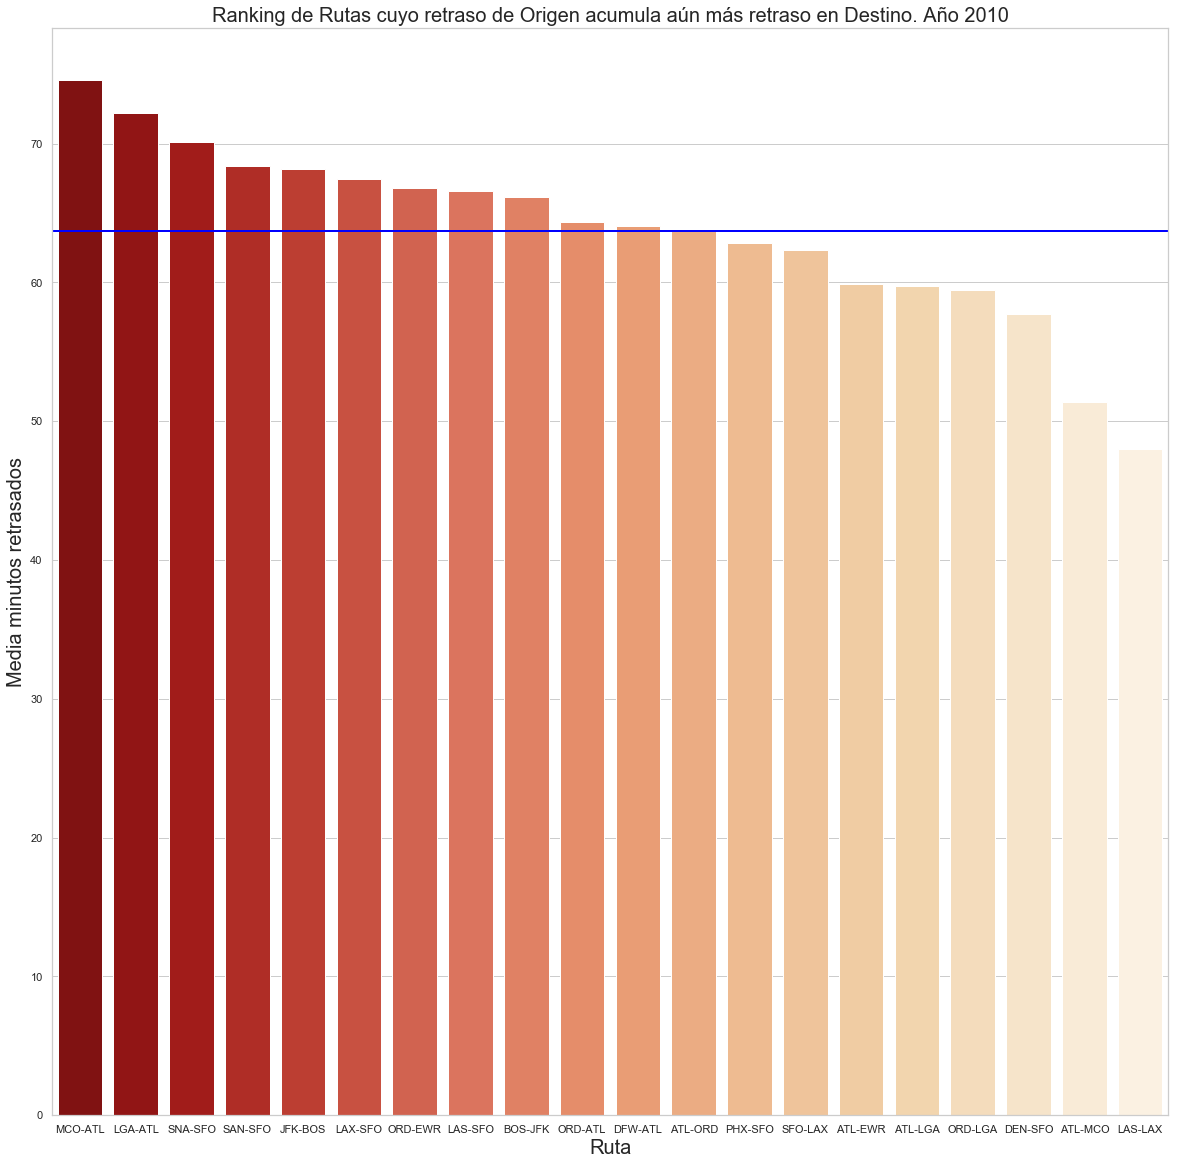

In [138]:
retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.head(20)

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen aumenta Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorRutaConPesos))
ax = sns.barplot(x=retrasosPosterioresSalidaPorRutaConPesos.index, y=retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen acumula aún más retraso en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

En este caso aumenta claramente la prevalencia de aeropuertos de la parte Este de Estados Unidos, es más, los vuelos parecen que casi todos son entre aeropuertos de esta parte de USA, especialemente a Atlanta, el de mayor tráfico de USA, por lo que se apuntan dos cosas vistas en los gráficos anteriores, con menor distancia no da tiempo a recuperar el retraso y que la mayoría de los aeropuertos con esta circunstancia son de la parte Este de USA, con una media de retraso por encima de los 60 minutos.

Veamos, por último, los vuelos que recuperan el tiempo.

In [139]:
retrasosRecuperanPorRuta = pd.DataFrame(retrasosRecuperados.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRuta

retrasosRecuperanPorRutaConPesos['Peso'] = retrasosRecuperanPorRutaConPesos['VuelosTotales'] * retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal']

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosRecuperanPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal    Peso
Route                                            
JFK-LAX            345          24.402899  8419.0
JFK-SFO            248          25.375000  6293.0
LAX-JFK            183          22.043716  4034.0
MDW-LAS            186          21.290323  3960.0
JFK-LAS            152          25.565789  3886.0
MDW-LAX            175          21.268571  3722.0
LGA-ATL            182          20.335165  3701.0
ORD-EWR            169          21.029586  3554.0
ORD-LAX            161          21.049689  3389.0
JFK-BOS            155          21.806452  3380.0
JFK-SEA            133          25.240602  3357.0
EWR-IAH            153          21.777778  3332.0
SFO-JFK            139          22.683453  3153.0
SFO-ORD            143          21.986014  3144.0
JFK-DCA            132          22.356061  2951.0

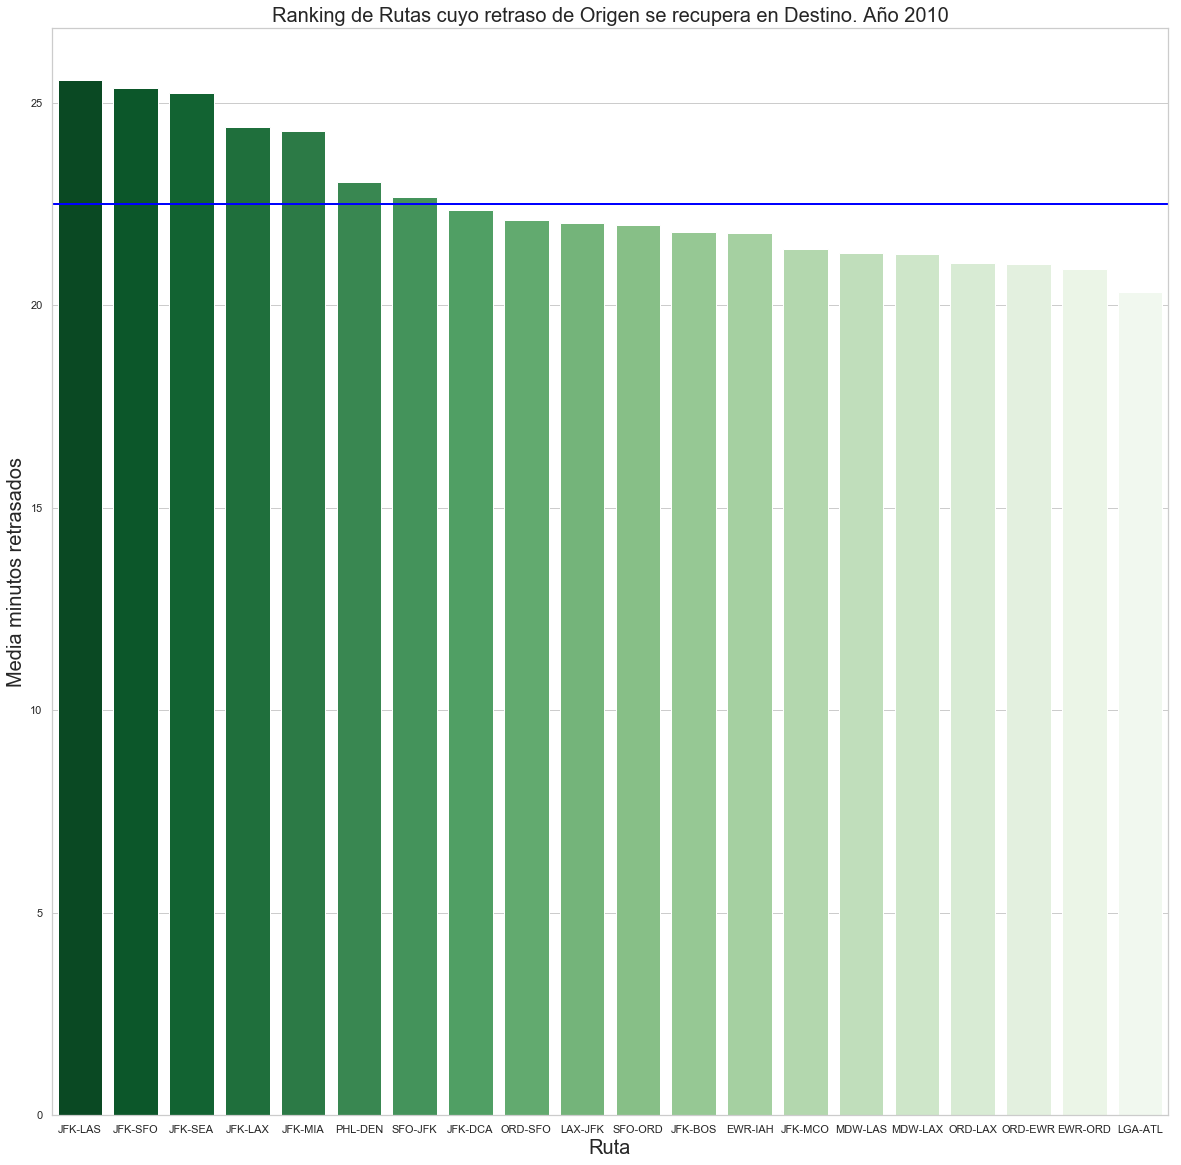

In [140]:
retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.head(20)

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se recupera en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperanPorRutaConPesos))
ax = sns.barplot(x=retrasosRecuperanPorRutaConPesos.index, y=retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se recupera en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

Una vez más, prevalecen los aeropuertos de la Costa Este, pero en este caso, las distancias de la ruta son mayores, casi todos vuelan al Oeste. Y claramente, como se vio en los apartados anteriores por aeropuertos, el menor número de minutos de retrasos es recuperable, y más aún si la distancia es grande, como es el caso. La media de tiempo de retraso de estas rutas prácticamente coincide con la del caso de los aeropuertos.

### 1.3.4.1 Conclusiones:

Parece que mirando los retrasos en Origen por Rutas, se confirman los datos que se vieron en el apartado anterior por Aeropuertos.

Parece claramente que en un modelo de predicción, el peso de la Costa Este de USA, en cuanto a los retrasos, es mayor que en la Costa Oeste.

Deberíamos etiquetar a los aeropuertos por la zona geográfica en la que están y que los modelos se orienten a cada una de las zonas geográficas

## 1.3.5 Análisis de Retrasos en Destino

#### Ahora veamos cómo es el comportamiento de los retrasos en llegadas

#### Vuelos que se han retrasado al menos 15 minutos en la llegada 

In [141]:
#Vuelos que se han retrasado al menos 15 minutos en la llegada
len(dfanual[dfanual['ArrDel15'] == 1])

1172712

In [142]:
#retrasos por mes en llegadas

vuelosTotalesRetrasadosDestinoPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosDestinoPorMes = vuelosTotalesRetrasadosDestinoPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1)])}, ignore_index=True)


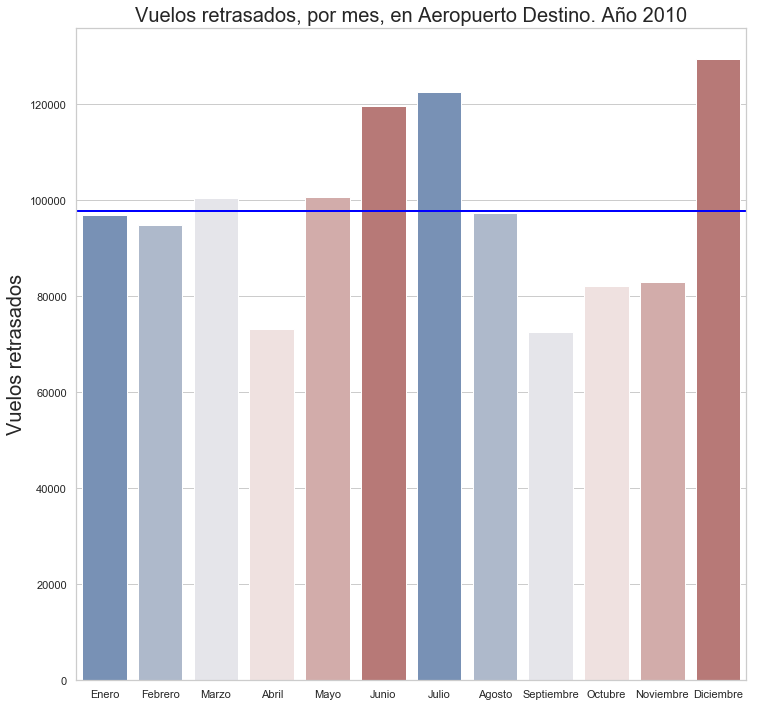

In [143]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosDestinoPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados, por mes, en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosDestinoPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

De las múltiples combinaciones de los retrasos, motivos, si en origen , si en destino, si en ambos, etc. Vamos a ver primero cuántos hay retrasados, ya vimos en el apartado correspondiente de retrasos en origen, cuántos mantenían su retraso en la llegada, se recuperaban o aumentaban más el retraso de origen. Vamos a ver, nuevos casos: 
1. Retrasos que sólo ocurren en Destino, es decir, en Origen no tenían retraso.
2. Volveremos a ver los retrasados en Destino, y que en origen también estaban retrasados.
3. Iremos viéndolos también, por aeropuertos más retrasados, con más vuelos, por zonas geográficas, tipos de retraso, aerolíneas, etc.

### 1.3.5.1 Vuelos retrasados sólo en Destino

In [144]:
#vuelos retrasados en Destino pero que salieron en hora en Origen
len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

292107

In [145]:
vuelosRestrasadosSoloEnDestino = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnDestino = vuelosRestrasadosSoloEnDestino.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1) & (df['DepDel15'] == 0)])}, ignore_index=True)


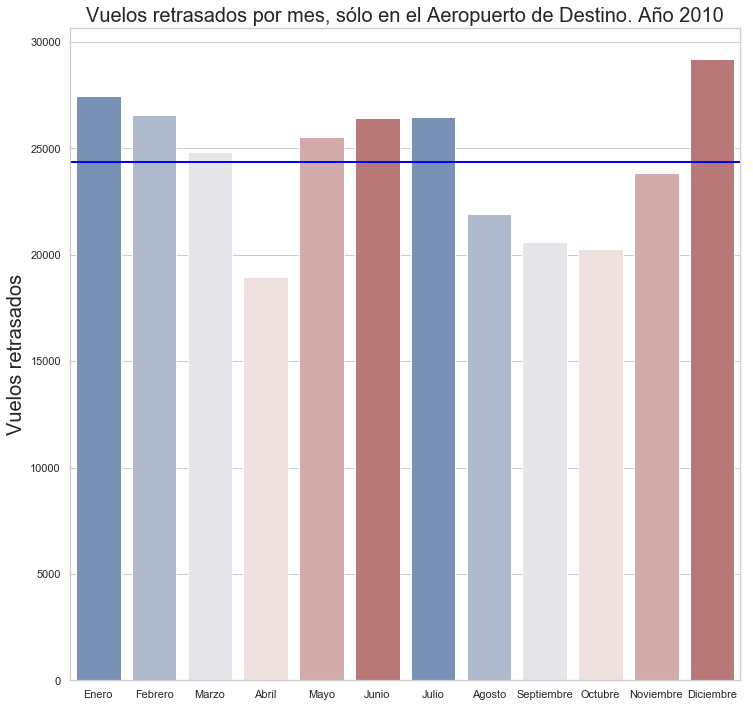

In [146]:
#Vuelos retrasados por mes sólo en destino, es decir, en origen salieron puntuales

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnDestino['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnDestino['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [147]:
retrasosSoloDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [148]:
retrasosSoloDestino = pd.DataFrame(retrasosSoloDestino['ArrDelay'])

retrasosSoloDestino.head(5)

ArrDelay
3       28.0
11      18.0
16      19.0
34      56.0
35      18.0

In [149]:
retrasosSoloDestino.describe().T

count       mean        std   min   25%   50%   75%    max
ArrDelay  292107.0  26.142396  14.512362  15.0  17.0  21.0  29.0  330.0

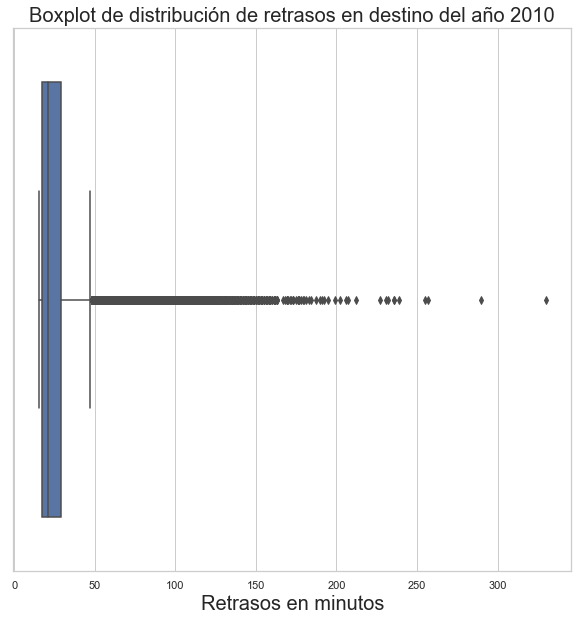

In [150]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino del año ' + year, fontsize=20)
plt.show()

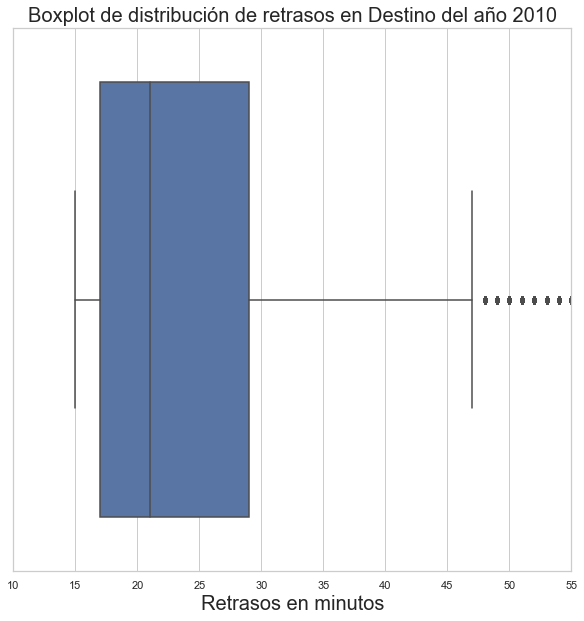

In [151]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,55)
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en Destino del año ' + year, fontsize=20)
plt.show()

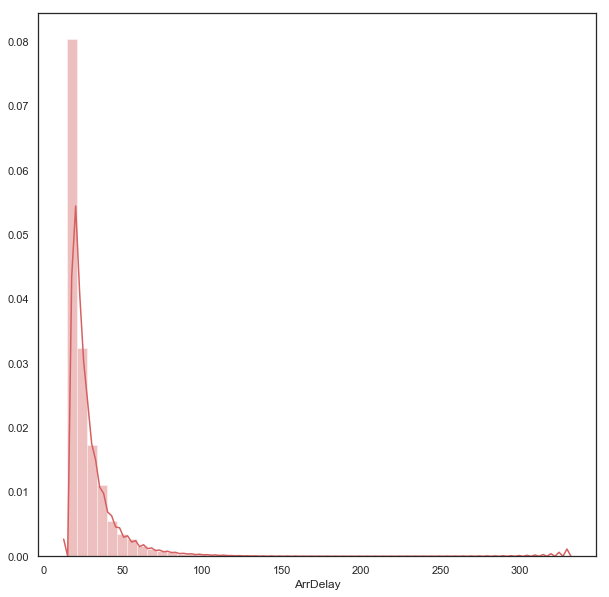

In [152]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")

plt.show()

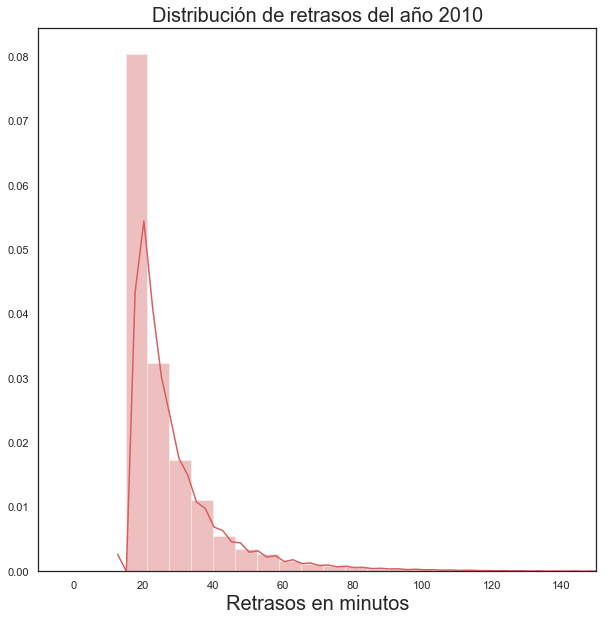

In [153]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,150)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 100 minutos de retraso

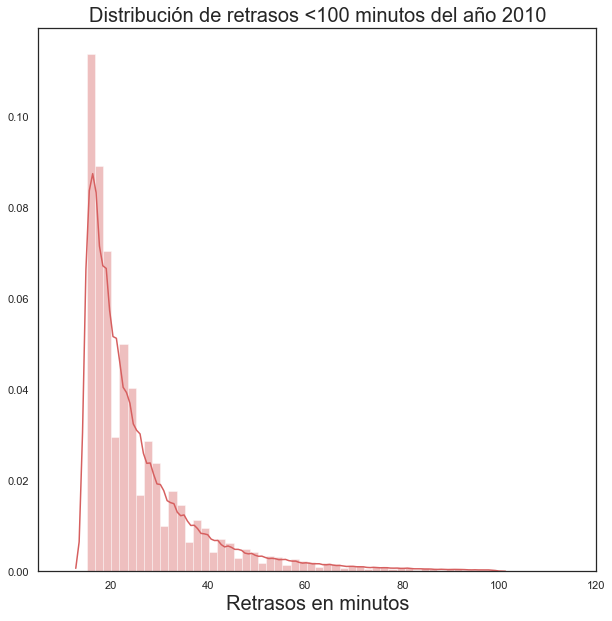

In [154]:
corte100Min = pd.DataFrame(retrasosSoloDestino[retrasosSoloDestino["ArrDelay"]<100])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte100Min["ArrDelay"], color="r")
plt.xlim(5,120)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <100 minutos del año ' + year, fontsize=20)


plt.show()

In [155]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))

In [156]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1              46413  26.155194
2              42472  26.332737
3              43591  26.372118
4              45848  26.284374
5              44287  26.040531
6              29821  25.451963
7              39675  26.139861

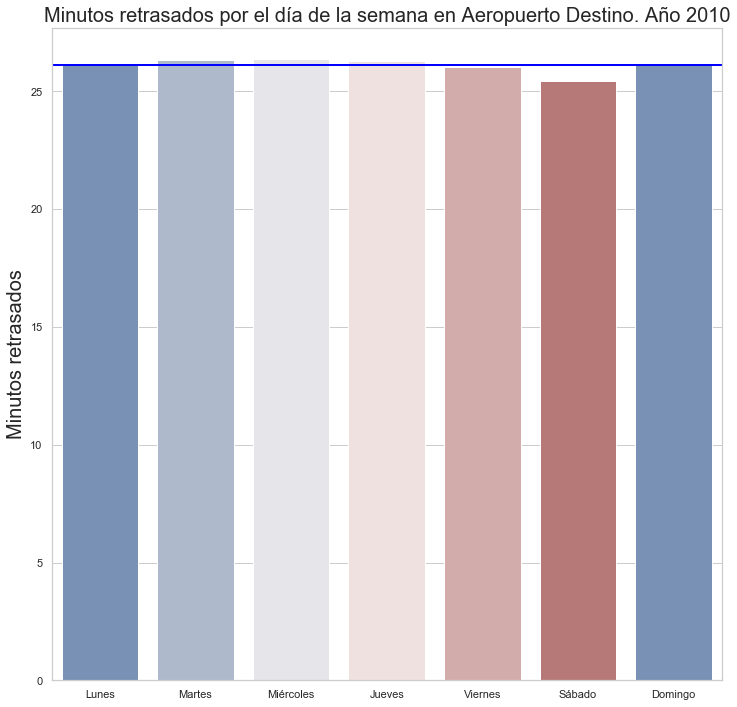

In [157]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [158]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [159]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [160]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559         2975  24.391261
0600-0659         2742  24.717724
0700-0759         9387  25.941834
0800-0859        14468  26.569740
0900-0959        17042  25.621875
1000-1059        18548  25.392010
1100-1159        17064  25.158579
1200-1259        16638  25.013523
1300-1359        16590  24.764798
1400-1459        17837  25.413298
1500-1559        17351  25.599101
1600-1659        22049  26.000680
1700-1759        20536  27.013002
1800-1859        22332  27.267240
1900-1959        19935  27.088538
2000-2059        20689  27.612789
2100-2159        15750  27.447365
2200-2259        11511  26.278169
2300-2359         8663  25.817846

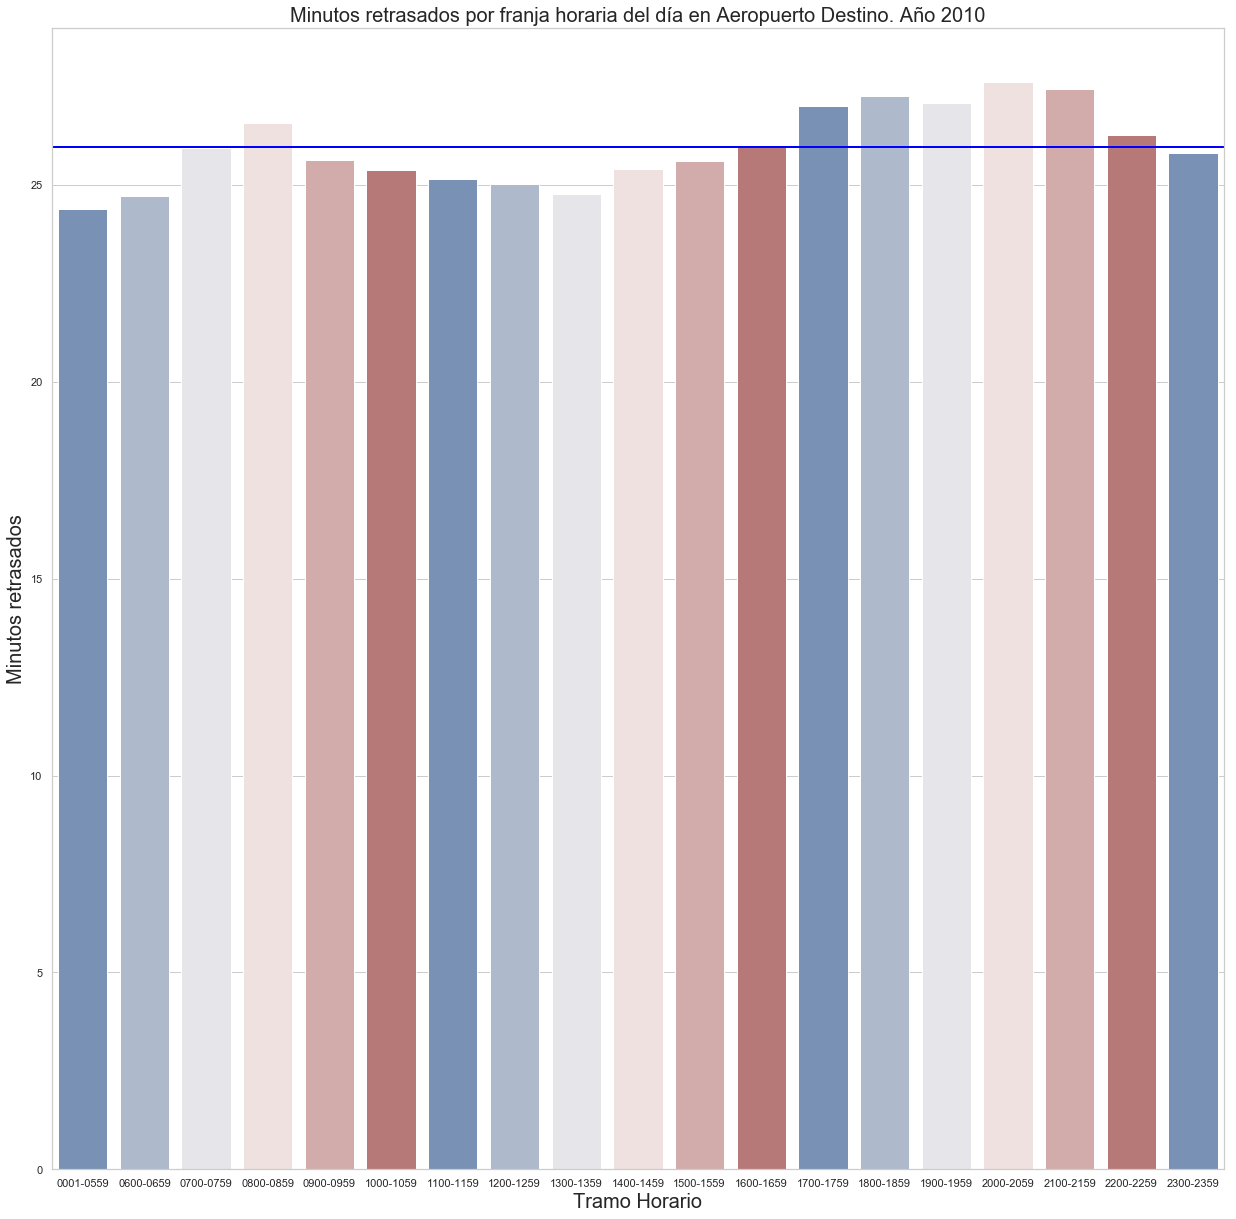

In [161]:

#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [162]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [163]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [164]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                 8547  25.378729
2                 9717  25.980961
3                 9074  25.497135
4                 9859  27.249417
5                 9228  25.627221
6                 8501  25.435243
7                 9212  25.704299
8                10331  25.988965
9                 8941  25.977072
10                8602  24.963381
11               10048  26.843551
12               11396  27.633994
13                9621  27.235319
14                9109  25.214952
15               10156  25.669752
16               10023  26.569091
17                8182  24.567343
18                8649  25.338536
19                8317  24.811230
20                9018  26.027611
21               11460  26.648080
22               11815  27.024968
23                9744  26.229988
24               11088  26.858405
25                9566  26.152937
26                9782  26.606522
27                9538  26.467918
28                9929  26.661194
29                9319  26.274386
30                8605  25.803138
31                4730  26.391755

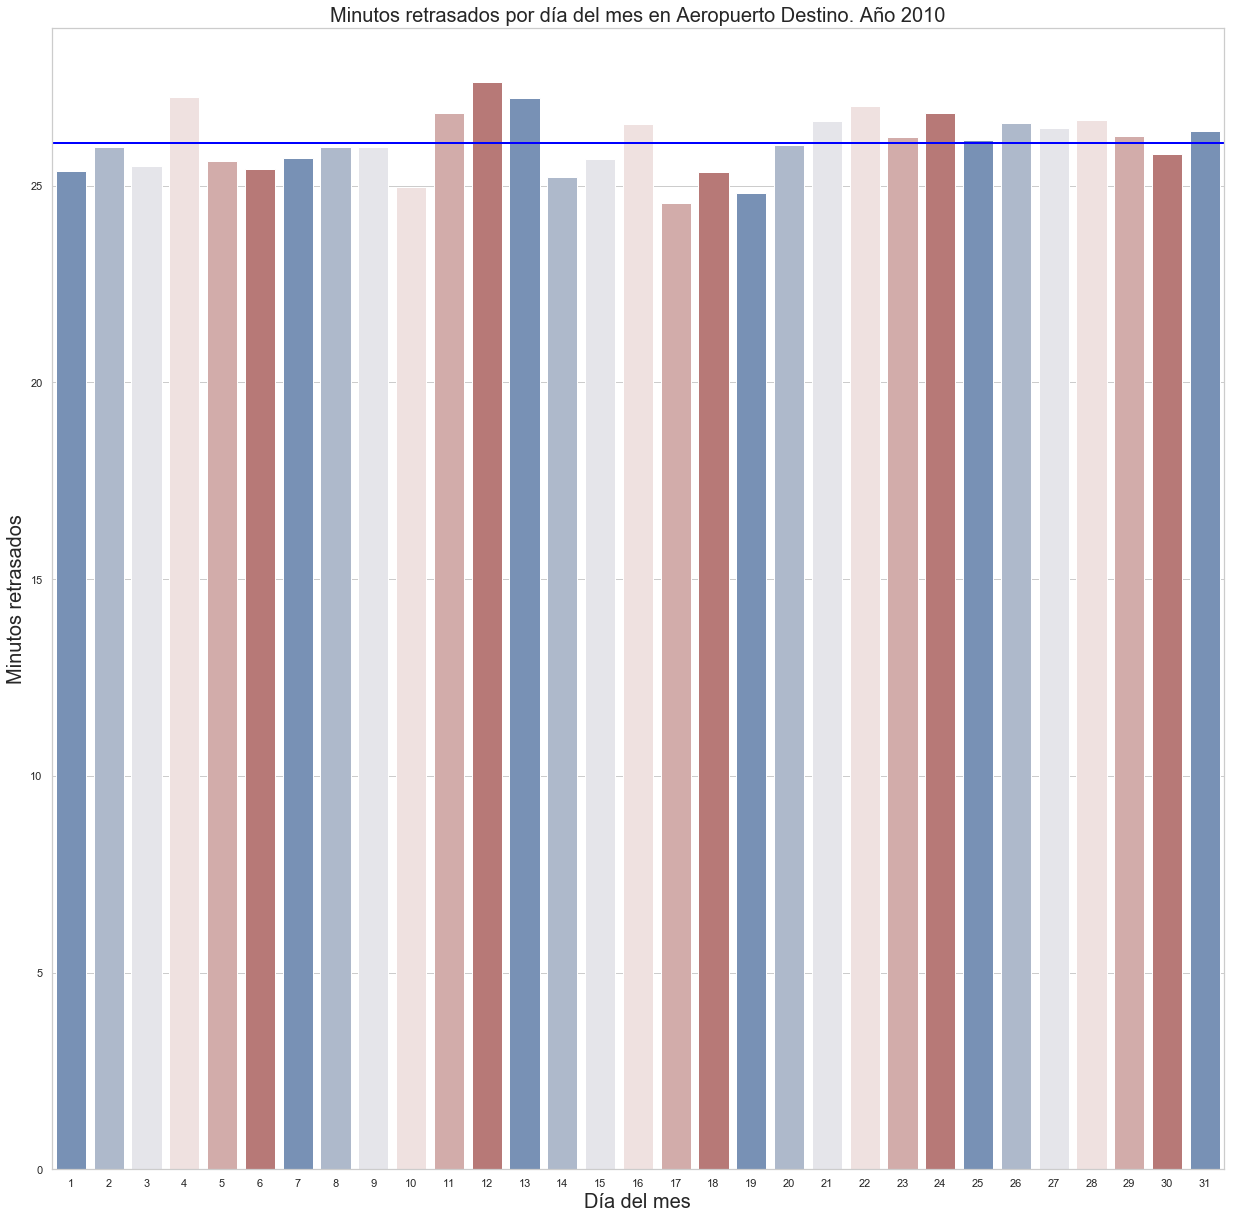

In [165]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [166]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [167]:
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [168]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1          78913  26.304665
2          70893  26.352362
3          68994  26.840102
4          73307  25.108012

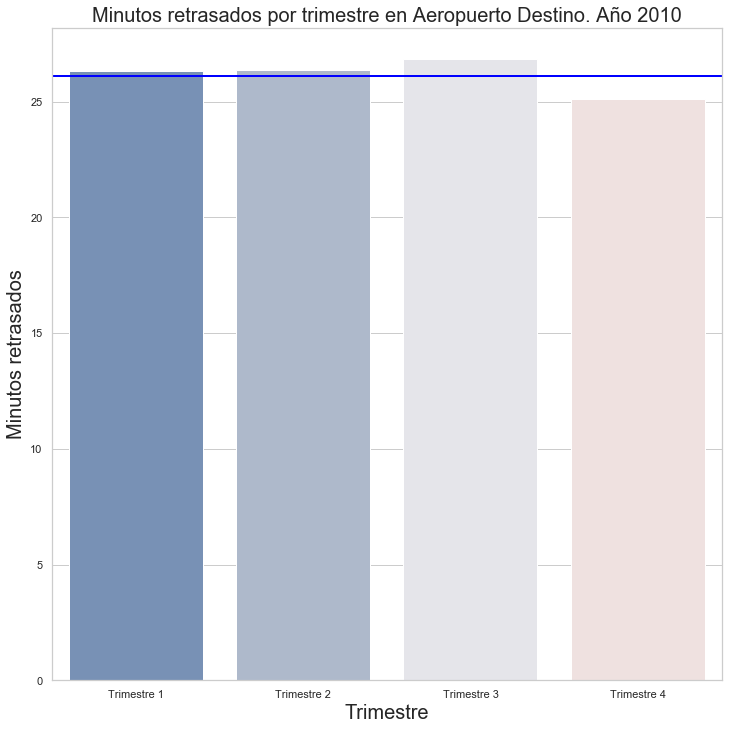

In [169]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.5.1.1 Ranking de aeropuertos en Retrasos sólo en Destino

In [170]:
dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True).head(15)

ATL    22604
ORD    15201
IAH    12986
DFW    10641
DTW    10079
DEN     9352
LAX     9288
JFK     7781
CLT     7584
SFO     7388
MSP     7331
EWR     6744
BOS     6647
PHX     6594
LGA     6169
Name: Dest, dtype: int64

In [171]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosSoloDestinoEnAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True)).head(45)

In [172]:
#retrasos totales de esos 45 aeropuerto
retrasosSoloDestinoEnAeropuertos.sum()

Dest    232966
dtype: int64

In [173]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosSoloDestinoEnAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])))) *100

In [174]:
pct80AeropuertosDestino

Dest    79.753652
dtype: float64

In [175]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos (solo en destino) del año ' + year)

45 aeropuertos concentran el 79.75% de los retrasos (solo en destino) del año 2010


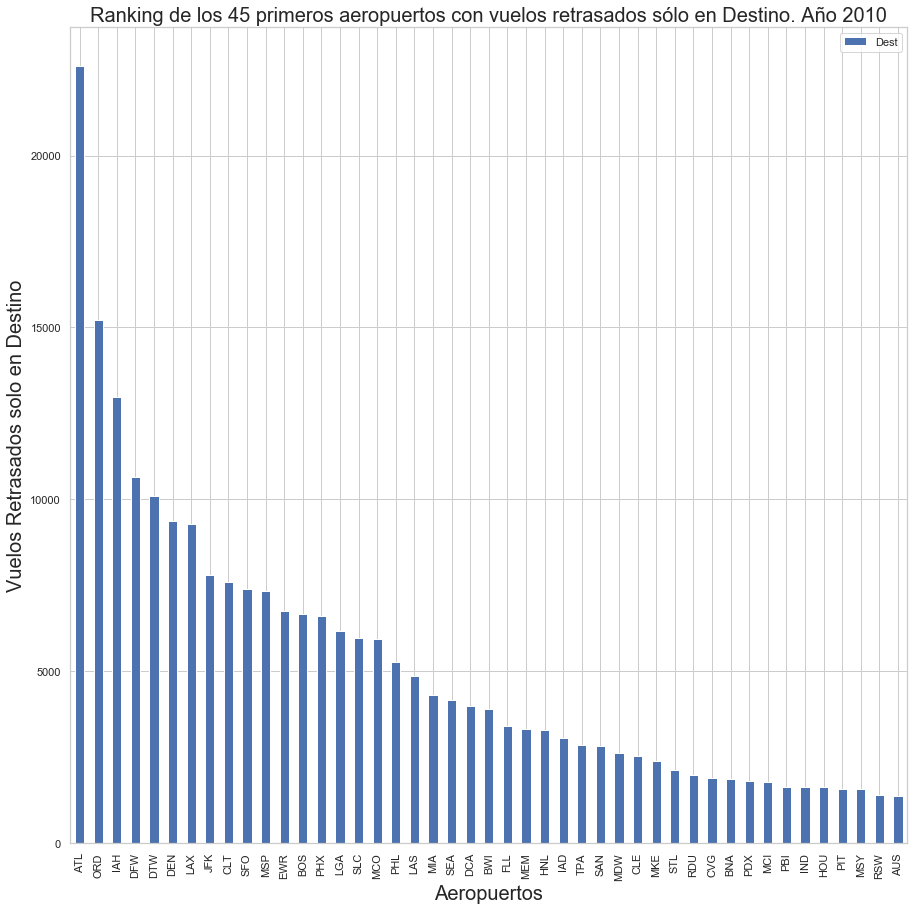

In [176]:
ax = retrasosSoloDestinoEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), ORD (Chicago) y DEN(Denver) repiten 2 como los 3 primeros, al igual que en Origen, pero se añaden IAH(Houston) y DFW (Dallas) como significativos, entre los 5 concentran más del 35% de los retrasos.
Sigue siendo un factor clave, ser aeropuerto Hub, distribuidor de tráfico de interconexión con otros destinos, como elemento de demoras en la red.

In [177]:
retrasosSoloDestinoEnAeropuertos = retrasosSoloDestinoEnAeropuertos.reset_index()
retrasosSoloDestinoEnAeropuertos.columns = ['Destination','ArrDelay']

In [178]:
retrasosSoloDestinoEnAeropuertos.head(45)

Destination  ArrDelay
0          ATL     22604
1          ORD     15201
2          IAH     12986
3          DFW     10641
4          DTW     10079
5          DEN      9352
6          LAX      9288
7          JFK      7781
8          CLT      7584
9          SFO      7388
10         MSP      7331
11         EWR      6744
12         BOS      6647
13         PHX      6594
14         LGA      6169
15         SLC      5964
16         MCO      5937
17         PHL      5262
18         LAS      4839
19         MIA      4290
20         SEA      4143
21         DCA      3972
22         BWI      3903
23         FLL      3397
24         MEM      3306
25         HNL      3279
26         IAD      3033
27         TPA      2855
28         SAN      2802
29         MDW      2604
30         CLE      2534
31         MKE      2388
32         STL      2102
33         RDU      1969
34         CVG      1872
35         BNA      1856
36         PDX      1791
37         MCI      1764
38         PBI      1619
39         IND      1612
40         HOU      1610
41         PIT      1570
42         MSY      1561
43         RSW      1379
44         AUS      1364

In [179]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSoloDestinoEnAeropuertos["Destination"].values.tolist()

In [180]:
#nos quedamos con los datos de esos aeropuertos
retrasosSoloDestinoEnAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

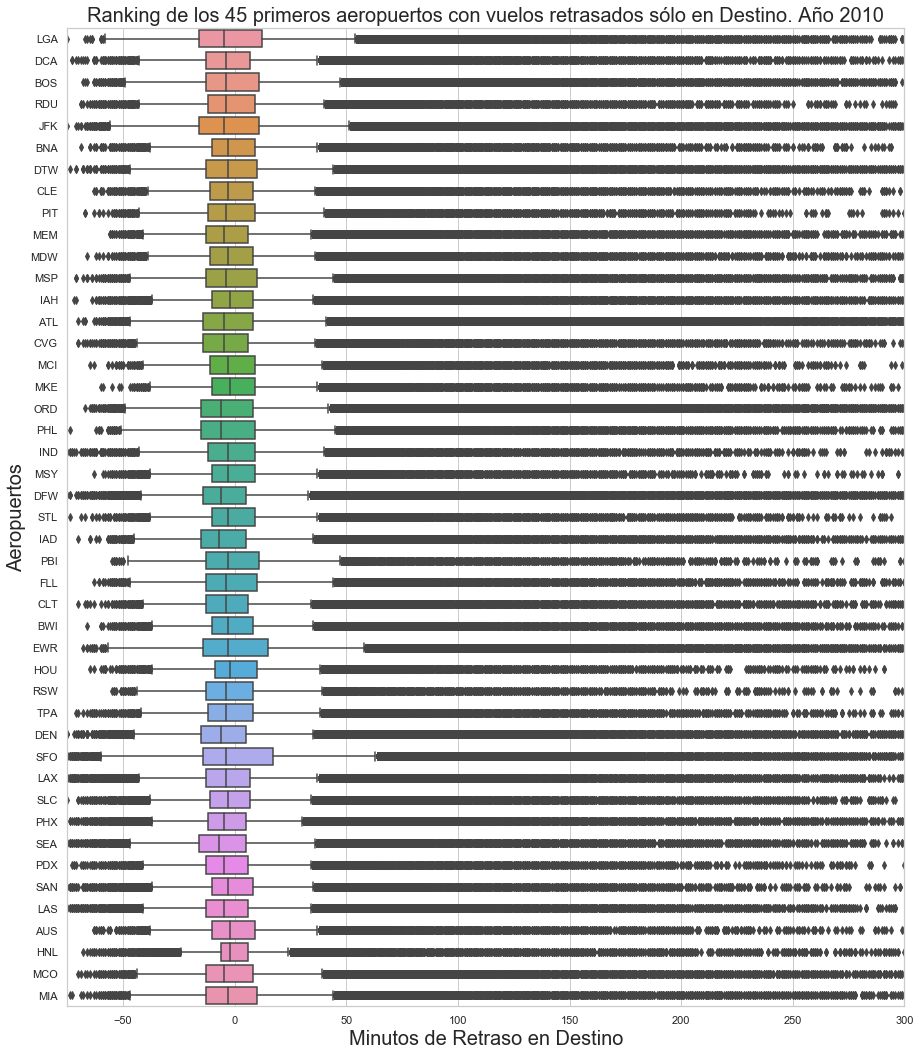

In [181]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-75,300)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

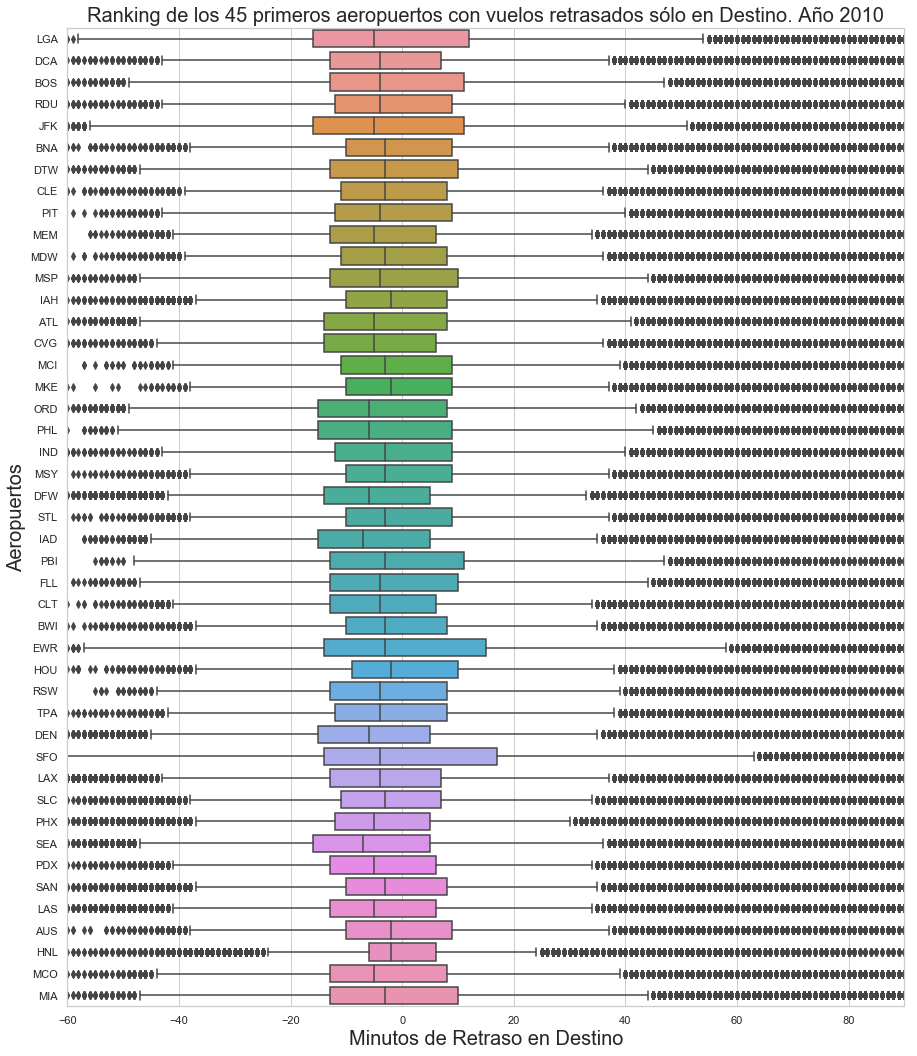

In [182]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-60,90)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

Podemos apreciar que hay una gran cantidad de vuelos con adelanto, es decir, que tendremos que si queremos quedarnos solo con retrasos de verdad y sacar sus estadísticos debemos eliminar las muestras con adelanto.

In [183]:
retrasosSoloDestinoEnAeropuertosSinAdelantos = pd.DataFrame(retrasosSoloDestinoEnAeropuertos[(retrasosSoloDestinoEnAeropuertos['ArrDelay'] > 15)])



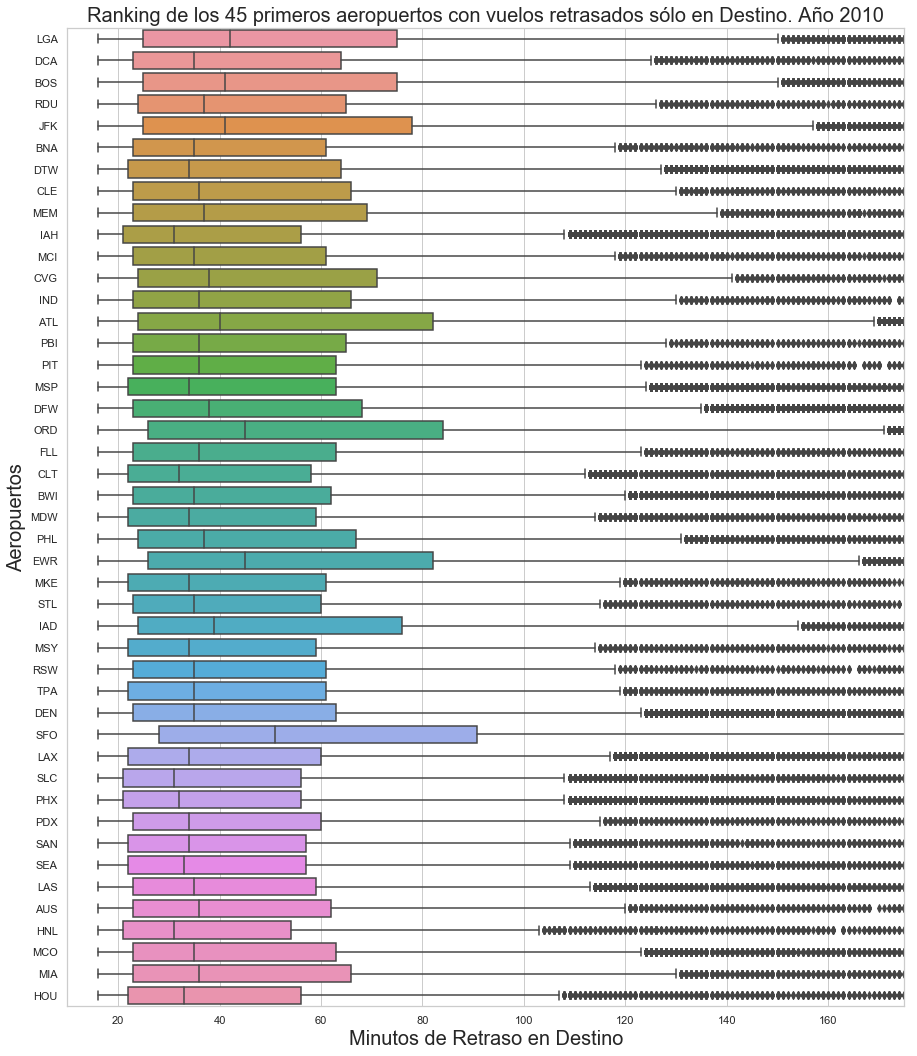

In [184]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(10,175)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertosSinAdelantos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertosSinAdelantos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

In [185]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosSoloDestinoEnAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [186]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [187]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [188]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

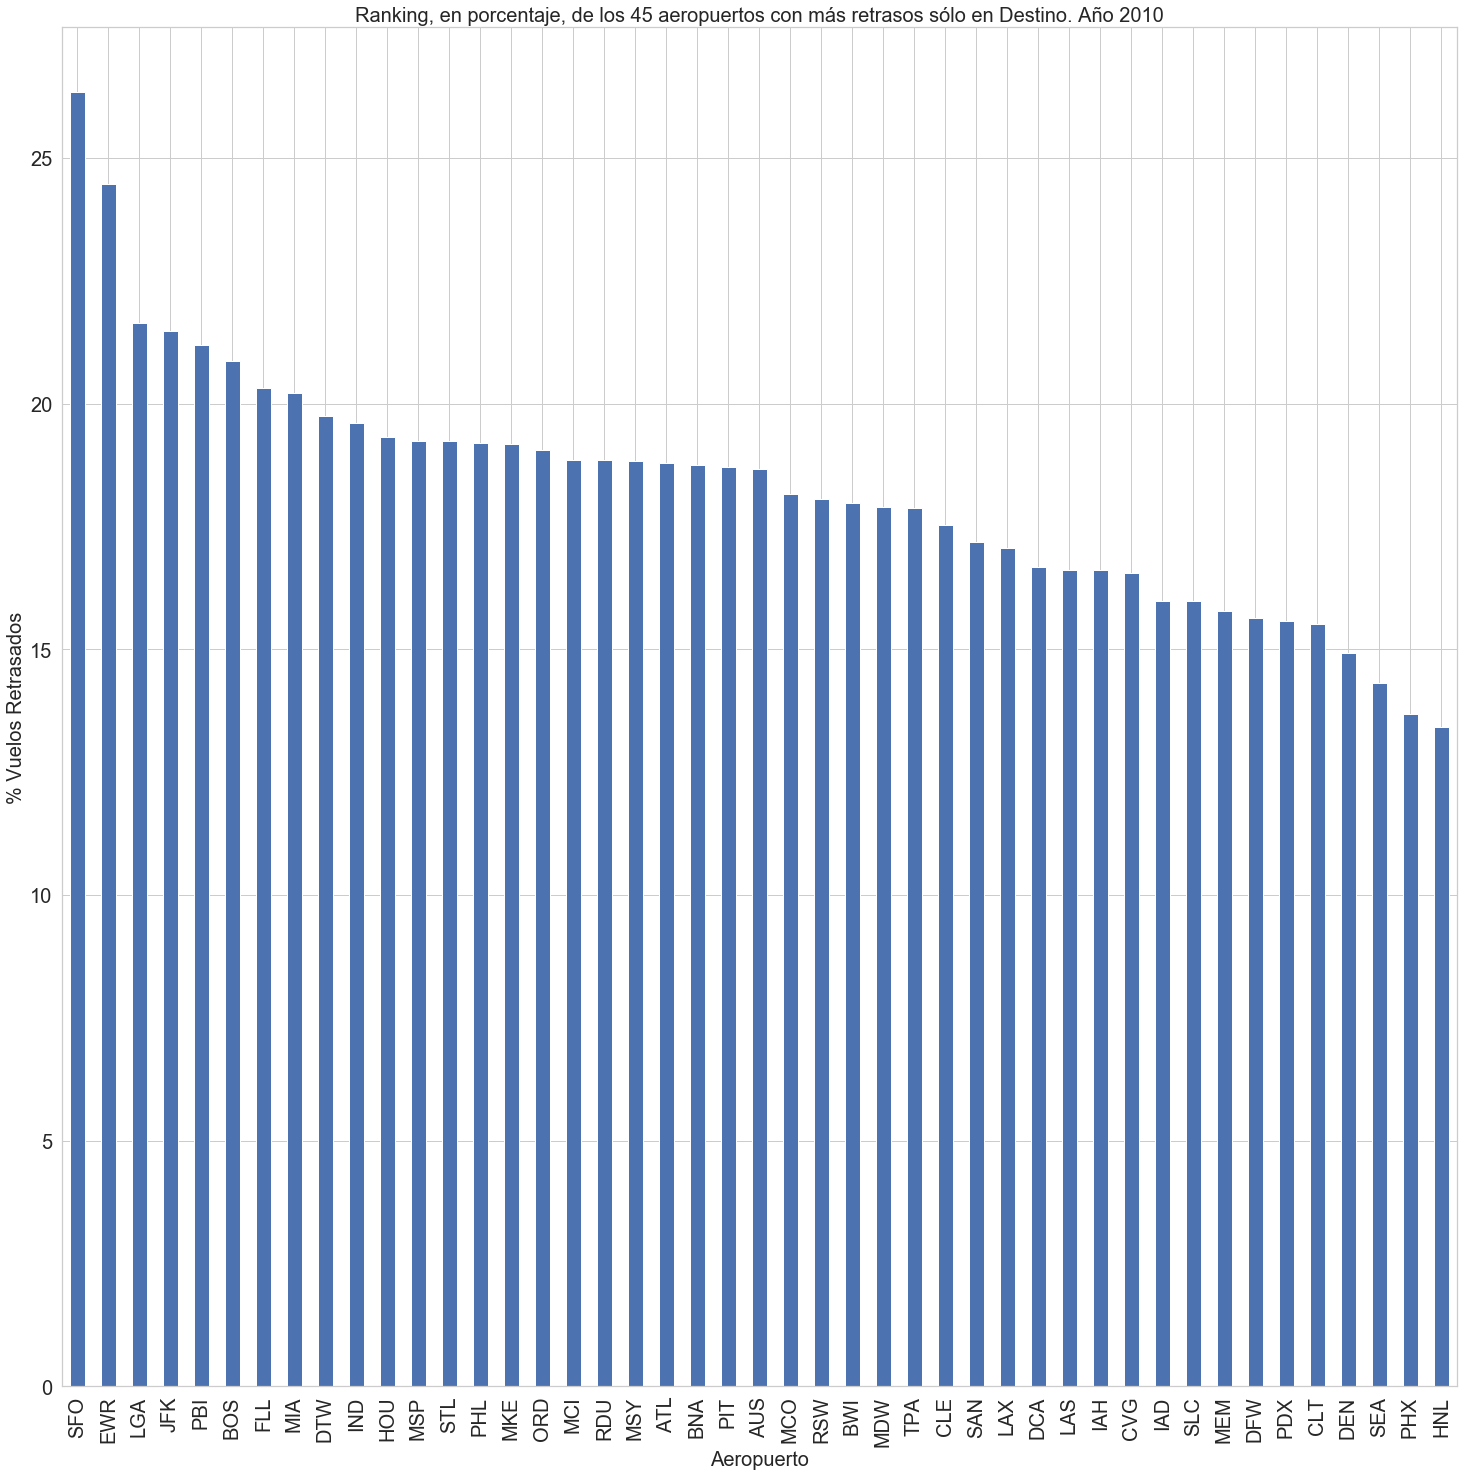

In [189]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos sólo en Destino. Año ' + year, fontsize=20)

plt.show()

Por porcentaje sobre su total de vuelos, destaca enormemente los 3 aeropuertos principales del área de Nueva York, EWR, LGA y JFK. Y en los 10 primeros 9 de ellos son de la Costa Este y Puerto Rico, sólo SFO (San Francisco) es de la Costa Oeste.

### 1.3.5.1.2 Retraso Destino (CON o SIN retraso en Origen)

En el apartado anterior sólo mostrábamos vuelos que se habían retrasado sólo en Destino y que salieron puntuales en Origen

In [190]:
#vuelos retrasados en Destino saliesen o no retrasados en origen
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [191]:
retrasos = pd.DataFrame(retrasosDestino['ArrDelay'])

retrasos.head(5)

ArrDelay
2      100.0
3       28.0
6      119.0
9       67.0
11      18.0

In [192]:
retrasos.describe().T

count       mean        std   min   25%   50%   75%     max
ArrDelay  1172712.0  53.842465  53.549265  15.0  22.0  35.0  65.0  1632.0

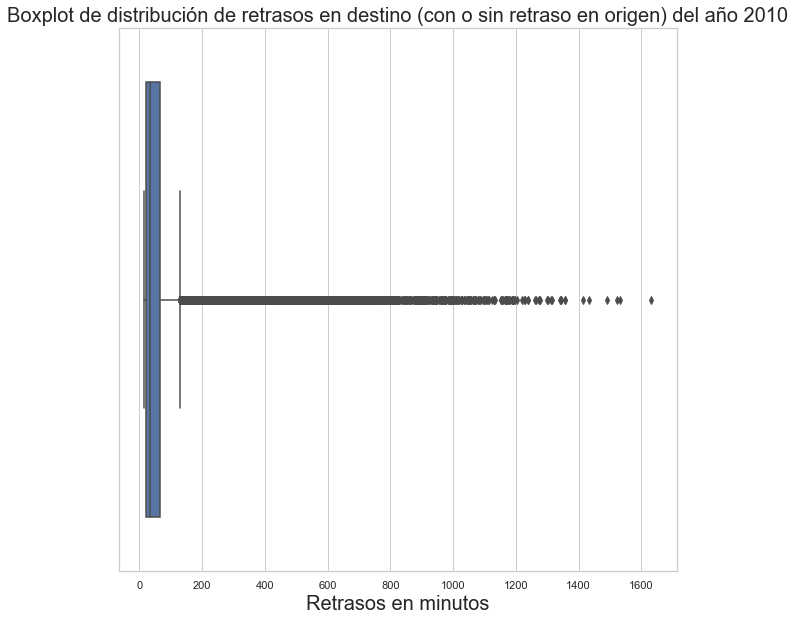

In [193]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

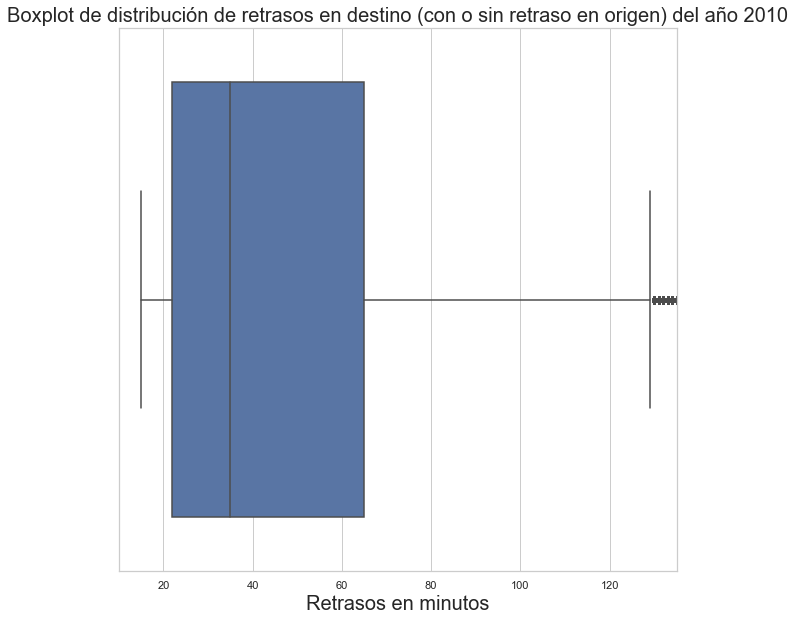

In [194]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,135)
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

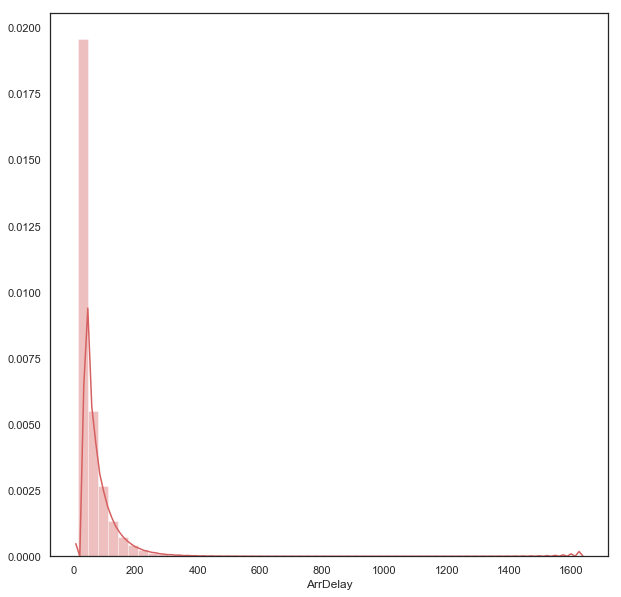

In [195]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasos["ArrDelay"], color="r")

plt.show()

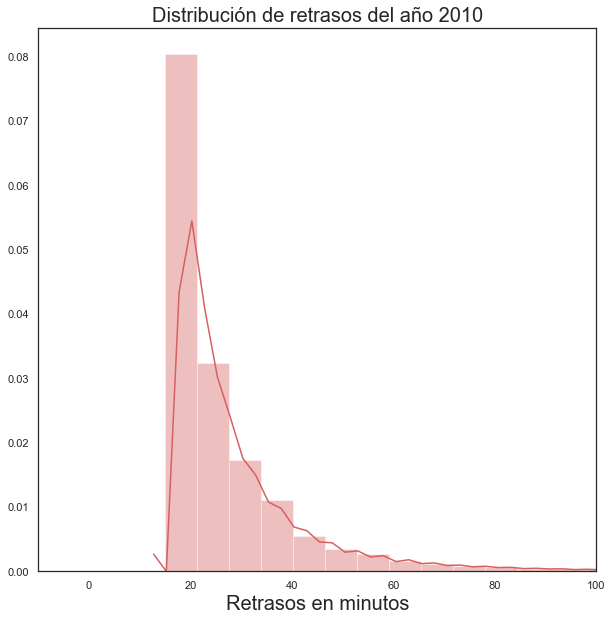

In [196]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,100)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

In [197]:
retrasosDestinoPorMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorMes = pd.DataFrame(retrasosDestinoPorMes.groupby('Month').aggregate({'Month': 'count', 'ArrDelay':'mean'}))


In [198]:
retrasosDestinoPorMes

Month   ArrDelay
Month                   
1       96874  52.871565
2       94942  53.938289
3      100497  54.756739
4       73154  50.153867
5      100605  55.952497
6      119626  57.780951
7      122534  57.024932
8       97342  53.558752
9       72566  50.034079
10      82187  51.627277
11      82927  47.239753
12     129458  55.565844

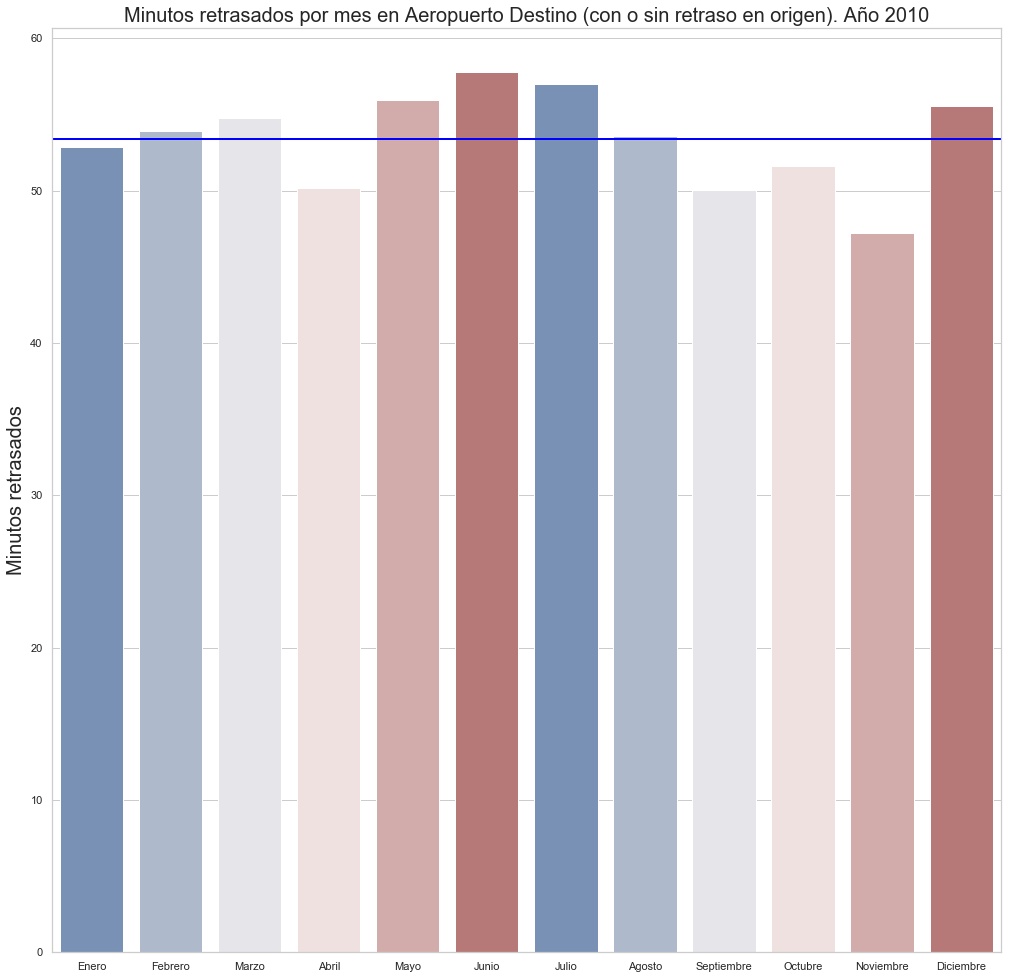

In [199]:

#Vuelos retrasados por el día de la semana

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(17,17))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por mes en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [200]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))


In [201]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1             189128  54.155683
2             161305  52.903010
3             170197  54.038344
4             180775  52.651716
5             185318  55.425852
6             122508  52.191849
7             163481  54.961885

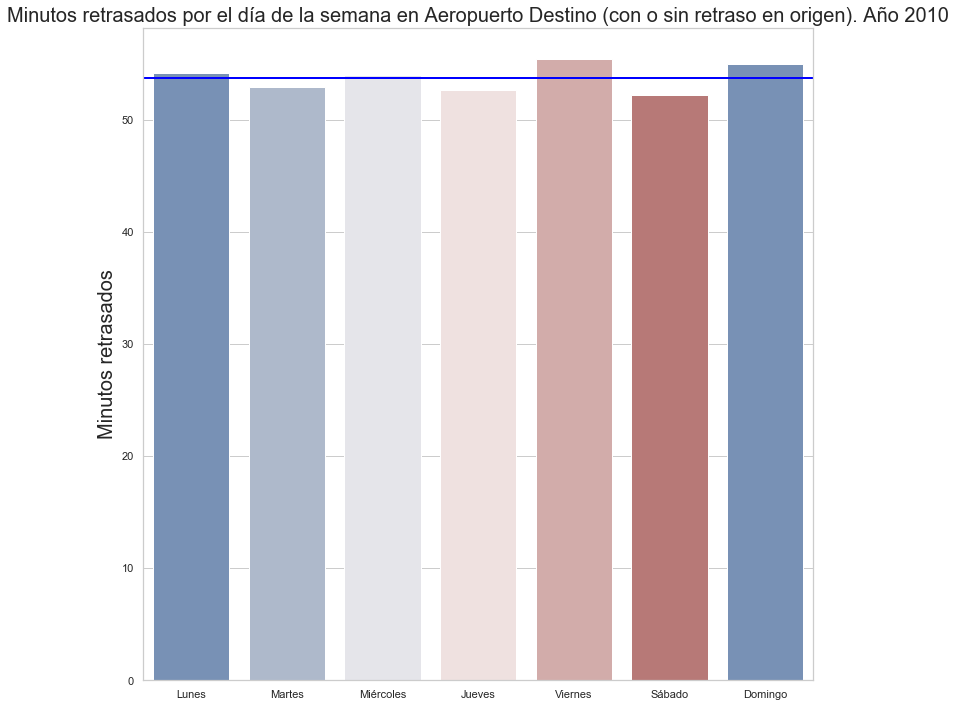

In [202]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [203]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [204]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559        14381  54.222864
0600-0659         7484  56.055585
0700-0759        19546  55.208687
0800-0859        30984  52.166667
0900-0959        41576  49.138493
1000-1059        49757  48.840967
1100-1159        53237  49.205459
1200-1259        59435  50.462337
1300-1359        62158  50.226970
1400-1459        68348  50.986335
1500-1559        72448  52.896533
1600-1659        89669  52.823183
1700-1759        89607  54.577310
1800-1859       102227  56.073493
1900-1959        95612  56.495796
2000-2059       104950  57.793816
2100-2159        89308  57.429738
2200-2259        72396  56.107658
2300-2359        49589  54.418823

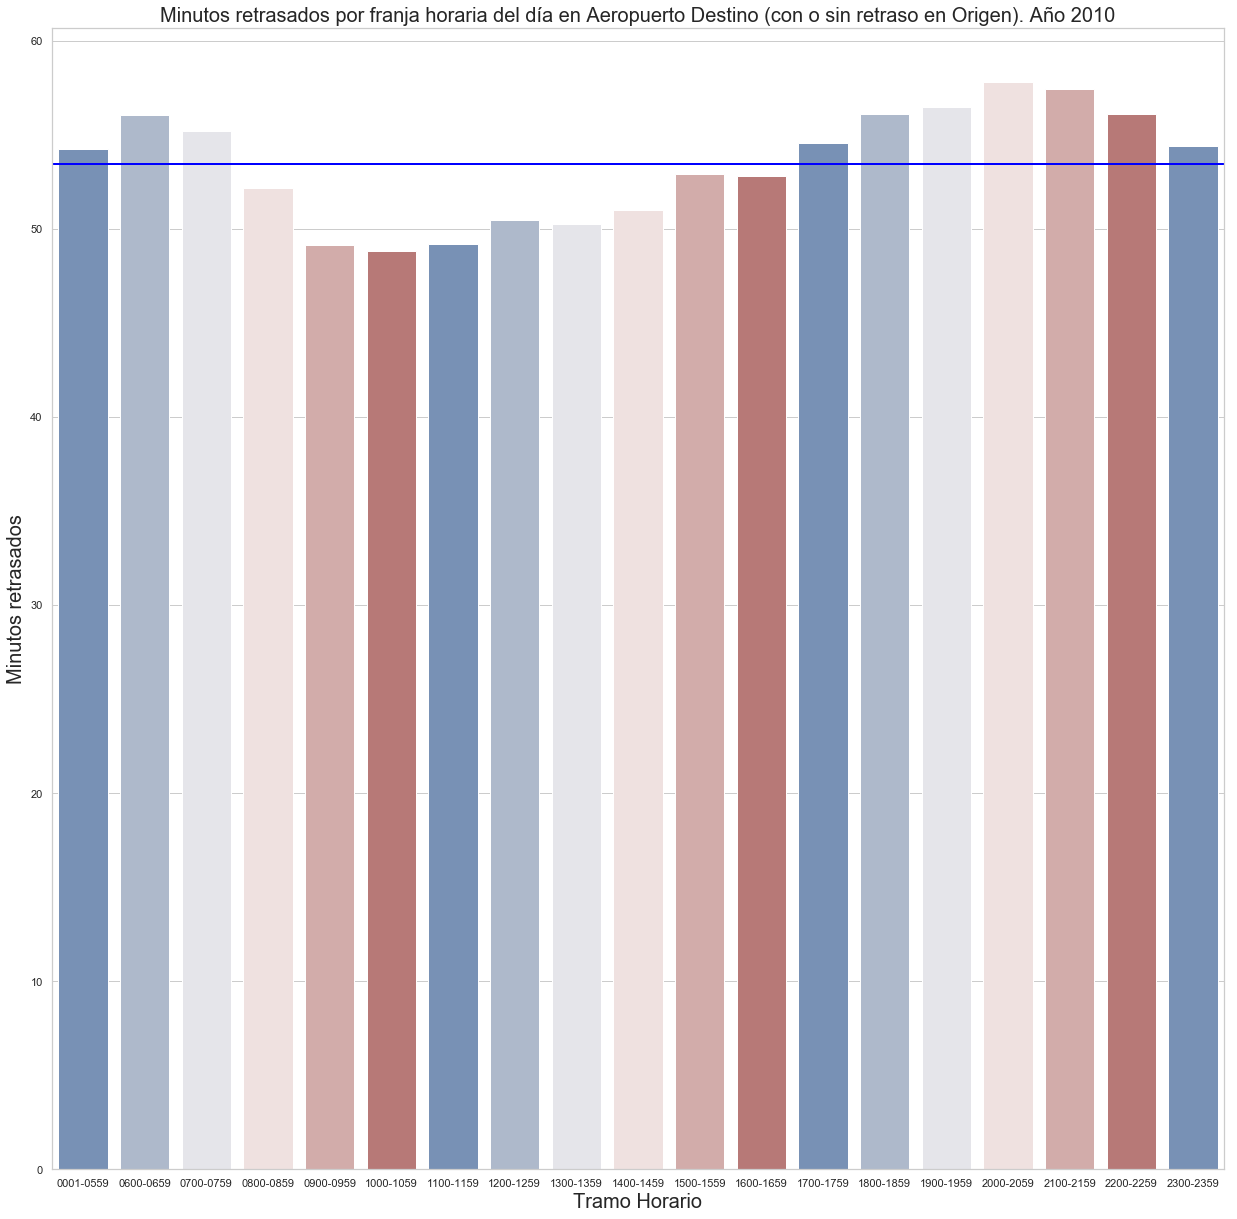

In [205]:
#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [206]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [207]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                35652  53.759284
2                37507  51.464367
3                35243  49.824958
4                36300  52.562369
5                33758  50.700901
6                32621  51.342509
7                37066  52.797092
8                40782  52.035089
9                33133  48.980020
10               33025  48.971930
11               39020  54.439621
12               48429  63.076545
13               41709  57.871131
14               37286  54.133160
15               39009  51.735394
16               39018  51.895894
17               33565  51.791032
18               37006  53.112387
19               34490  49.477849
20               35596  53.221795
21               47456  55.570929
22               46207  52.369771
23               39312  55.782357
24               45877  60.197790
25               39605  52.763717
26               40131  54.686477
27               40568  58.752785
28               40489  55.782682
29               37994  53.870269
30               35328  54.689623
31               19530  53.730927

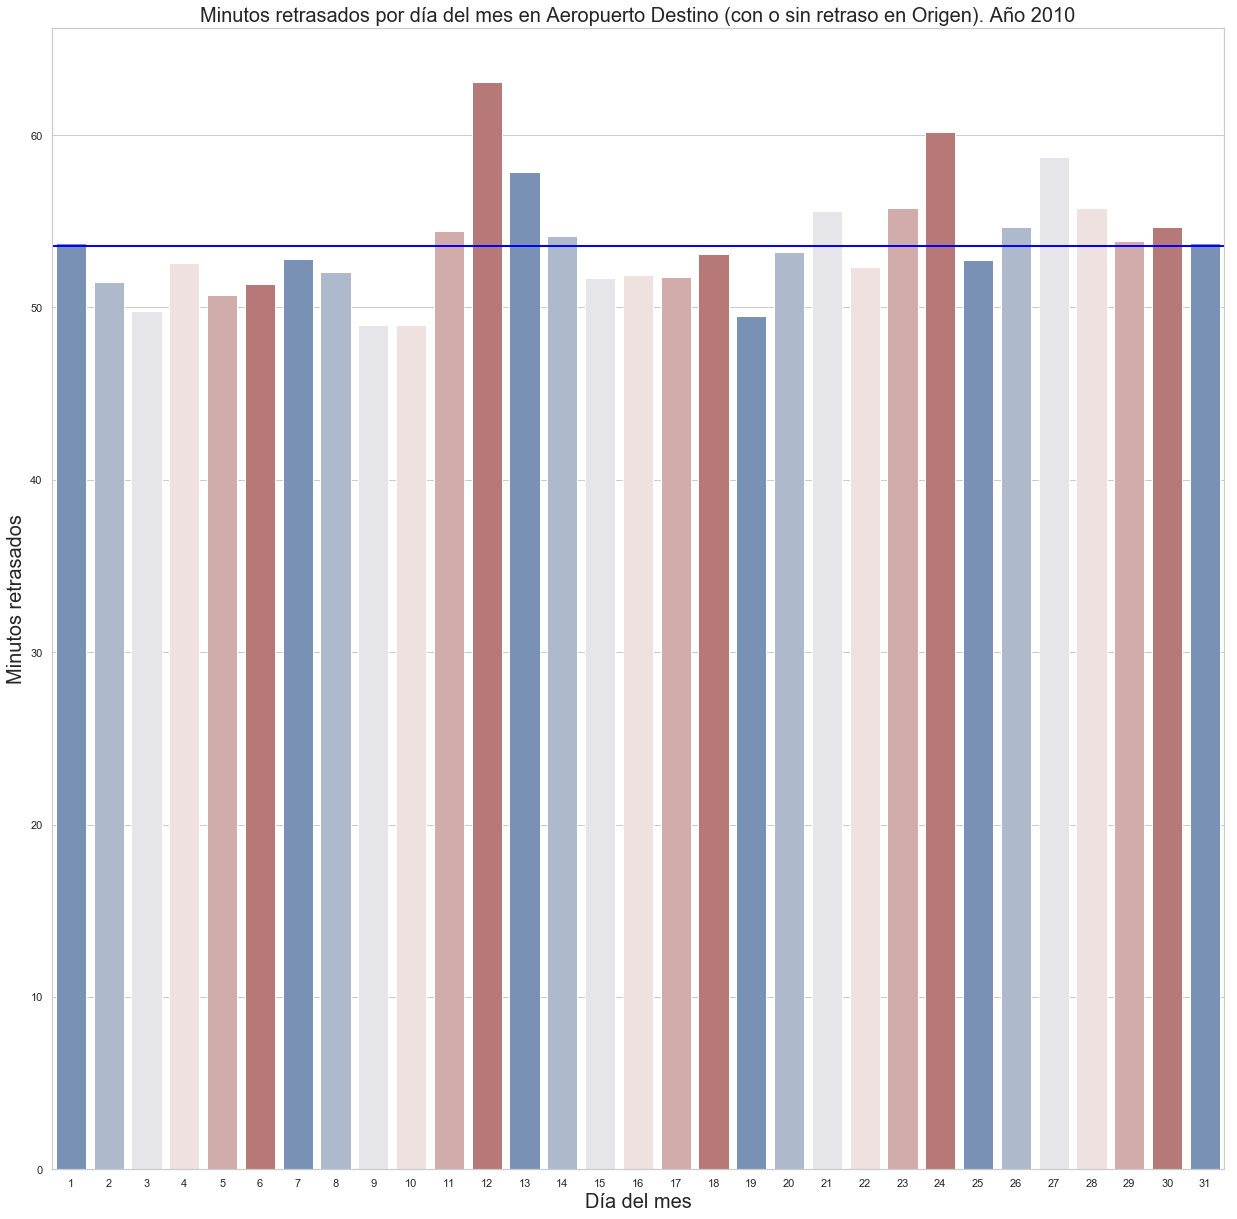

In [208]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [209]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [210]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1         292313  53.866154
2         293385  55.252181
3         292442  54.136485
4         294572  52.123029

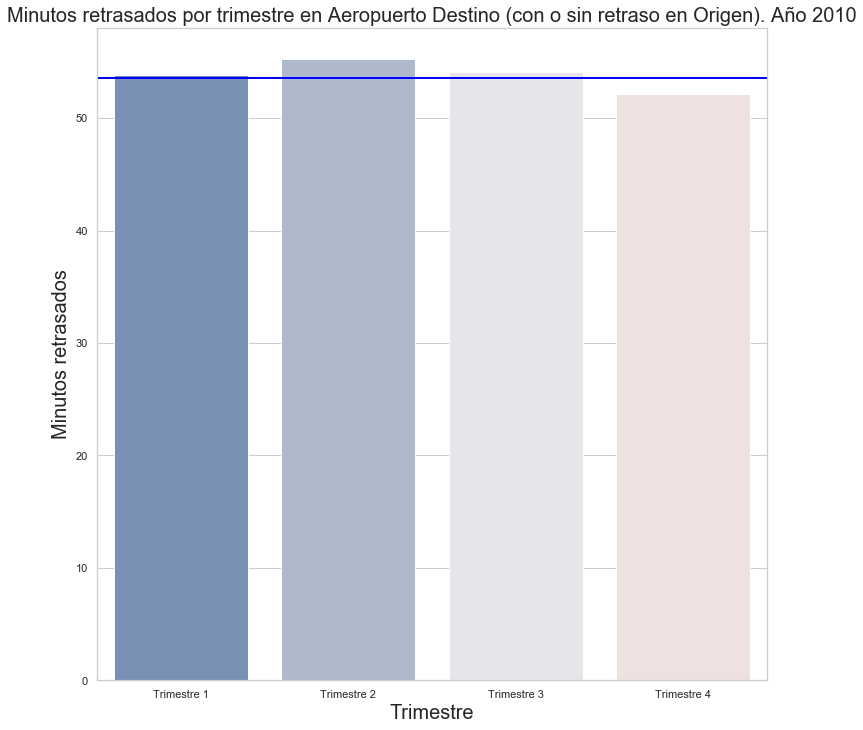

In [211]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Vistos las diferentes dimensiones temporales, se puede observar:
* cómo se van acumulando los retrasos a lo largo del día.
* como los principios y fines de mes hay algo más de retraso
* no hay gran diferencia entre los días de la semana

In [212]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)].Dest.value_counts(sort=True)).head(45)

In [213]:
retrasosAeropuertos

Dest
ATL  77480
ORD  59755
DFW  41867
SFO  36888
DEN  35623
LAX  34067
DTW  31598
IAH  30428
EWR  27955
PHX  24811
MSP  24214
LAS  24141
JFK  24068
BOS  23700
LGA  22198
MCO  22123
SLC  19932
CLT  19469
BWI  18903
PHL  17015
MDW  15155
SEA  14116
MIA  14059
SAN  13521
DCA  13122
FLL  12675
IAD  12333
TPA  12296
MEM  12254
STL  10957
BNA  10088
HOU  10017
CLE   9824
MCI   9482
RDU   9214
MKE   8651
OAK   8355
SMF   8313
PDX   8217
DAL   8211
CVG   8126
AUS   7937
SAT   7670
IND   7261
MSY   7210

In [214]:
#retrasos totales de esos 45 aeropuerto
retrasosAeropuertos.sum()

Dest    875299
dtype: int64

In [215]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1)])))) *100

In [216]:
pct80AeropuertosDestino

Dest    74.638871
dtype: float64

In [217]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 74.64% de los retrasos del año 2010


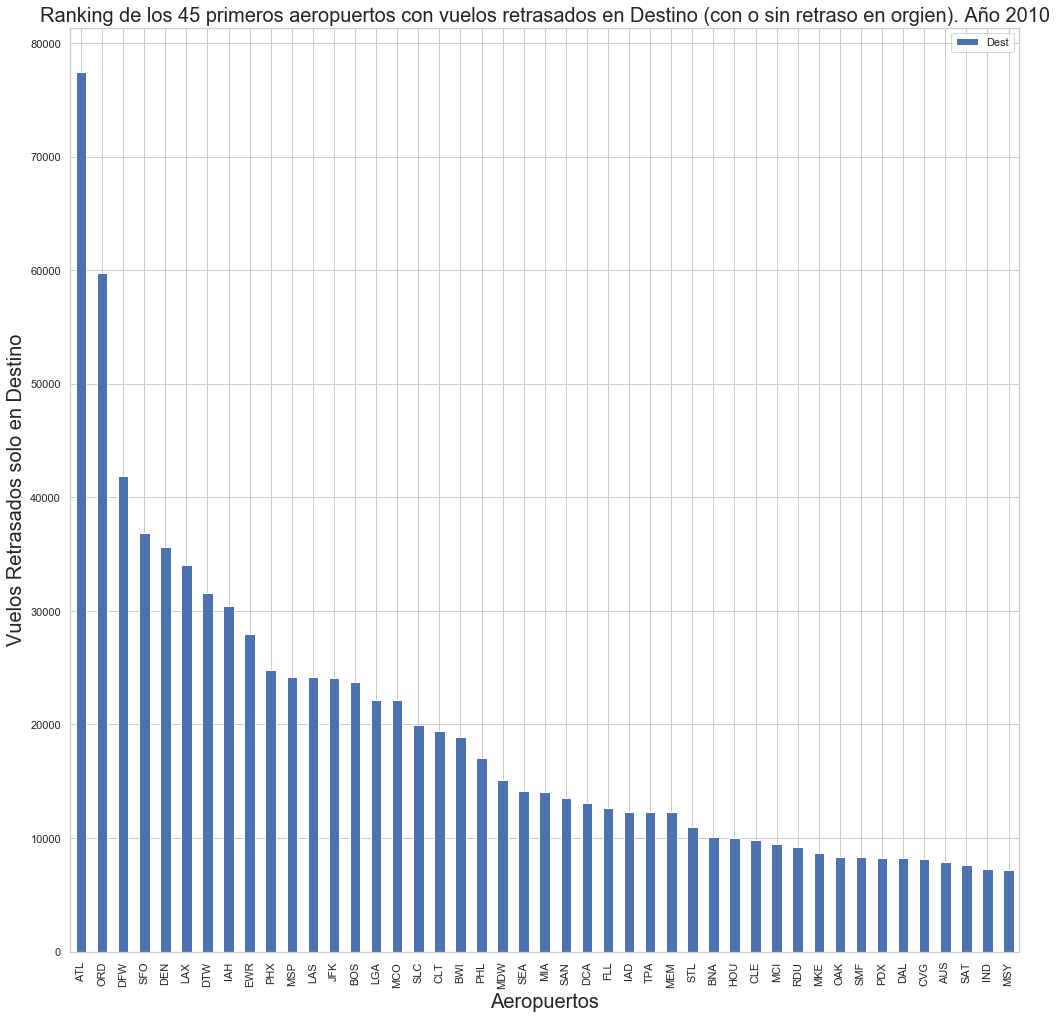

In [218]:
ax = retrasosAeropuertos.plot(kind='bar', figsize=(17,17))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Destino (con o sin retraso en orgien). Año ' + year , fontsize=20)

plt.show()

In [219]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosAeropuertos.index.values.tolist()

In [220]:
#nos quedamos con los datos de esos aeropuertos
retrasosDestinoAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

In [221]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosDestinoAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [222]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [223]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [224]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

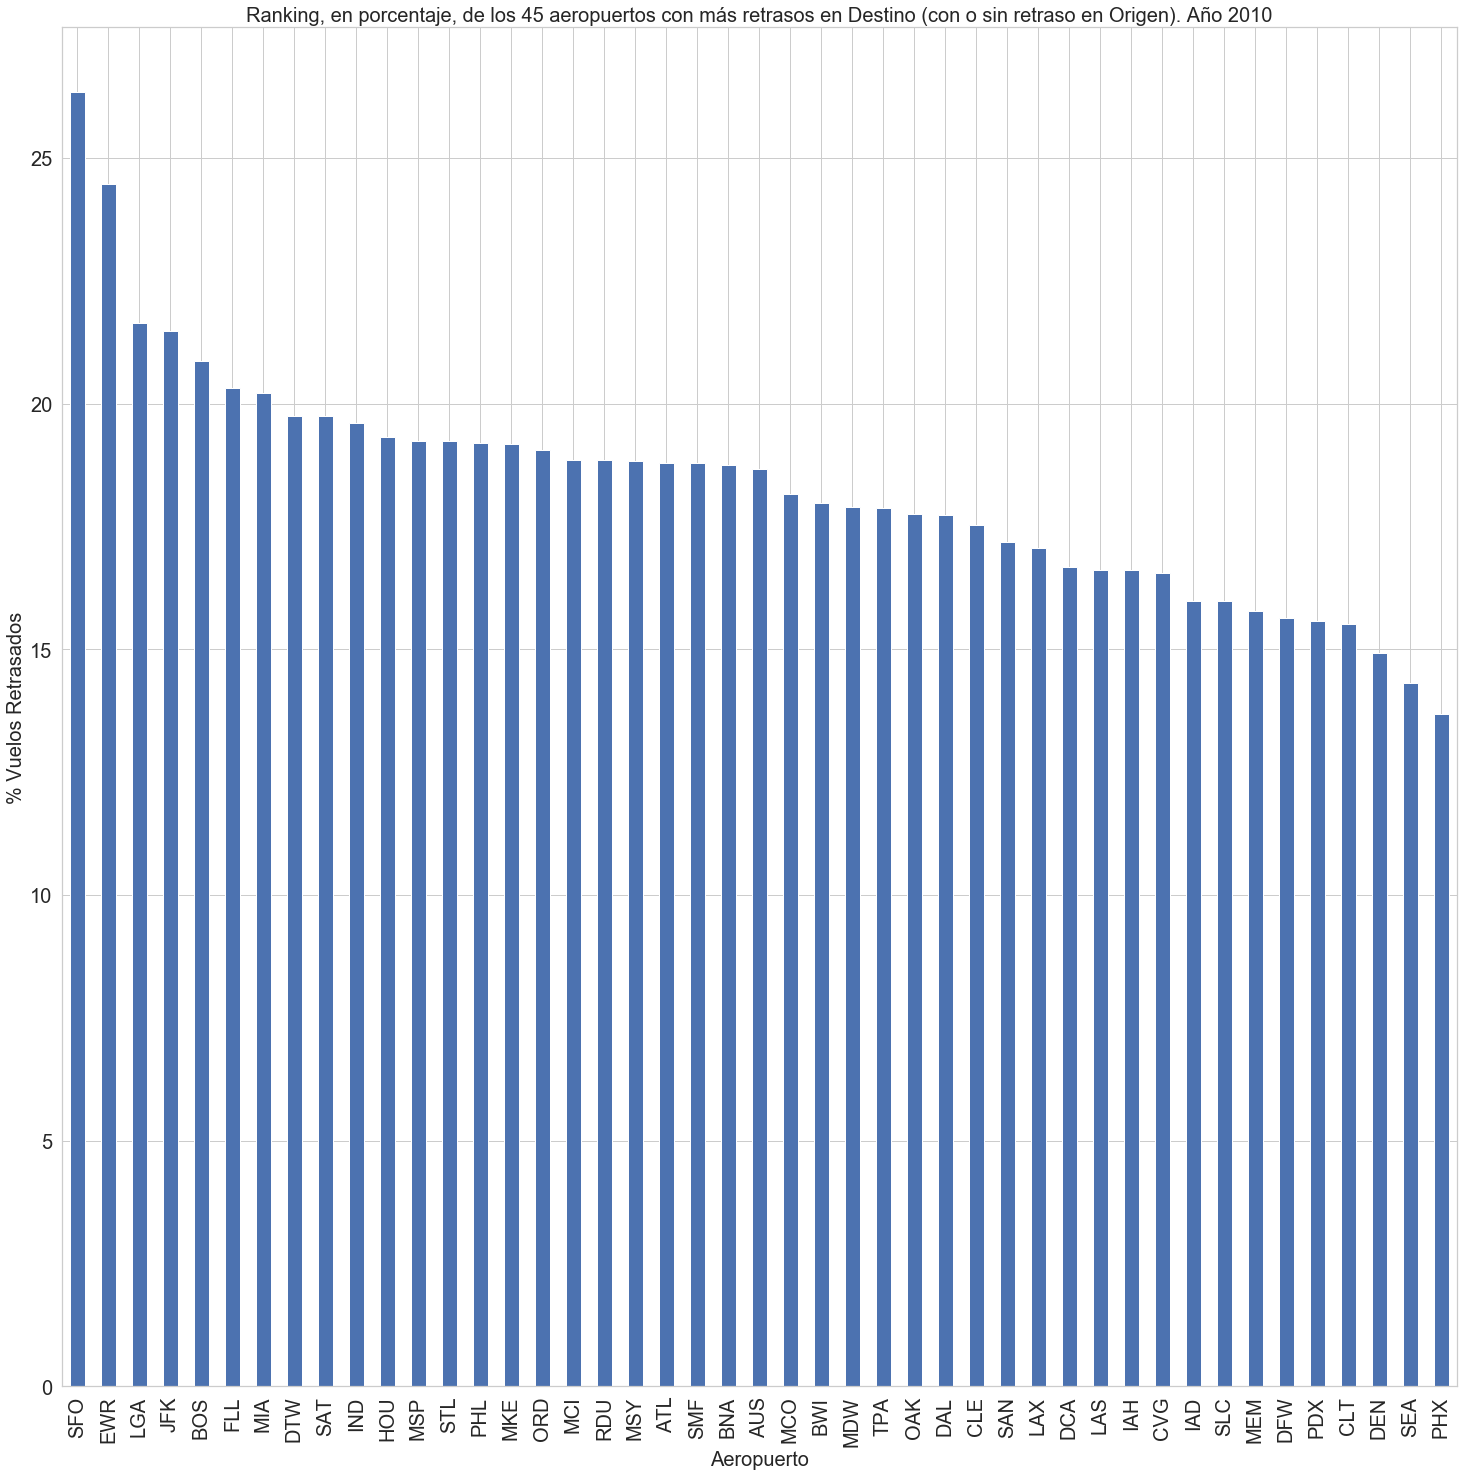

In [225]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.show()

En porcentaje de vuelos retrasados, claramente, se ve que 9 de los 10 primeros aeropuertos del ranking son de la Costa Este.

### 1.3.5.1.2 Retraso por zona geográfica del Destino

In [226]:
#cualquier vuelo retrasado en la llegada
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [227]:
#vamos a ponerle de qué zona greográfica es
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv(ruta + "/geo/" + 'ZonasEstados.csv', delimiter=';')

In [228]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [229]:
#hacemos el join por el Estado Origen del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='OriginState', how='inner')

In [230]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='DestState', how='inner')

In [231]:
#comprobamos
retrasosDestino[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NC        ES        NY      EN
1          NC        ES        NY      EN
2          NC        ES        NY      EN
3          NC        ES        NY      EN
4          NC        ES        NY      EN

In [232]:
retrasosDestinoGeo = pd.DataFrame(retrasosDestino.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [233]:
retrasosDestinoGeo

DestGeo   ArrDelay
DestGeo                    
CN         66387  50.874704
CS        200845  51.140462
EN        405598  56.199451
ES        271049  55.409465
WN         21018  49.939766
WS        206438  51.067110

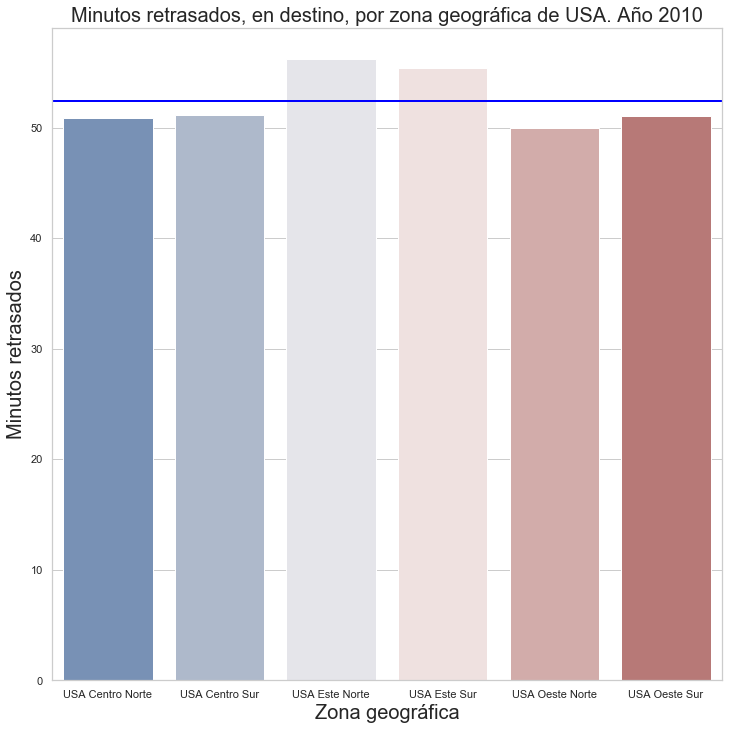

In [234]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['USA Centro Norte', 'USA Centro Sur', 'USA Este Norte', 'USA Este Sur', 'USA Oeste Norte', 'USA Oeste Sur']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoGeo['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Zona geográfica", fontsize=20)
ax.set_title('Minutos retrasados, en destino, por zona geográfica de USA. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoGeo['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Nos quedamos sólo con los de la Costa Este

In [235]:

retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [236]:
retrasosDestinoSoloCostaEste.Dest.unique()

array(['LGA', 'JFK', 'ROC', 'ALB', 'BUF', 'SYR', 'SWF', 'ITH', 'ELM',
       'BGM', 'HPN', 'ISP', 'BOS', 'ACK', 'BDL', 'DCA', 'IAD', 'ORF',
       'RIC', 'ROA', 'PHF', 'CHO', 'LYH', 'CMH', 'CLE', 'DAY', 'CAK',
       'TOL', 'DTW', 'GRR', 'TVC', 'LAN', 'AZO', 'FNT', 'MBS', 'PLN',
       'MQT', 'MKG', 'CMX', 'ATL', 'SAV', 'AGS', 'BQK', 'CSG', 'VLD',
       'ABY', 'CVG', 'SDF', 'LEX', 'PAH', 'ORD', 'MDW', 'MLI', 'BMI',
       'PIA', 'CMI', 'SPI', 'BNA', 'MEM', 'TYS', 'CHA', 'TRI', 'BWI',
       'FLL', 'JAX', 'MCO', 'MIA', 'PBI', 'RSW', 'TPA', 'PNS', 'SRQ',
       'DAB', 'VPS', 'TLH', 'PFN', 'EYW', 'MLB', 'GNV', 'PHL', 'PIT',
       'MDT', 'ABE', 'ERI', 'AVP', 'PVD', 'RDU', 'CLT', 'ILM', 'OAJ',
       'FAY', 'GSO', 'AVL', 'EWN', 'SEA', 'GEG', 'PSC', 'MWH', 'EWR',
       'ACY', 'MHT', 'SJU', 'BQN', 'PSE', 'MYR', 'CHS', 'GSP', 'CAE',
       'FLO', 'IND', 'EVV', 'FWA', 'SBN', 'PWM', 'BGR', 'BHM', 'MOB',
       'MGM', 'HSV', 'DHN', 'SLC', 'CDC', 'SGU', 'JAN', 'GPT', 'GTR',
       'MEI', 'UTM',

In [237]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [238]:
retrasosDestinoSoloCostaEste

DestGeo   ArrDelay
DestGeo                    
EN        302361  57.558045
ES        200700  56.976951

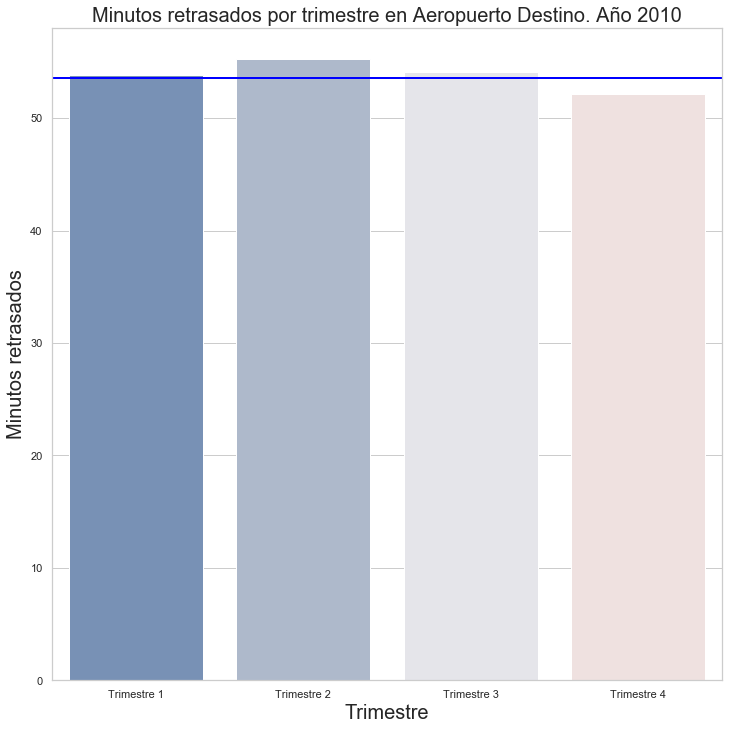

In [239]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [242]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [243]:
retrasosDestinoPorRuta = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby(['Route']).aggregate({'Route': 'count', 'ArrDelay':'mean', 'DepDelay': 'mean', 'Origin': 'count', 'Dest':'count'}))

retrasosDestinoPorRuta = retrasosDestinoPorRuta.rename(columns={'Route': 'VuelosTotales', 'ArrDelay': 'MediaRetrasoDestinoTotal', 'DepDelay': 'MediaRetrasoOrigenTotal'})



In [244]:
retrasosDestinoPorRuta.reset_index()

Route  VuelosTotales  MediaRetrasoDestinoTotal  \
0     ABE-ATL             74                 74.918919   
1     ABE-CLE              8                 37.000000   
2     ABE-CLT             26                 35.192308   
3     ABE-DTW            204                 57.421569   
4     ABE-FLL             24                 36.000000   
5     ABE-MCO             54                 54.796296   
6     ABE-ORD            338                 70.227811   
7     ABY-ATL            178                 61.949438   
8     ACK-JFK             72                 61.750000   
9     ACY-ATL            108                 74.962963   
10    ACY-MCO              9                 82.111111   
11    AGS-ATL            685                 68.550365   
12    AGS-CLT              5                 84.200000   
13    AGS-LGA              2                 41.500000   
14    ALB-ATL            165                 68.806061   
15    ALB-BWI            336                 51.372024   
16    ALB-CLE            174                 39.068966   
17    ALB-CLT            121                 46.429752   
18    ALB-CVG             13                145.076923   
19    ALB-DTW            254                 53.200787   
20    ALB-EWR            135                 71.622222   
21    ALB-FLL             29                 45.241379   
22    ALB-IAD            121                 61.768595   
23    ALB-JFK             82                 63.878049   
24    ALB-MCO            111                 47.270270   
25    ALB-MDW             59                 42.135593   
26    ALB-ORD            209                 83.488038   
27    ALB-TPA             15                 54.200000   
28    ATL-ABE            152                 68.000000   
29    ATL-ABY            142                 60.246479   
...       ...            ...                       ...   
1814  TPA-PVD            137                 52.116788   
1815  TPA-RDU            191                 45.235602   
1816  TPA-ROC             76                 62.605263   
1817  TPA-SDF             78                 40.974359   
1818  TPA-SJU             19                 58.368421   
1819  TPA-SLC              4                 23.250000   
1820  TRI-ATL            417                 70.247002   
1821  TRI-DTW             43                 55.069767   
1822  TRI-ORD             36                 58.333333   
1823  TVC-DTW            343                 54.495627   
1824  TVC-LGA             18                 58.444444   
1825  TVC-MQT             51                101.333333   
1826  TVC-ORD            343                 67.081633   
1827  TYS-ATL            692                 66.147399   
1828  TYS-CLE             64                 45.765625   
1829  TYS-CLT              2                 32.000000   
1830  TYS-CVG             83                 64.807229   
1831  TYS-DTW            123                 55.178862   
1832  TYS-EWR            152                 77.460526   
1833  TYS-IAD             87                 75.712644   
1834  TYS-LGA             57                 53.105263   
1835  TYS-MCO             35                 49.000000   
1836  TYS-MEM            182                 65.697802   
1837  TYS-MIA             41                 59.268293   
1838  TYS-ORD            471                 75.235669   
1839  UTM-ATL             16                 38.562500   
1840  VLD-ATL            165                 65.139394   
1841  VPS-ATL            716                 67.384078   
1842  VPS-CLT              5                 34.000000   
1843  VPS-MEM            140                 60.421429   

      MediaRetrasoOrigenTotal  Origin  Dest  
0                   64.040541      74    74  
1                   10.750000       8     8  
2                   16.730769      26    26  
3                   50.602941     204   204  
4                   21.708333      24    24  
5                   51.759259      54    54  
6                   62.000000     338   338  
7                   52.910112     178   178

In [245]:
rutasVuelosTop20 = retrasosDestinoPorRuta.sort_values(['VuelosTotales'], ascending=False).head(20)

In [246]:
rutasVuelosTop20

VuelosTotales  MediaRetrasoDestinoTotal  MediaRetrasoOrigenTotal  \
Route                                                                       
ATL-LGA           2534                 57.525651                47.079716   
ATL-MCO           2112                 50.261364                43.143466   
ORD-LGA           2077                 61.430429                57.434762   
LGA-ATL           1951                 66.050231                57.876474   
ORD-EWR           1868                 68.155246                62.523555   
BOS-LGA           1824                 48.331140                31.741776   
ATL-ORD           1806                 64.488926                54.023256   
ATL-FLL           1752                 50.409817                44.620434   
ORD-ATL           1749                 61.958834                55.574042   
LGA-ORD           1733                 63.777842                53.535488   
DCA-BOS           1646                 53.279465                35.009113   
ATL-EWR           1642                 64.268575                53.487211   
MCO-ATL           1628                 66.063882                52.176904   
LGA-BOS           1628                 49.119165                29.067568   
ATL-DCA           1627                 50.407498                40.134604   
BOS-JFK           1613                 58.887787                48.051457   
JFK-BOS           1550                 68.591613                62.612258   
BWI-BOS           1487                 60.604573                55.198386   
ORD-DCA           1457                 52.196980                47.213452   
ORD-PHL           1451                 57.807719                47.119917   

         Origin  Dest  
Route                  
ATL-LGA    2534  2534  
ATL-MCO    2112  2112  
ORD-LGA    2077  2077  
LGA-ATL    1951  1951  
ORD-EWR    1868  1868  
BOS-LGA    1824  1824  
ATL-ORD    1806  1806  
ATL-FLL    1752  1752  
ORD-ATL    1749  1749  
LGA-ORD    1733  1733  
DCA-BOS    1646  1646  
ATL-EWR    1642  1642  
MCO-ATL    1628  1628  
LGA-BOS    1628  1628  
ATL-DCA    1627  1627  
BOS-JFK    1613  1613  
JFK-BOS    1550  1550  
BWI-BOS    1487  1487  
ORD-DCA    1457  1457  
ORD-PHL    1451  1451

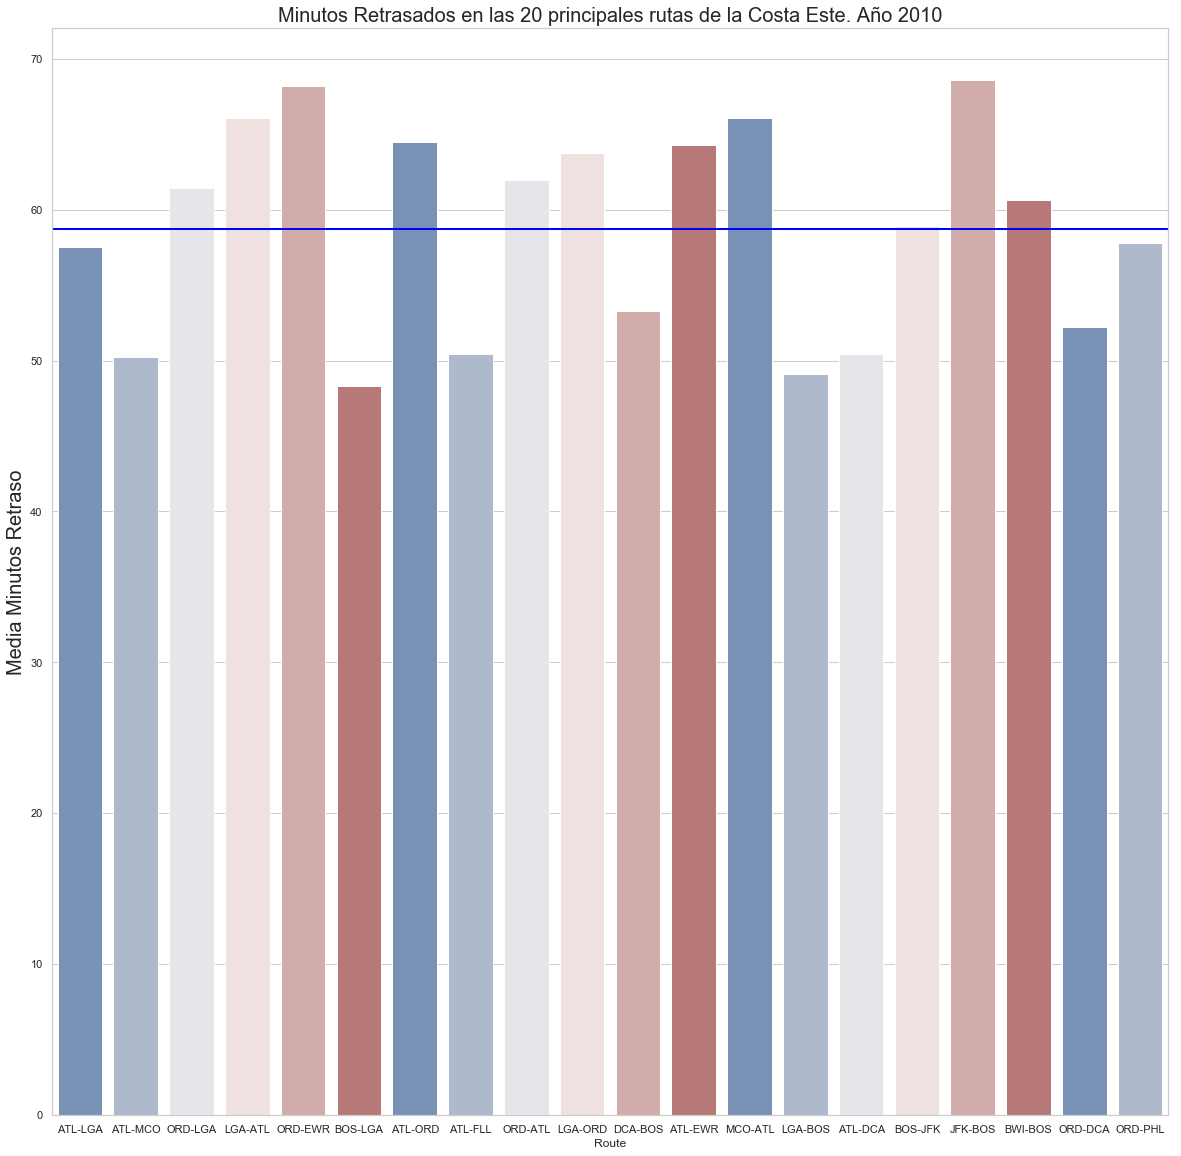

In [248]:
#retaso medio en destino  en las 20 principales rutas retrasadas de la costa Este

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=rutasVuelosTop20.index, y=rutasVuelosTop20['MediaRetrasoDestinoTotal'], palette=pal)

ax.set_ylabel("Media Minutos Retraso", fontsize=20)
ax.set_title('Minutos Retrasados en las 20 principales rutas de la Costa Este. Año ' + year, fontsize=20)

plt.axhline(rutasVuelosTop20['MediaRetrasoDestinoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

## 1.3.6 Cancelaciones de Vuelos

In [249]:
#Vuelos que se han cancelado
len(dfanual[dfanual['Cancelled'] == 1])

113044

In [250]:
vuelosCanceladosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMes = vuelosCanceladosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['Cancelled'] == 1)])}, ignore_index=True)


In [251]:
vuelosCanceladosPorMes

mes vuelos
0    1  12823
1    2  26283
2    3   8227
3    4   3633
4    5   6703
5    6   8265
6    7   8145
7    8   5593
8    9   4743
9   10   5246
10  11   3739
11  12  19644

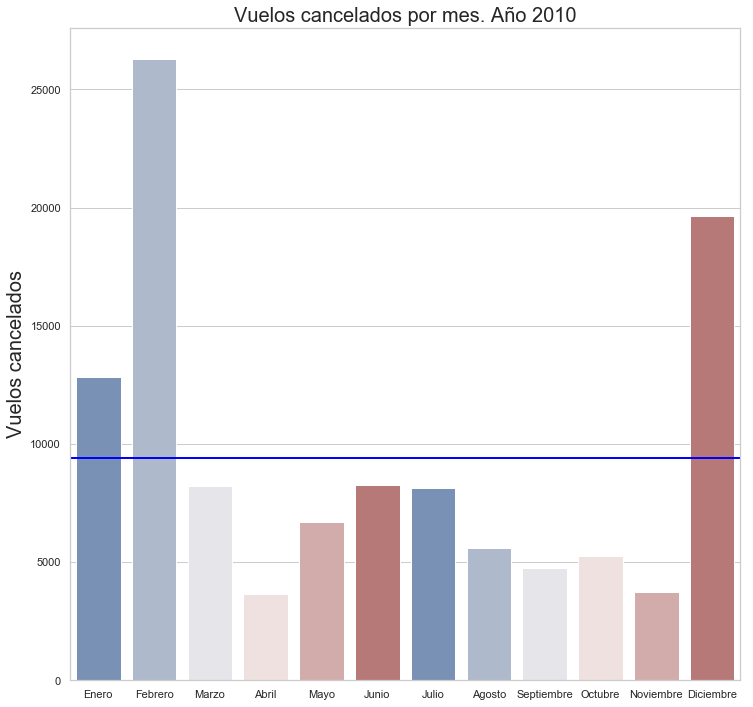

In [252]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por mes. Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [253]:
#comprobación de que tenemos o no códigos de cancelación asociados a los cancelados (entre 2001 y 2003 no tenemos)
#hay 65143
conCodigo = dfanual.CancellationCode.dropna()
len(conCodigo)

113044

Tenemos motivos de cancelación, así que vamos a estudiarlos

### 1.3.6.1 Cancelados por la Aerolínea

In [254]:
#cancelados por culpa de aerolínea
len(dfanual[dfanual['CancellationCode'] == 'A'])

42029

In [255]:
vuelosCanceladosPorAerolinea = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorAerolinea = vuelosCanceladosPorAerolinea.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'A')])}, ignore_index=True)


In [256]:
vuelosCanceladosPorAerolinea

mes vuelos
0    1   4951
1    2   4702
2    3   3290
3    4   2227
4    5   2823
5    6   3995
6    7   4493
7    8   3849
8    9   2343
9   10   2366
10  11   2184
11  12   4806

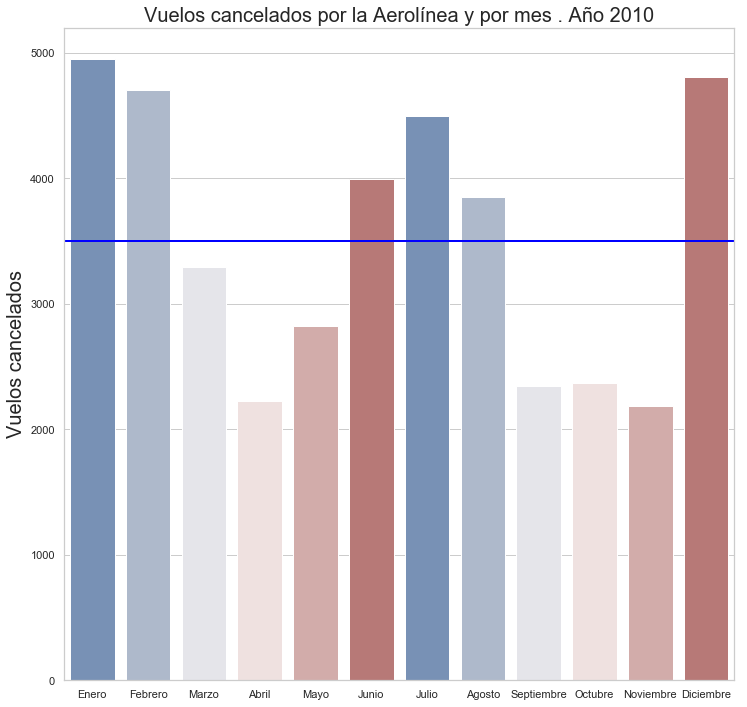

In [257]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorAerolinea['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Aerolínea y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorAerolinea['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.2 Cancelados por Meteorología

In [258]:
#cancelados por las condiciones meteorológicas
len(dfanual[dfanual['CancellationCode'] == 'B'])

56449

In [259]:
vuelosCanceladosPorMeteo = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMeteo = vuelosCanceladosPorMeteo.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'B')])}, ignore_index=True)


In [260]:
vuelosCanceladosPorMeteo

mes vuelos
0    1   6762
1    2  20210
2    3   3738
3    4    878
4    5   2378
5    6   2522
6    7   2511
7    8    886
8    9   1614
9   10   1715
10  11    973
11  12  12262

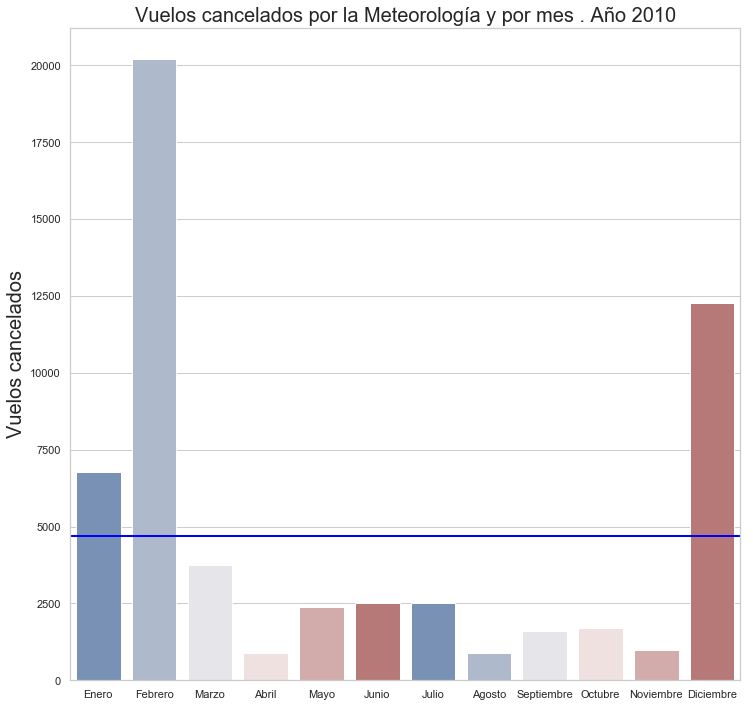

In [261]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMeteo['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Meteorología y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMeteo['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.3 Cancelados por Espacio Aéreo

In [262]:
#cancelados por el Espacio Aéreo
len(dfanual[dfanual['CancellationCode'] == 'C'])

14527

In [263]:
vuelosCanceladosPorNAS = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorNAS = vuelosCanceladosPorNAS.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'C')])}, ignore_index=True)


In [264]:
vuelosCanceladosPorNAS

mes vuelos
0    1   1084
1    2   1369
2    3   1199
3    4    528
4    5   1501
5    6   1747
6    7   1139
7    8    856
8    9    785
9   10   1164
10  11    582
11  12   2573

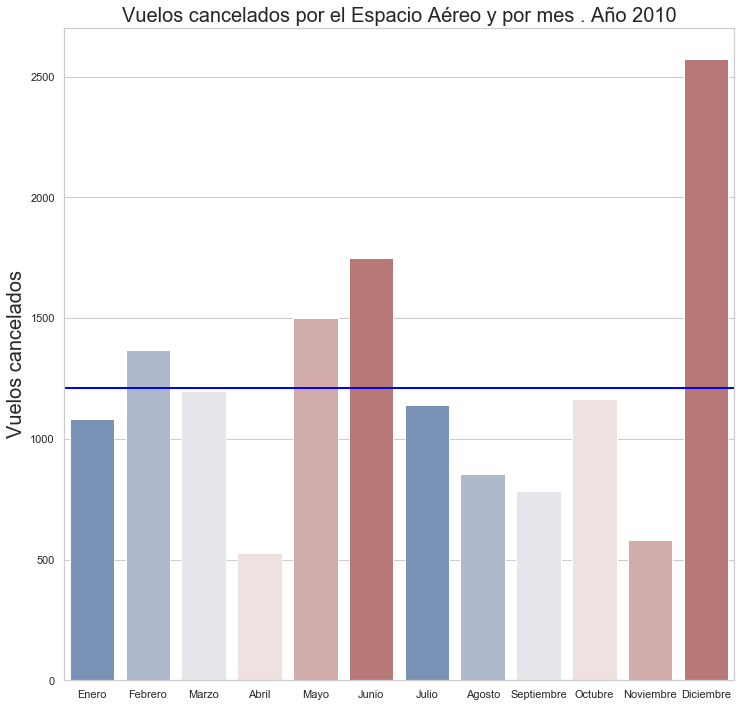

In [265]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorNAS['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por el Espacio Aéreo y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorNAS['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.4 Cancelación por motivos de Seguridad

In [266]:
#cancelados por Seguridad (física)
len(dfanual[dfanual['CancellationCode'] == 'D'])

39

In [267]:
vuelosCanceladosPorSeguridad = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorSeguridad = vuelosCanceladosPorSeguridad.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'D')])}, ignore_index=True)

In [268]:
vuelosCanceladosPorSeguridad

mes vuelos
0    1     26
1    2      2
2    3      0
3    4      0
4    5      1
5    6      1
6    7      2
7    8      2
8    9      1
9   10      1
10  11      0
11  12      3

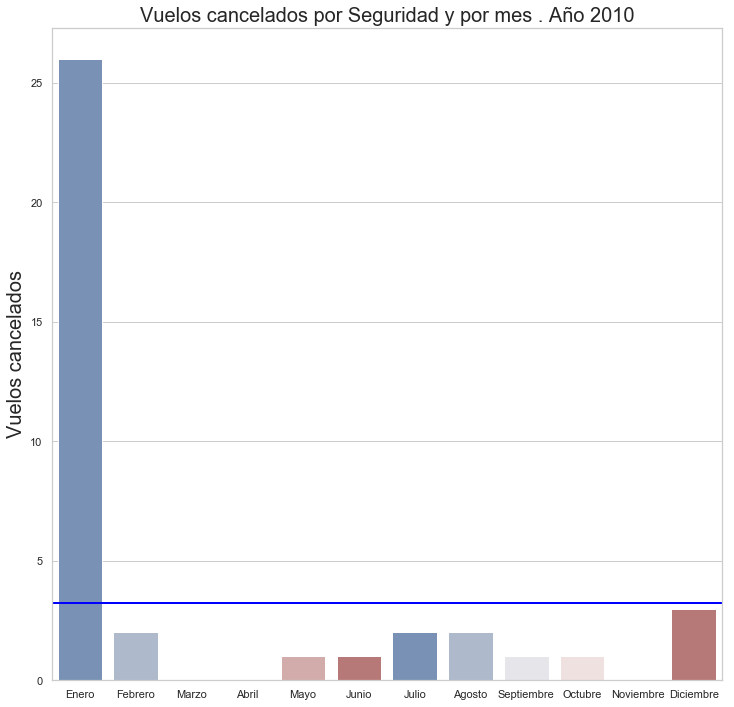

In [269]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorSeguridad['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por Seguridad y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.5 Cancelaciones distribuidas por aerolíneas

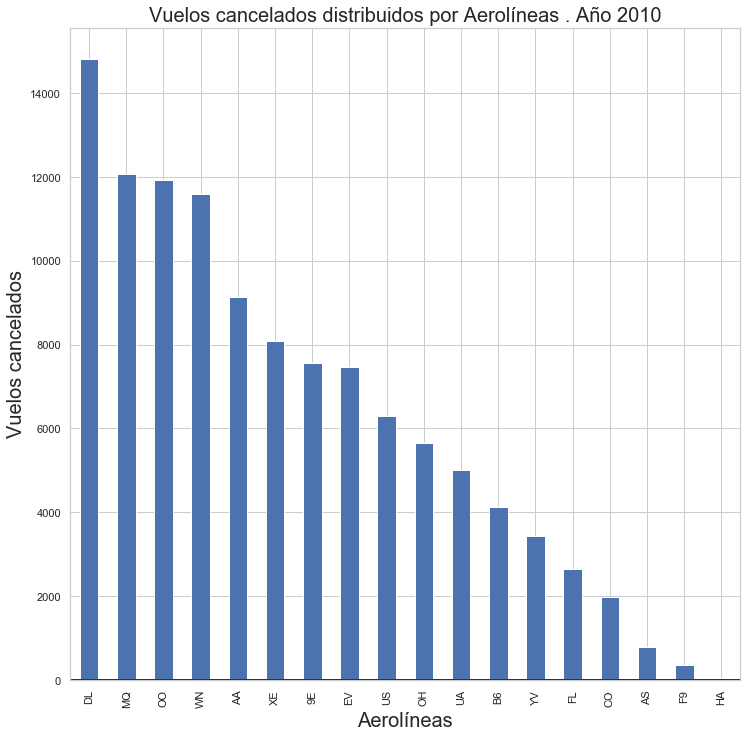

In [270]:
plt.figure(figsize=(12, 12))

ax = dfanual[dfanual['Cancelled'] == 1].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar')

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_xlabel("Aerolíneas", fontsize=20)
ax.set_title('Vuelos cancelados distribuidos por Aerolíneas . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

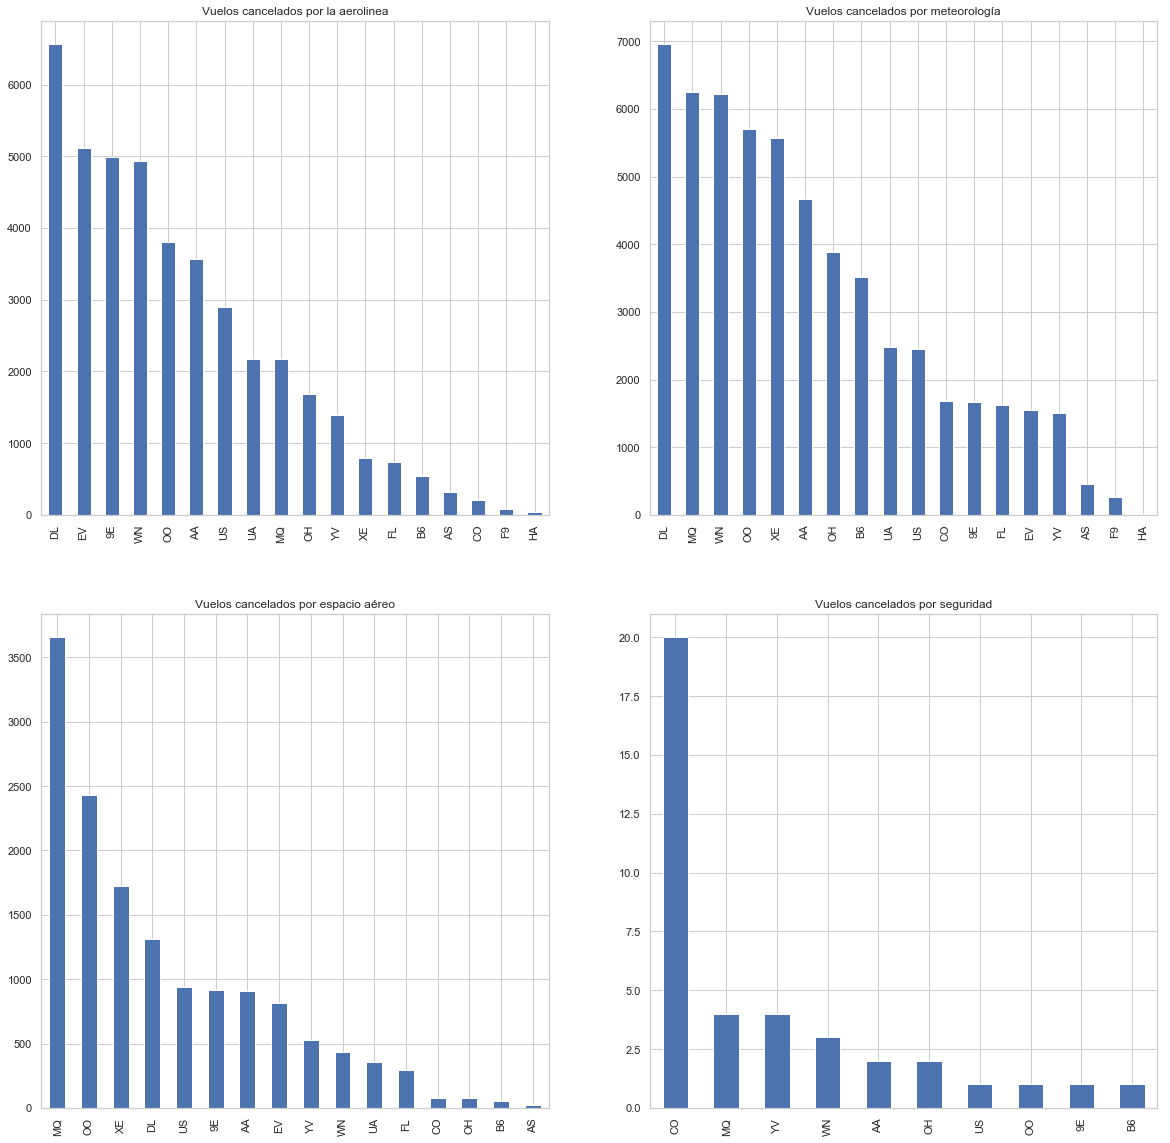

In [271]:
#Sacamos gráficos por compañía
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
dfanual[dfanual['CancellationCode'] == 'A'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por la aerolinea')

plt.subplot(2,2,2)
dfanual[dfanual['CancellationCode'] == 'B'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por meteorología')

plt.subplot(2,2,3)
dfanual[dfanual['CancellationCode'] == 'C'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por espacio aéreo')

plt.subplot(2,2,4)
dfanual[dfanual['CancellationCode'] == 'D'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por seguridad')


### 1.3.6.6 Cancelaciones por Rutas

Mostramos aquellas rutas con más cancelaciones

#### 1.3.6.6.1 Vuelos cancelados por Ruta por la Aerolínea

In [272]:
rutasVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Route.value_counts(sort=True))

In [273]:
rutasVuelosCanceladosAerolinea.shape

(3481, 1)

In [274]:
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.rename(columns={'Route': 'VuelosCancelados'})

In [275]:
rutasVuelosCanceladosAerolinea.head(10)

VuelosCancelados
HOU-DAL               411
DAL-HOU               400
BOS-LGA               297
LGA-BOS               291
LAX-SFO               188
OAK-LAX               177
LAX-OAK               168
LAX-PHX               166
SFO-LAX               165
PHX-LAX               154

In [276]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.head(20)

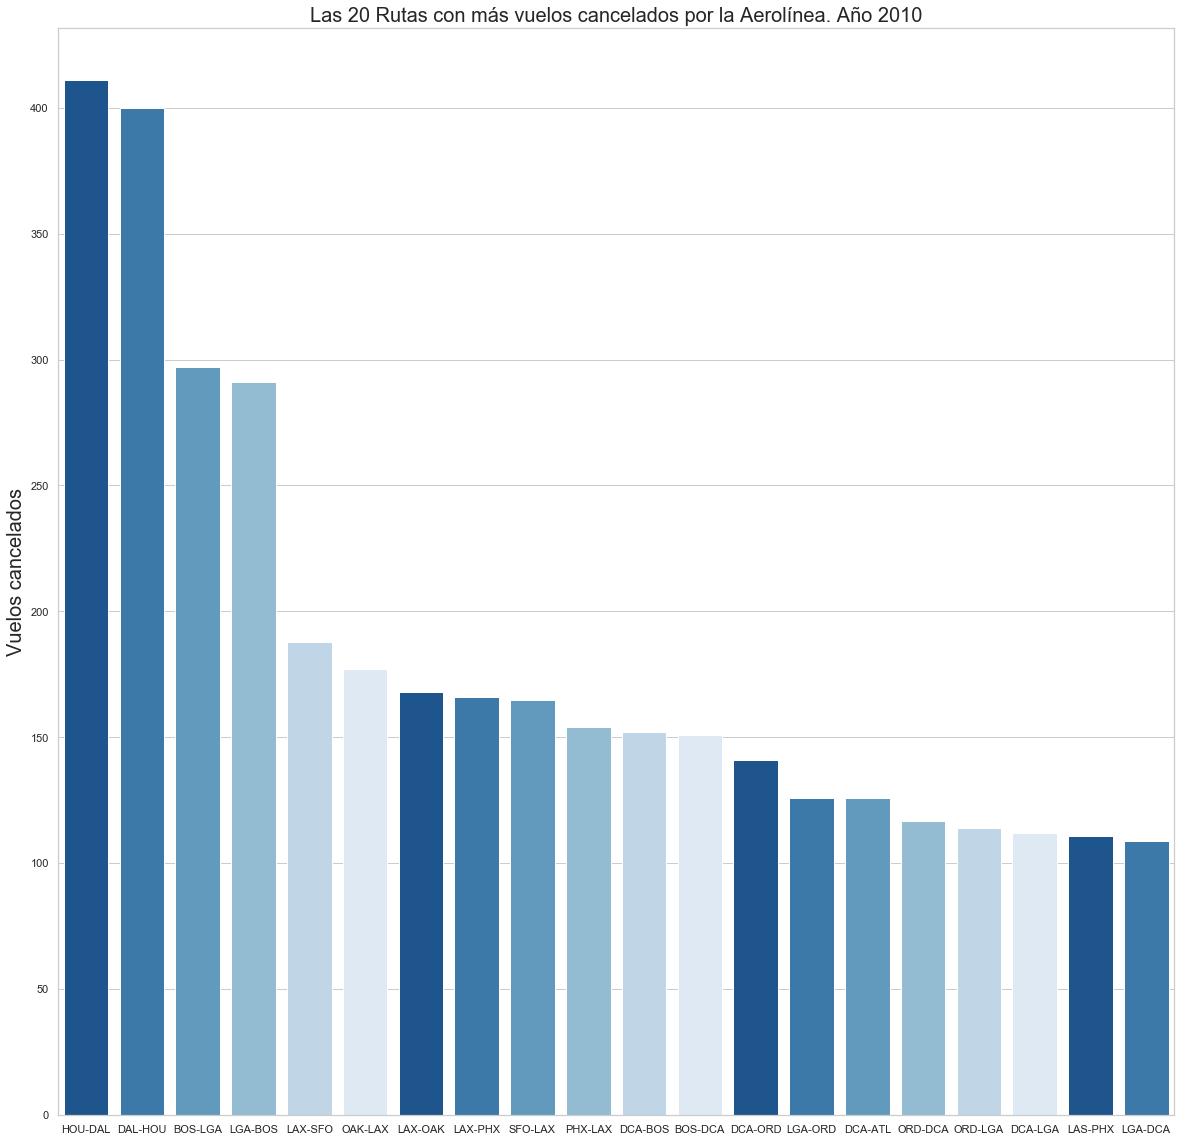

In [277]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=rutasVuelosCanceladosAerolinea.index, y=rutasVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.2 Vuelos cancelados por Ruta por la Meteorología

In [278]:
rutasVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Route.value_counts(sort=True))

In [279]:
rutasVuelosCanceladosMeteo.shape

(3693, 1)

In [280]:
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.rename(columns={'Route': 'VuelosCancelados'})

In [281]:
rutasVuelosCanceladosMeteo.head(10)

VuelosCancelados
DCA-ATL               234
ATL-DCA               227
BOS-LGA               222
LGA-BOS               221
ASE-DEN               212
DCA-ORD               212
DCA-BOS               211
BOS-DCA               211
LGA-ATL               209
ORD-DCA               208

In [282]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

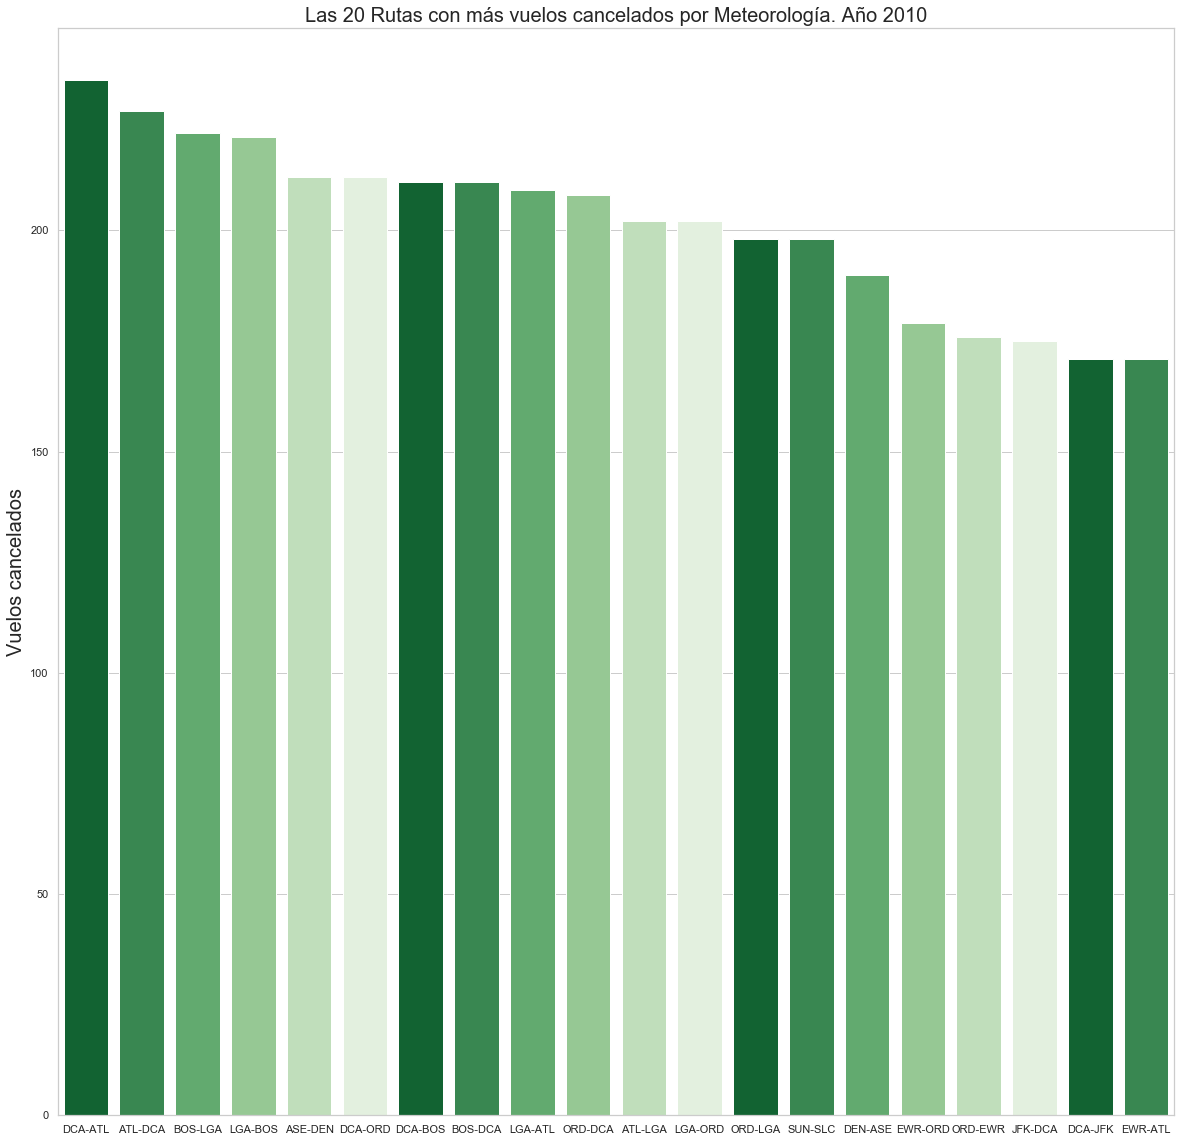

In [283]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

In [284]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

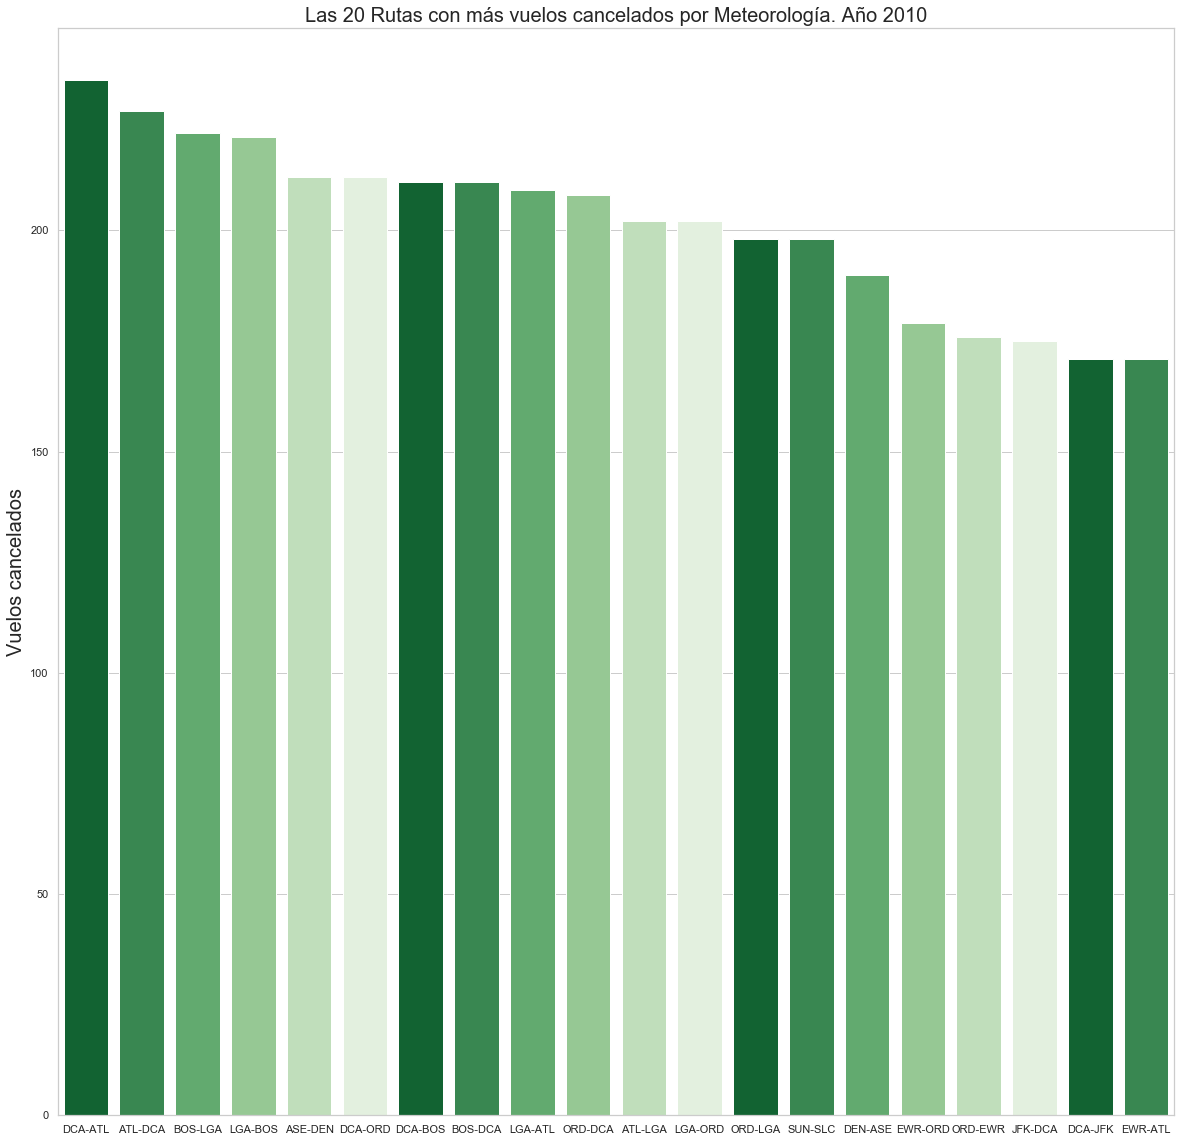

In [285]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.3 Vuelos cancelados por Ruta por la Espacio Aéreo

In [286]:
rutasVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Route.value_counts(sort=True))

In [287]:
rutasVuelosCanceladosNAS.shape

(1905, 1)

In [288]:
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosNAS.head(10)

VuelosCancelados
BOS-LGA               257
LGA-BOS               246
ATL-LGA                98
LGA-ATL                97
ORD-LGA                95
LGA-ORD                94
LGA-DCA                92
MOD-SFO                88
DCA-LGA                88
SFO-MOD                87

In [289]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.head(20)

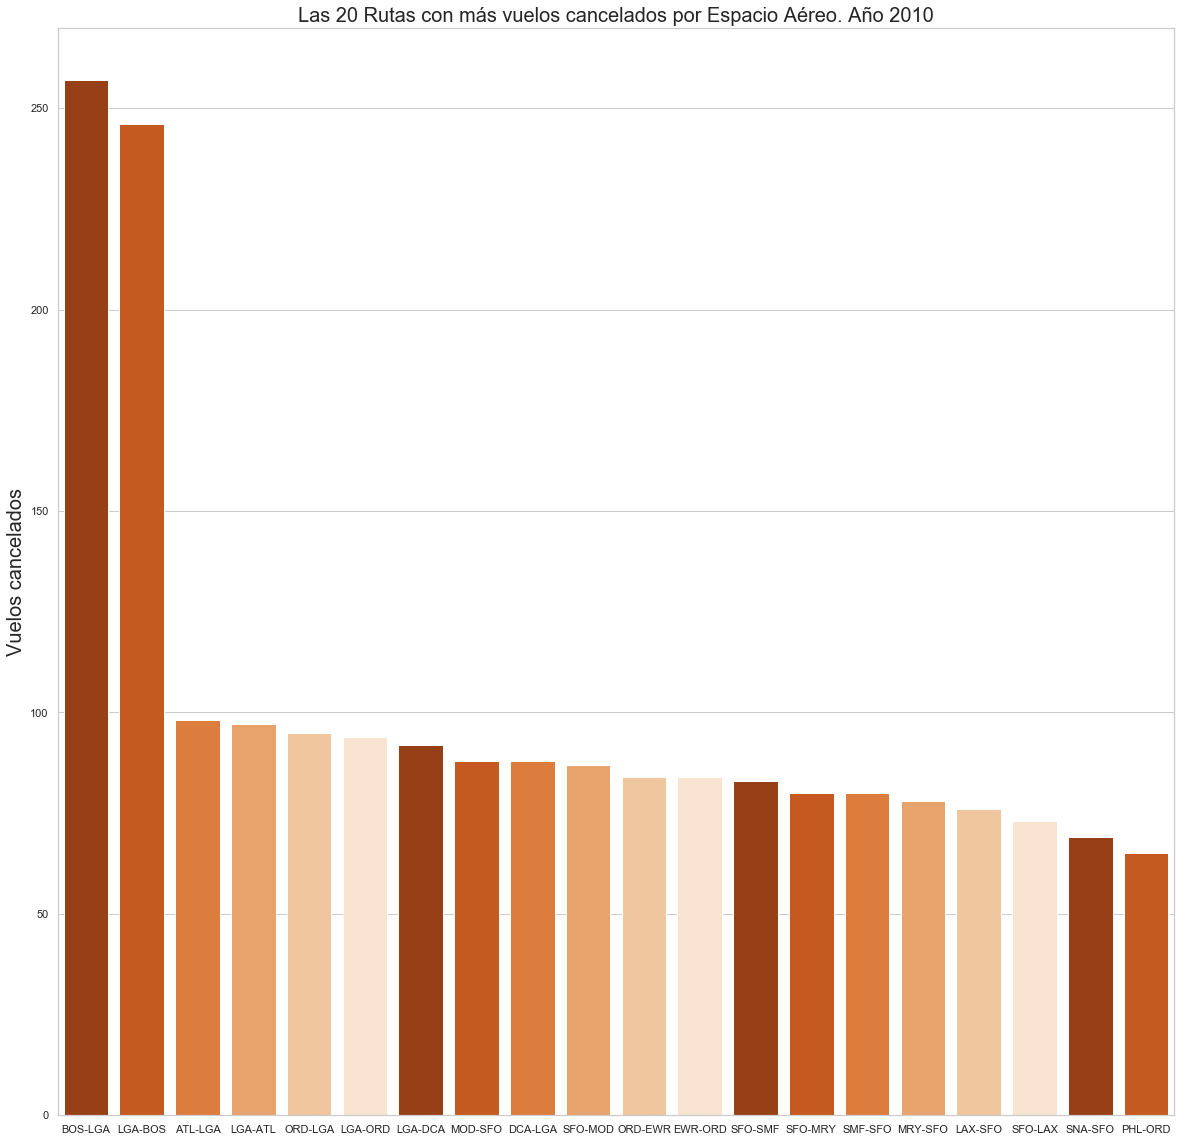

In [290]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=rutasVuelosCanceladosNAS.index, y=rutasVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.4 Vuelos cancelados por Ruta por Seguridad

In [291]:
rutasVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Route.value_counts(sort=True))

In [292]:
rutasVuelosCanceladosSeguridad.shape

(37, 1)

In [293]:
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosSeguridad.head(10)

VuelosCancelados
EWR-BOS                 2
BOS-EWR                 2
DEN-BWI                 1
LGA-ATL                 1
SFO-JFK                 1
EWR-SAT                 1
PDX-IAH                 1
TVC-ORD                 1
DAB-ATL                 1
EWR-TPA                 1

In [294]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.head(20)

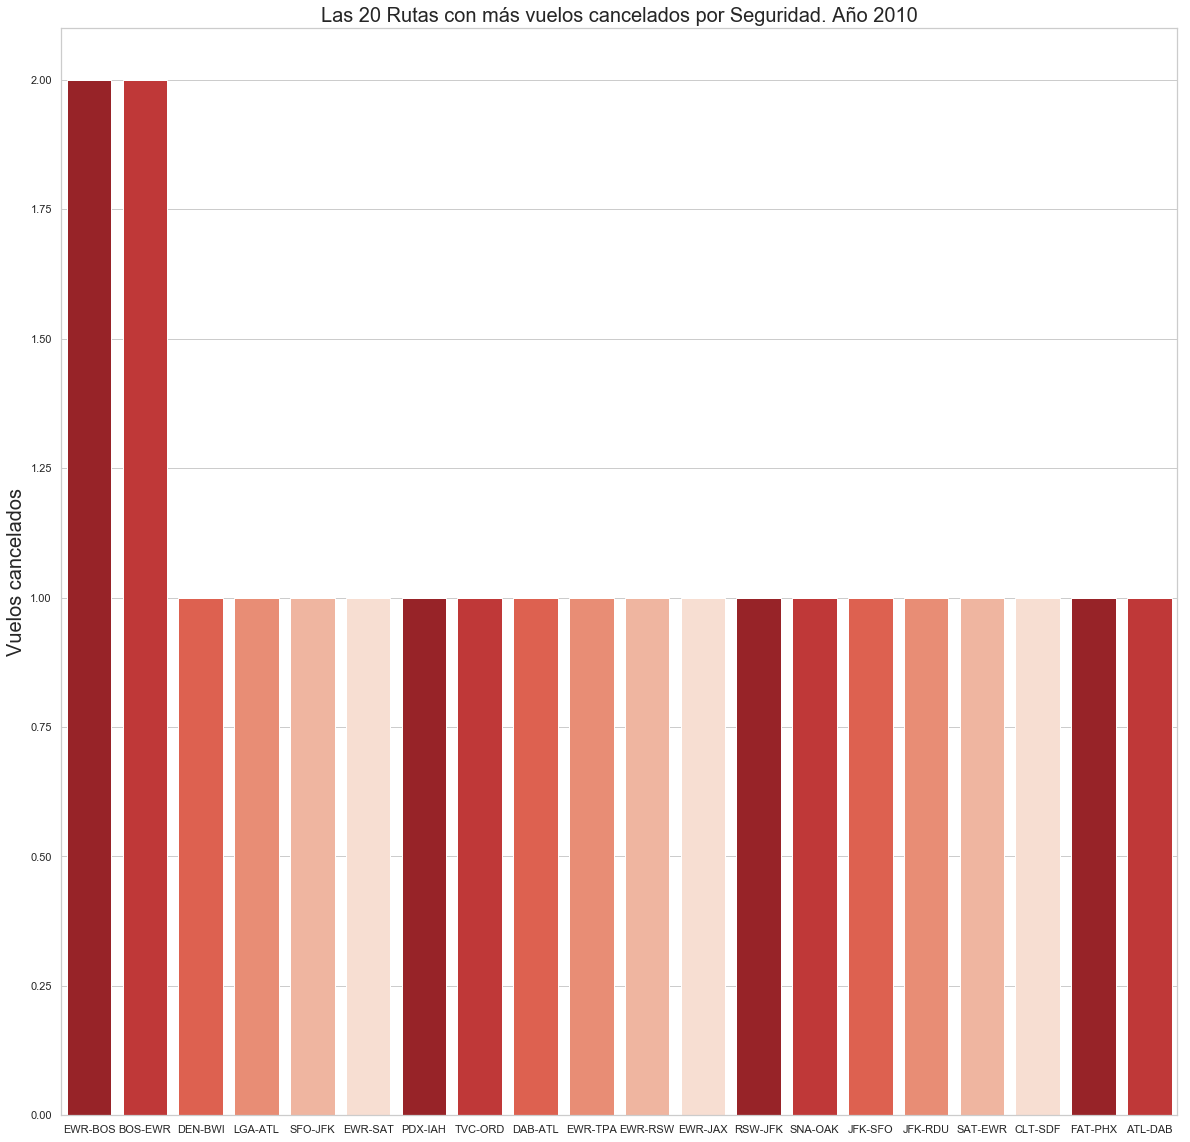

In [295]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=rutasVuelosCanceladosSeguridad.index, y=rutasVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

### 1.3.6.7 Cancelaciones por Aeropuertos

#### 1.3.6.7.1 Vuelos cancelados en aeropuertos por la Aerolínea

In [296]:
aeropuertosVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Origin.value_counts(sort=True))

In [297]:
aeropuertosVuelosCanceladosAerolinea.shape

(293, 1)

In [298]:
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosAerolinea.head(10)

VuelosCancelados
ATL              3453
ORD              1857
DTW              1734
DFW              1382
LAX              1378
LGA              1323
MSP              1075
BOS              1042
DCA               980
MEM               931

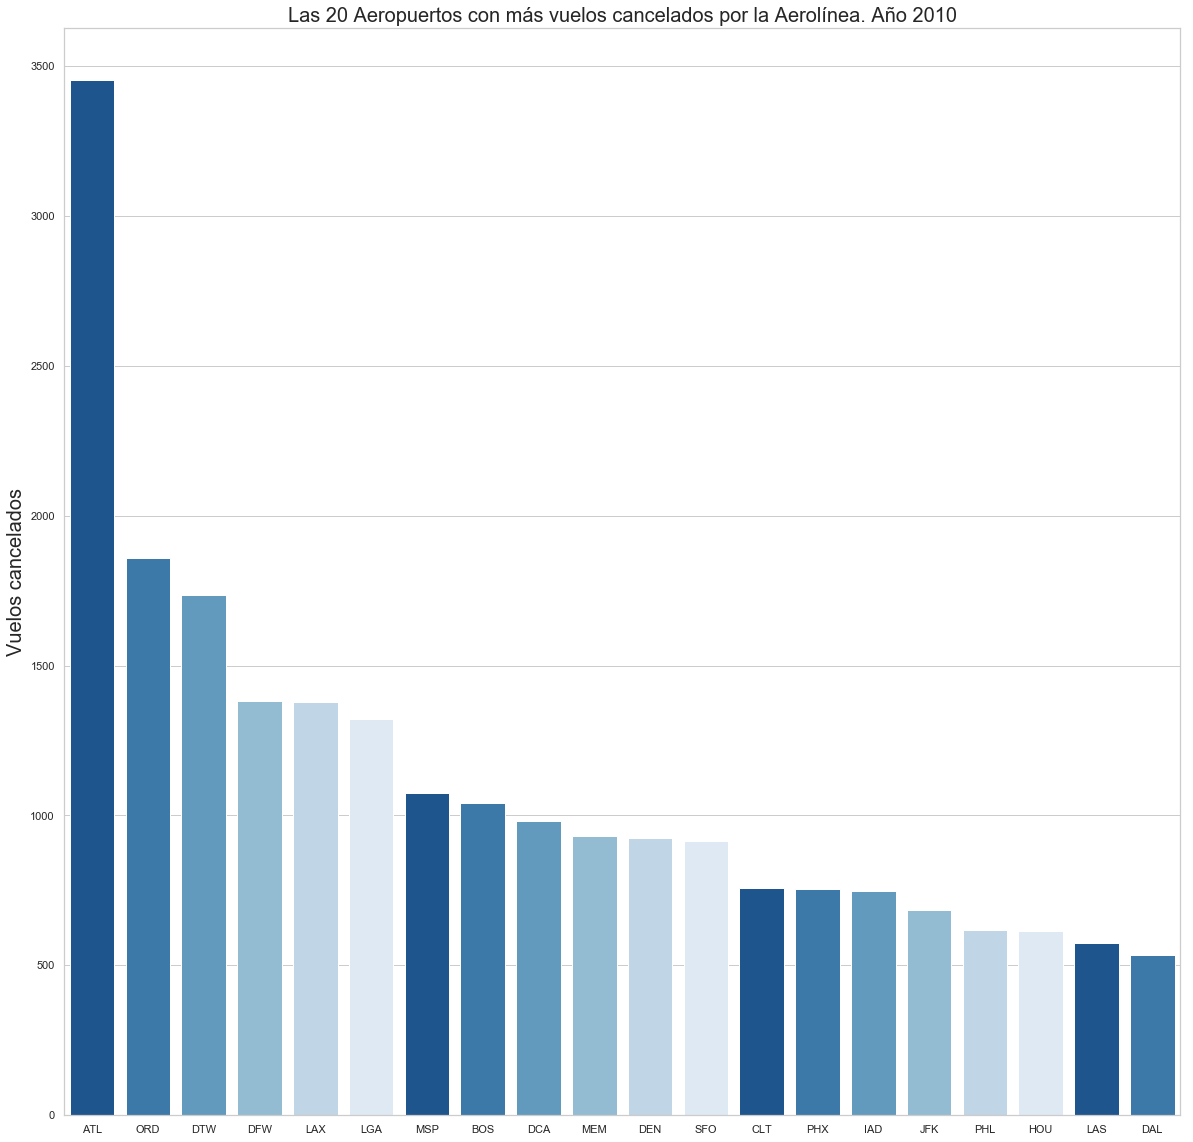

In [299]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosAerolinea.index, y=aeropuertosVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.2 Vuelos cancelados en aeropuertos por Meteorología

In [300]:
aeropuertosVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosMeteo.shape

(294, 1)

In [301]:
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosMeteo.head(10)

VuelosCancelados
ATL              3796
ORD              3564
DFW              2790
JFK              2673
EWR              2519
LGA              2056
DCA              1841
BWI              1782
BOS              1533
DEN              1397

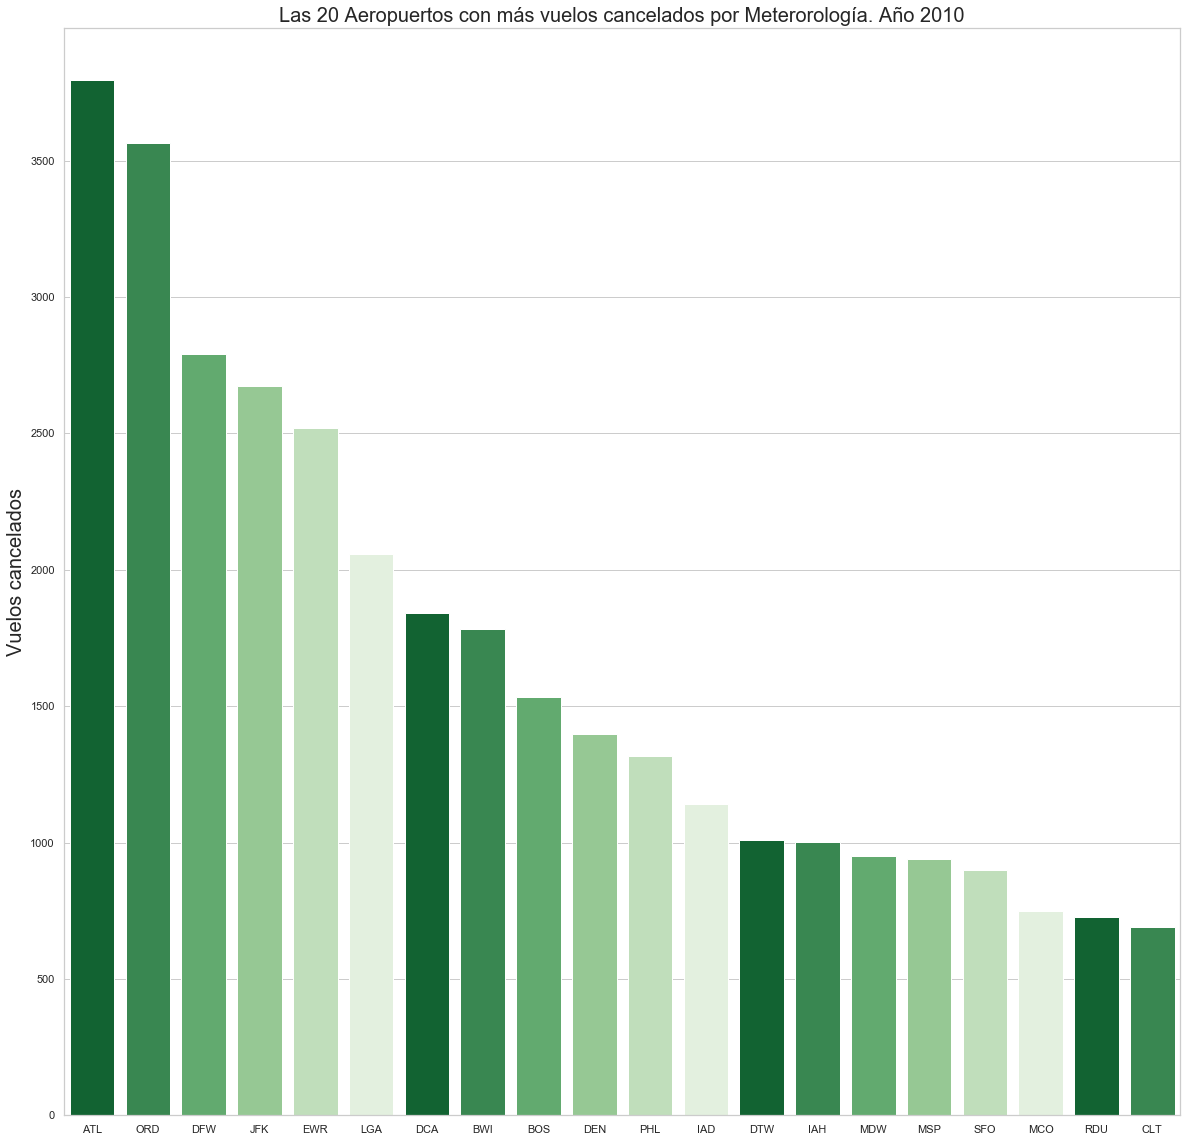

In [302]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosMeteo.index, y=aeropuertosVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Meterorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.3 Vuelos cancelados en aeropuertos por Espacio Aéreo

In [303]:
aeropuertosVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosNAS.shape

(249, 1)

In [304]:
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosNAS.head(10)

VuelosCancelados
ORD              2365
LGA               956
ATL               899
SFO               885
EWR               647
BOS               494
JFK               436
DCA               432
DTW               384
DFW               335

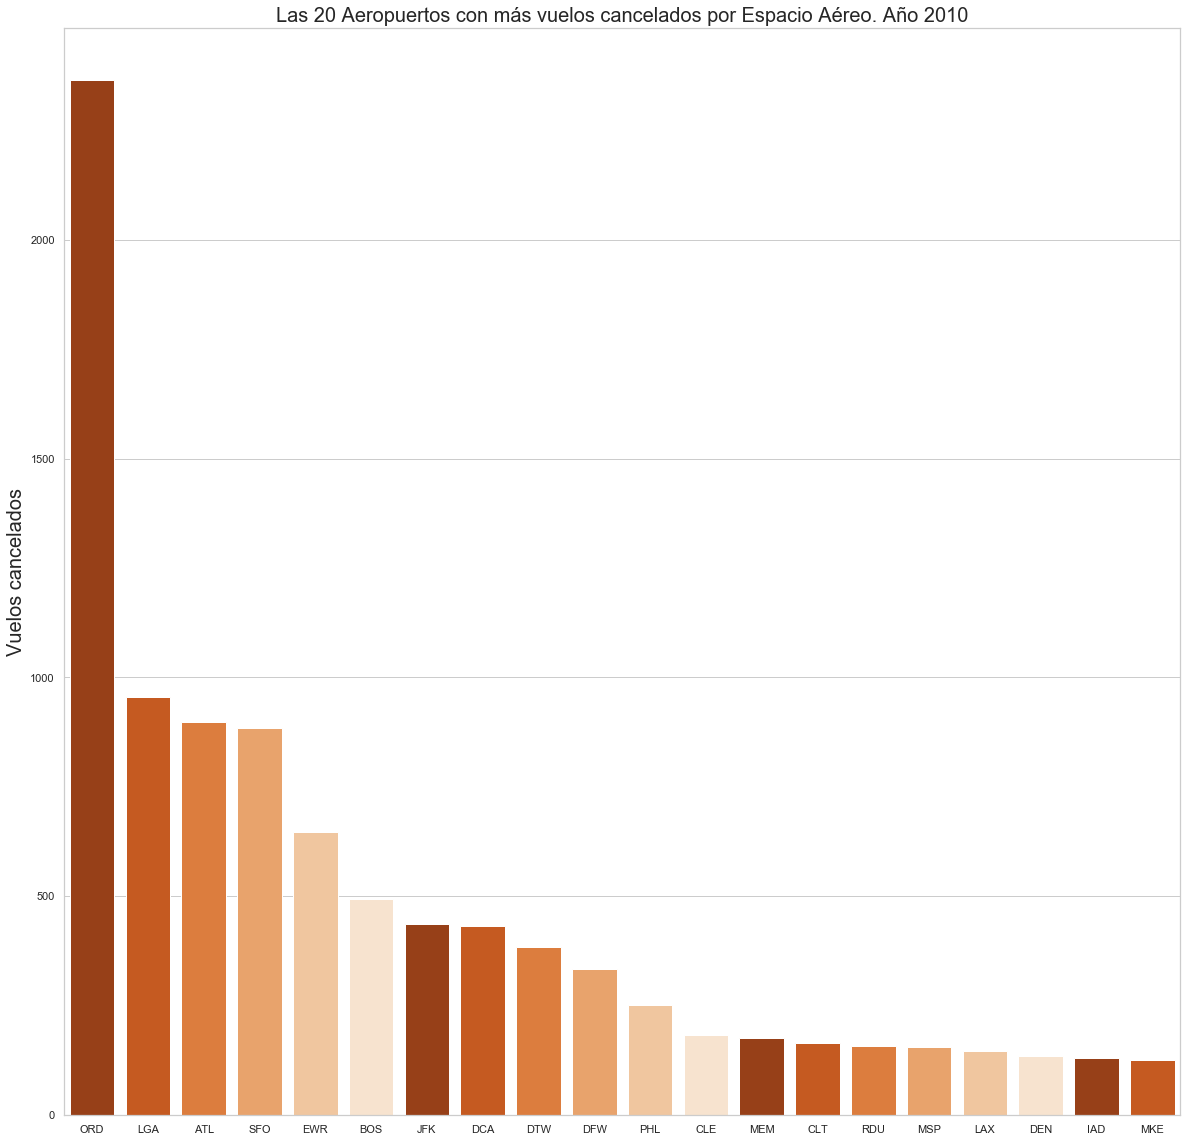

In [305]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosNAS.index, y=aeropuertosVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.4 Vuelos cancelados en aeropuertos por Seguridad

In [306]:
aeropuertosVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosSeguridad.shape

(24, 1)

In [307]:
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosSeguridad.head(10)

VuelosCancelados
EWR                11
CLT                 2
BOS                 2
RSW                 2
ATL                 2
JFK                 2
PBI                 1
SAT                 1
DEN                 1
PHL                 1

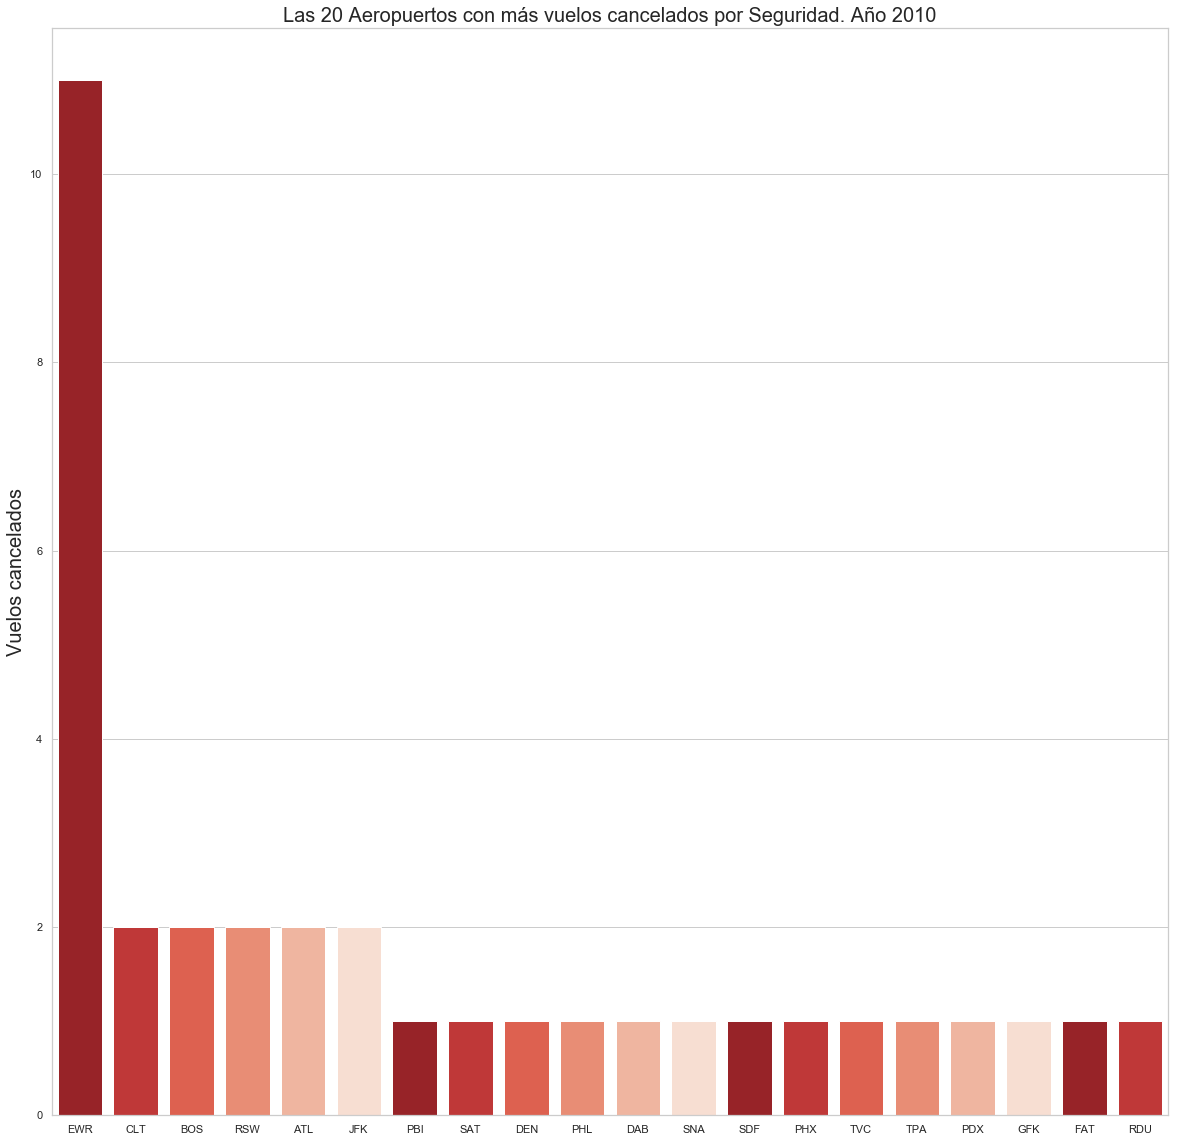

In [308]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosSeguridad.index, y=aeropuertosVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

## 2. Áreas geográficas
Vamos a ver cómo asignar áreas geográficos a los diferentes aeropuertos para identificar mejor en qué zona están y ver si merece la pena hacer un modelo de predicción /clasificación por zonas geográficas.
Para ello tenemos los Estados en los que se ubica cada aeropuerto, indicado en el campo "OriginState", por lo que hemos hecho un csv mapeando los Estados con zonas geográficas que hemos estimado inicialmente, en función tanto de la geografía, como del posible clima.
1. Por geografía: dividimos el país en 4 partes: Este, Central y Oeste(incluye Hawai).
2. Por clima: a las 3 divisiones del contiennte, los subdividimos en Norte y Sur, ya que seria razonable pensar que  en cada una de estas 3 divisiones el clima varía bastante, a lo largo del año, entre norte y sur.

In [309]:
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv(ruta + "/geo/" + 'ZonasEstados.csv', delimiter=';')

In [310]:
zonaEstados.head(5)

State GeoCluster
0    AL         ES
1    AK         WN
2    AZ         WS
3    AR         CS
4    CA         WS

In [311]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [312]:
#hacemos el join por el Estado Origen del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='OriginState', how='inner')

In [313]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='DestState', how='inner')

In [314]:
#comprobamos
dfanual[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NC        ES        NY      EN
1          NC        ES        NY      EN
2          NC        ES        NY      EN
3          NC        ES        NY      EN
4          NC        ES        NY      EN

Revisemos por las zonas geográficas, algunos de los datos principales de retrasos, cancelaciones y número de vuelos totales, para comprobar si estamos en lo cierto con respecto a la intuición de los datos por aeropuertos y rutas que hemos visto en el apartado 1.3

In [315]:
#primero contamos todos los retrasos por Zonas de Origen del vuelo
retrasosSalidaPorZonasOrigen = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1].OriginGeo.value_counts(sort=True))

In [316]:
retrasosSalidaPorZonasOrigen = retrasosSalidaPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosRetrasados'})
retrasosSalidaPorZonasOrigen

VuelosRetrasados
EN            371985
ES            255861
CS            208645
WS            198207
CN             59412
WN             16477

In [317]:
#vuelos totales por zona
vuelosTotalesPorZonasOrigen = pd.DataFrame(dfanual.OriginGeo.value_counts(sort=True))

In [318]:
vuelosTotalesPorZonasOrigen = vuelosTotalesPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosTotales'})
vuelosTotalesPorZonasOrigen

VuelosTotales
EN        2092988
ES        1483347
WS        1202531
CS        1171117
CN         350857
WN         129437

In [319]:
#los unimos
#hacemos el join por el Estado Destino del vuelo
datosZonasOrigen = pd.merge(vuelosTotalesPorZonasOrigen, retrasosSalidaPorZonasOrigen, left_index=True, right_index=True)

In [320]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados
EN        2092988            371985
ES        1483347            255861
WS        1202531            198207
CS        1171117            208645
CN         350857             59412
WN         129437             16477

In [321]:
#retrasos en Zona Origen por culpa de la llegada tarde del vuelo anterior
#sacamos las medias de retrasos por llegada tarde del vuelo anterior
retrasosSalidasteAircraftPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

In [322]:
retrasosSalidasteAircraftPorGeo = pd.DataFrame(retrasosSalidasteAircraftPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasteAircraftPorGeo = retrasosSalidasteAircraftPorGeo.rename(columns={'OriginGeo': 'VuelosLateArrival', 'DepDelay': 'MediaLateArrival'})

In [323]:
retrasosSalidasteAircraftPorGeo

VuelosLateArrival  MediaLateArrival
OriginGeo                                     
CN                     17726         64.263060
CS                     53034         61.573858
EN                     94355         68.740840
ES                     69873         66.677286
WN                      6301         63.496112
WS                     60082         61.626860

In [324]:
#retrasos en Zona Origen por culpa de la Aerolínea
#sacamos las medias
retrasosSalidasAerolineaPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['LateAircraftDelay'] == 0) & (dfanual['CarrierDelay'] > 0)])
retrasosSalidasAerolineaPorGeo = pd.DataFrame(retrasosSalidasAerolineaPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasAerolineaPorGeo = retrasosSalidasAerolineaPorGeo.rename(columns={'OriginGeo': 'VuelosAerolinea', 'DepDelay': 'MediaAerolinea'})

In [325]:
retrasosSalidasAerolineaPorGeo

VuelosAerolinea  MediaAerolinea
OriginGeo                                 
CN                   12950       65.196448
CS                   49200       55.176484
EN                   88165       65.693064
ES                   63079       64.399499
WN                    2909       66.379856
WS                   33188       60.961251

In [326]:
#vuelos totales cancelados por Zona Origen
vuelosCanceladosPorGeo = pd.DataFrame(dfanual[(dfanual['Cancelled'] == 1)])
vuelosCanceladosPorGeo = pd.DataFrame(vuelosCanceladosPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosPorGeo = vuelosCanceladosPorGeo.rename(columns={'OriginGeo': 'VuelosCancelados'})

In [327]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     6209
CS                    16109
EN                    51119
ES                    24520
WN                     1519
WS                    13487

In [328]:
#vuelos cancelados por Meteo Zona Origen
vuelosCanceladosMeteoPorGeo = pd.DataFrame(dfanual[(dfanual['CancellationCode'] == 'B')])
vuelosCanceladosMeteoPorGeo = pd.DataFrame(vuelosCanceladosMeteoPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosMeteoPorGeo = vuelosCanceladosMeteoPorGeo.rename(columns={'OriginGeo': 'VuelosCanceladosMeteo'})

In [329]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     6209
CS                    16109
EN                    51119
ES                    24520
WN                     1519
WS                    13487

In [330]:
# terminamos de fusionar todos los datasets
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasteAircraftPorGeo, left_index=True, right_index=True)

In [331]:
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasAerolineaPorGeo, left_index=True, right_index=True)

In [332]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosPorGeo, left_index=True, right_index=True)

In [333]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosMeteoPorGeo, left_index=True, right_index=True)

In [334]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        2092988            371985              94355         68.740840   
ES        1483347            255861              69873         66.677286   
WS        1202531            198207              60082         61.626860   
CS        1171117            208645              53034         61.573858   
CN         350857             59412              17726         64.263060   
WN         129437             16477               6301         63.496112   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  
EN            88165       65.693064             51119                  27344  
ES            63079       64.399499             24520                  11697  
WS            33188       60.961251             13487                   4626  
CS            49200       55.176484             16109                   8926  
CN            12950       65.196448              6209                   2945  
WN             2909       66.379856              1519                    857

In [335]:
#por último sacamos porcentajes sobre los vuelos totales, para conocer la proporción real
datosZonasOrigen['PctVuelosRetrasados'] = (datosZonasOrigen['VuelosRetrasados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosLateArrival'] = (datosZonasOrigen['VuelosLateArrival'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosAerolinea'] = (datosZonasOrigen['VuelosAerolinea'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCancelados'] = (datosZonasOrigen['VuelosCancelados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCanceladosMeteo'] = (datosZonasOrigen['VuelosCanceladosMeteo'] / datosZonasOrigen['VuelosTotales'])*100


In [336]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        2092988            371985              94355         68.740840   
ES        1483347            255861              69873         66.677286   
WS        1202531            198207              60082         61.626860   
CS        1171117            208645              53034         61.573858   
CN         350857             59412              17726         64.263060   
WN         129437             16477               6301         63.496112   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  \
EN            88165       65.693064             51119                  27344   
ES            63079       64.399499             24520                  11697   
WS            33188       60.961251             13487                   4626   
CS            49200       55.176484             16109                   8926   
CN            12950       65.196448              6209                   2945   
WN             2909       66.379856              1519                    857   

    PctVuelosRetrasados  PctVuelosLateArrival  PctVuelosAerolinea  \
EN            17.772916              4.508148            4.212399   
ES            17.248897              4.710496            4.252478   
WS            16.482486              4.996295            2.759846   
CS            17.815897              4.528497            4.201117   
CN            16.933395              5.052201            3.690962   
WN            12.729745              4.868005            2.247425   

    PctVuelosCancelados  PctVuelosCanceladosMeteo  
EN             2.442393                  1.306458  
ES             1.653018                  0.788555  
WS             1.121551                  0.384689  
CS             1.375524                  0.762178  
CN             1.769667                  0.839373  
WN             1.173544                  0.662098

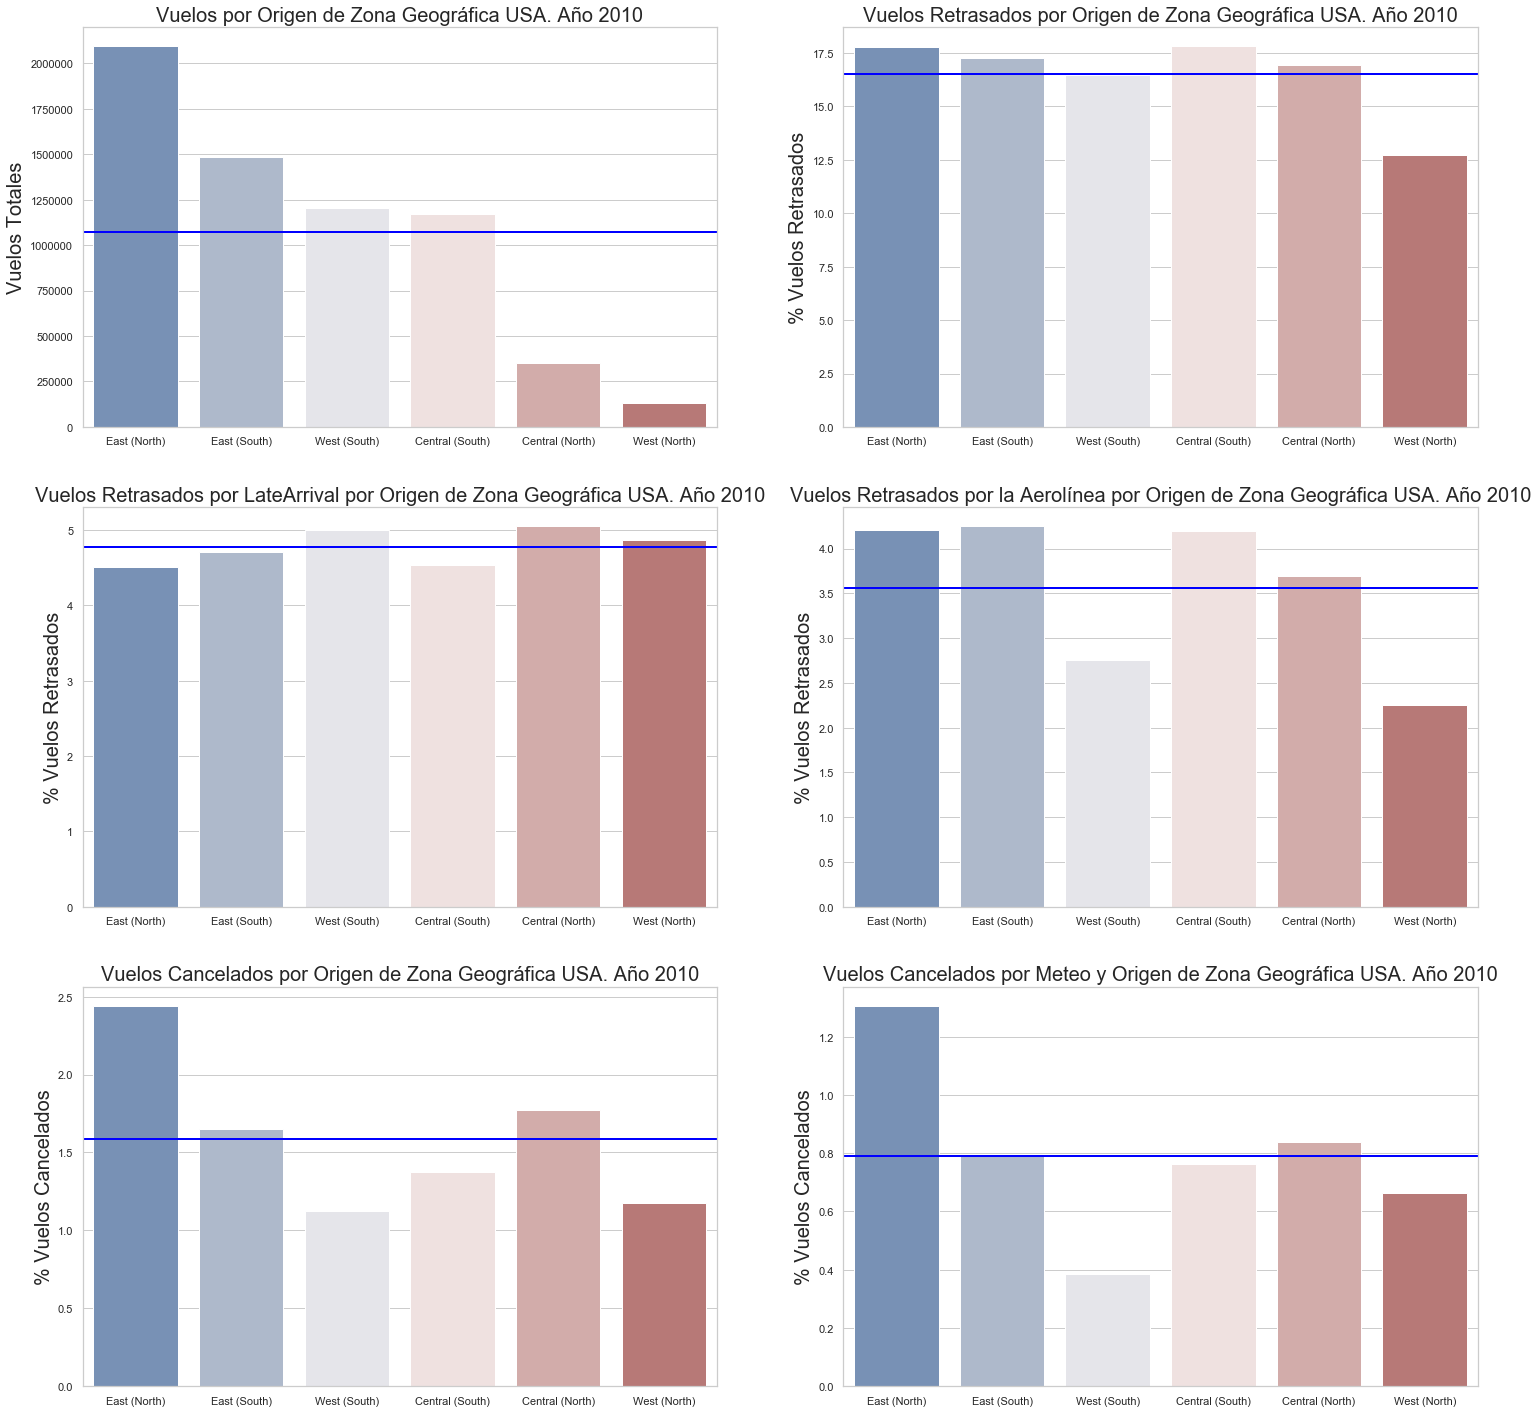

In [337]:
#a pintar

my_xticks=['East (North)', 'East (South)', 'West (South)', 'Central (South)', 'Central (North)', 'West (North)']

#Sacamos gráficos
plt.figure(figsize=(25, 25))

#Vuelos por Origen de Zona Geográfica USA
plt.subplot(3,2,1)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['VuelosTotales'], palette=pal)

ax.set_ylabel("Vuelos Totales", fontsize=20)
ax.set_title('Vuelos por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['VuelosTotales'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por Origen de Zona Geográfica USA
plt.subplot(3,2,2)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosRetrasados'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosRetrasados'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA
plt.subplot(3,2,3)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosLateArrival'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosLateArrival'].mean(), color='Blue', linewidth=2)


#uelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA
plt.subplot(3,2,4)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosAerolinea'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosAerolinea'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Origen de Zona Geográfica USA
plt.subplot(3,2,5)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCancelados'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCancelados'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Meteo y por Origen de Zona Geográfica USA
plt.subplot(3,2,6)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCanceladosMeteo'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Meteo y Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCanceladosMeteo'].mean(), color='Blue', linewidth=2)


plt.show()

1. Se ve claramente que la cantidad de vuelos del Este de USA es muy superior al del Oeste y Centro del país.
2. En cuanto a retrasos, porcentualmente destacan, un poco por encima el Este y el Centro Sur, y en el caso de retrasos por la aerolínea es similar.
3. En cuanto a vuelos cancelados, claramente el Este y el Centro sobresalen, el resto está por de debajo de la media, y parece que el factor meteo es uno de los clave, dado que las zonas de huracanes, tornados y heladas, prevalecen en el Este y Centro Sur de USA. En el Oeste Norte, está también encuadrado Alaska y el estado de Washington, por lo que también destaca. La mejor zona del pais en cuanto a cancelaciones por meteo es claramente la Costa Oeste Sur del país, California, Nevada y Arizona.